# <h1>Thêm thư viện cần thiết</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px

import plotly.subplots as sp
import plotly.graph_objects as go

import numpy as np
import joblib
import torch
import random

from transformers import AutoModel, AutoTokenizer


# <h1>Load dữ liệu file</h1>

In [27]:
df_DHQG = pd.read_excel('data/DataFinal/model/Data of Students QH2021Sfinal.xlsx', header = 2)
df_DHQG.head(10)

STT       SBD        MASV              Họ tên   Ngày sinh Giới tính  \
0    1  21010001         NaN        LƯU PHÚC AN   26/03/2003       Nam   
1    2  21010002  21010002.0    NGUYỄN VŨ THU AN  19/12/2003        Nữ   
2    3  21010003  21010003.0        ĐẶNG DUY ANH  30/07/2003       Nam   
3    4  21010004  21010004.0       HOÀNG KIM ANH  02/07/2003        Nữ   
4    5  21010005  21010005.0  HOÀNG PHẠM VÂN ANH  30/04/2003        Nữ   
5    6  21010006  21010006.0         LÊ HỒNG ANH  12/11/2003        Nữ   
6    7  21010007  21010007.0         LÊ MINH ANH  28/12/2003        Nữ   
7    8  21010008  21010008.0         LÊ NGỌC ANH  28/09/2003        Nữ   
8    9  21010009  21010009.0        LÊ QUỲNH ANH  24/11/2003        Nữ   
9   10  21010010  21010010.0      LÊ THỊ KIM ANH  11/12/2003        Nữ   

  Mã ngành trúng tuyển Mã tổ hợp trúng tuyển  Thứ tự NV trúng tuyển  \
0                  GD1                   A01                    1.0   
1                  GD1                   A01                    3.0   
2                  GD1                   D01                    8.0   
3                  GD1                   D01                    4.0   
4                  GD1                   A00                    2.0   
5                  GD1                   D01                    6.0   
6                  GD1                   A01                    4.0   
7                  GD1                   B00                    1.0   
8                  GD1                   D01                    9.0   
9                   he                   A01                    2.0   

   Điểm trúng tuyển  ...  Lý do chọn ngành học   \
0             25.90  ...                    NaN   
1             26.85  ...                    NaN   
2             25.65  ...                    NaN   
3             25.90  ...                    NaN   
4             25.90  ...                    NaN   
5             25.65  ...                    NaN   
6             26.75  ...                    NaN   
7             25.95  ...                    NaN   
8             26.15  ...                    NaN   
9             25.85  ...                    NaN   

   Những môn học yêu thích ở phổ thông của em là gì?  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                                                NaN   
8                                                NaN   
9                                                NaN   

  Thu nhập mỗi tháng của gia đình em là bao nhiêu?   Nghề nghiệp Bố  \
0                                               NaN   Kỹ sư tin học   
1                                               NaN       Cán bộ KT   
2                                               NaN             NaN   
3                                               NaN           Kỹ sư   
4                                               NaN           Kỹ sư   
5                                               NaN        Nông dân   
6                                               NaN       Giáo viên   
7                                               NaN     Hiệu trưởng   
8                                               NaN             NaN   
9                                               NaN           Tự do   

  Điểm TB HKI  Điểm TB HKII Môn Chuyên ngành 1  Môn chuyên ngành 2  \
0         NaN           NaN                NaN                 NaN   
1         NaN           NaN                NaN                 NaN   
2         NaN           NaN                NaN                 NaN   
3         NaN           NaN                NaN                 NaN   
4         NaN           NaN                NaN                 NaN   
5         NaN           N

In [28]:
df = pd.read_excel('data/DataFinal/model/QH2022S-Luong-Ha.xlsx', header = 1)
df.describe()

IDSV          CCCD         Phone  Maj    Province        ScID  \
count  9.280000e+02  9.260000e+02  9.280000e+02  0.0  926.000000  926.000000   
mean   2.200831e+07  2.008485e+10  6.692118e+08  NaN   13.976242   67.385529   
std    6.563862e+04  1.729995e+10  2.811013e+08  NaN   12.221358   70.410606   
min    2.001093e+07  1.224473e+08  8.122120e+07  NaN    1.000000    1.000000   
25%    2.201023e+07  1.304027e+09  3.666099e+08  NaN    1.000000   20.000000   
50%    2.201046e+07  2.230400e+10  8.274398e+08  NaN   15.000000   50.000000   
75%    2.201070e+07  3.430400e+10  9.477958e+08  NaN   25.000000   94.000000   
max    2.201093e+07  2.313040e+11  9.898620e+08  NaN   63.000000  900.000000   

           GraYear        DTUT       PTXT    ScoTHPT1  ...    K12_Ling  \
count   926.000000  174.000000  926.00000  908.000000  ...  897.000000   
mean   2021.828294    1.235632  110.74946    7.924593  ...    7.977703   
std       0.749557    1.029448   61.47743    1.142704  ...    0.692268   
min    2003.000000    1.000000  100.00000    0.000000  ...    0.800000   
25%    2022.000000    1.000000  100.00000    7.500000  ...    7.600000   
50%    2022.000000    1.000000  100.00000    8.000000  ...    8.000000   
75%    2022.000000    1.000000  100.00000    8.600000  ...    8.400000   
max    2022.000000    6.000000  501.00000    9.750000  ...   10.000000   

        K12_Flang    K12_Phys    K12_Chem     K12_Bio    K12_Hist    K12_Geog  \
count  891.000000  897.000000  897.000000  897.000000  897.000000  897.000000   
mean     7.771717    7.950910    7.987402    8.108138    8.292196    8.393311   
std      0.925826    0.869891    0.857847    0.754577    0.776902    0.657172   
min      4.400000    2.666667    5.000000    5.200000    0.600000    5.500000   
25%      7.100000    7.400000    7.500000    7.700000    7.800000    8.000000   
50%      7.800000    8.000000    8.000000    8.100000    8.400000    8.400000   
75%      8.500000    8.500000    8.600000    8.600000    8.800000    8.900000   
max      9.900000   10.000000   10.000000   10.000000   10.000000   10.000000   

          K12_AVG  Reason  Income  
count  900.000000     0.0     0.0  
mean     8.254333     NaN     NaN  
std      0.508518     NaN     NaN  
min      6.500000     NaN     NaN  
25%      7.900000     NaN     NaN  
50%      8.300000     NaN     NaN  
75%      8.600000     NaN     NaN  
max      9.800000     NaN     NaN  

[8 rows x 38 columns]

In [29]:
df.columns 

Index(['IDSV', 'SBD', 'CCCD', 'Name', 'Sex', 'DOB', 'ETH', 'POB', 'Phone',
       'Univ', 'Year', 'Maj', 'GrMaj', 'Province', 'ScID', 'ScName', 'GraYear',
       'LocProv', 'LocDist', 'LocWard', 'DTUT', 'KVUT', 'PTXT', 'PTXTname',
       'Hoc_luc', 'Hanh_kiem', 'To_hop', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3',
       'ScoTHPT', 'OrderNV', 'DGNL1', 'DGNL2', 'DGNL3', 'ScoDGNL', 'LangCert',
       'TBC_Y1', 'TBC_Y2', 'TBC_Y3', 'TB_HK1', 'CN1', 'CN2', 'CN3', 'CN4',
       'CN5', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem',
       'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG', 'Habit', 'Reason',
       'Sub_favor', 'Income', 'Fjob', 'Mjob'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDSV       928 non-null    int64  
 1   SBD        928 non-null    object 
 2   CCCD       926 non-null    float64
 3   Name       928 non-null    object 
 4   Sex        928 non-null    object 
 5   DOB        928 non-null    object 
 6   ETH        926 non-null    object 
 7   POB        928 non-null    object 
 8   Phone      928 non-null    int64  
 9   Univ       928 non-null    object 
 10  Year       928 non-null    object 
 11  Maj        0 non-null      float64
 12  GrMaj      928 non-null    object 
 13  Province   926 non-null    float64
 14  ScID       926 non-null    float64
 15  ScName     926 non-null    object 
 16  GraYear    926 non-null    float64
 17  LocProv    926 non-null    object 
 18  LocDist    926 non-null    object 
 19  LocWard    286 non-null    object 
 20  DTUT      

- **IDSV**: Mã sinh viên.
- **SBD**: Số báo danh của sinh viên.
- **CCCD**: Số căn cước công dân của sinh viên.
- **Name**: Tên của sinh viên.
- **Sex**: Giới tính của sinh viên.
- **DOB**: Ngày sinh của sinh viên.
- **ETH**: Dân tộc của sinh viên.
- **POB**: Nơi sinh của sinh viên.
- **Phone**: Số điện thoại của sinh viên.
- **Univ**: Trường đại học mà sinh viên đang theo học.
- **Year**: Năm học hiện tại của sinh viên.
- **Maj**: Mã ngành học của sinh viên.
- **GrMaj**: Mã ngành học cụ thể (nếu có).
- **Province**: Mã tỉnh của sinh viên.
- **ScID**: Mã trường trung học phổ thông (THPT) của sinh viên.
- **ScName**: Tên trường THPT của sinh viên.
- **GraYear**: Năm tốt nghiệp THPT của sinh viên.
- **LocProv**: Tỉnh nơi sinh viên đăng ký hộ khẩu thường trú.
- **LocDist**: Quận/huyện nơi sinh viên đăng ký hộ khẩu thường trú.
- **LocWard**: Phường/xã nơi sinh viên đăng ký hộ khẩu thường trú.
- **DTUT**: Mã diện ưu tiên tuyển sinh của sinh viên (nếu có).
- **KVUT**: Mã khu vực ưu tiên tuyển sinh của sinh viên.
- **PTXT**: Mã phương thức xét tuyển vào đại học.
- **PTXTname**: Tên phương thức xét tuyển vào đại học.
- **Hoc_luc**: Học lực của sinh viên trong THPT.
- **Hanh_kiem**: Hạnh kiểm của sinh viên trong THPT.
- **To_hop**: Tổ hợp môn xét tuyển đại học.
- **ScoTHPT1**, **ScoTHPT2**, **ScoTHPT3**: Điểm của các môn trong tổ hợp xét tuyển đại học.
- **ScoTHPT**: Tổng điểm của các môn trong tổ hợp xét tuyển đại học.
- **OrderNV**: Số thứ tự nguyện vọng xét tuyển.
- **DGNL1**, **DGNL2**, **DGNL3**: Điểm các môn trong kỳ thi đánh giá năng lực (nếu có).
- **ScoDGNL**: Tổng điểm đánh giá năng lực.
- **LangCert**: Chứng chỉ ngoại ngữ (nếu có).
- **TBC_Y1**, **TBC_Y2**, **TBC_Y3**: Điểm trung bình chung các năm học 1, 2, 3 đại học.
- **TB_HK1**: Điểm trung bình học kỳ 1.
- **CN1**, **CN2**, **CN3**, **CN4**, **CN5**: Điểm các môn học năm thứ nhất đại học.
- **K12_Math**, **K12_Ling**, **K12_Flang**, **K12_Phys**, **K12_Chem**, **K12_Bio**, **K12_Hist**, **K12_Geog**, **K12_AVG**: Điểm các môn học lớp 12 và điểm trung bình lớp 12.
- **Habit**: Sở thích cá nhân của sinh viên.
- **Reason**: Lý do lựa chọn ngành học.
- **Sub_favor**: Môn học yêu thích.
- **Income**: Thu nhập của gia đình sinh viên.
- **Fjob**: Nghề nghiệp của cha sinh viên.
- **Mjob**: Nghề nghiệp của mẹ sinh viên.


In [31]:
def remove_rows_with_high_nan(df, threshold=0.5):
    # Thay thế các giá trị 'None' và 'nan' bằng np.nan
    df.replace(['None', 'nan', 'NaN', ' ',''], np.nan, inplace=True)
    
    # Tính tỷ lệ NaN trên mỗi hàng
    nan_ratio = df.isna().mean(axis=1)
    
    # Lọc các hàng có tỷ lệ NaN lớn hơn hoặc bằng ngưỡng
    filtered_df = df[nan_ratio < threshold]
    
    return filtered_df

In [32]:
df = remove_rows_with_high_nan(df)

In [33]:
df_DHQG = remove_rows_with_high_nan(df_DHQG)

In [34]:
#gom những cột có ý nghĩa với nhau lại:

# Tạo cột mới lưu giá trị của IDSV và SBD
df['Info_SV'] = df['IDSV'].astype(str) + '_' + df['SBD'].astype(str) + '_' + df['CCCD'].astype(str)+ '_' + df['DOB'].astype(str)+ '_' + df['Name'].astype(str)+ '_' + df['Phone'].astype(str)

df['highschool'] = df['ScID'].astype(str) + '_' + df['ScName'].astype(str)


# Xóa các cột không cần thiết cho dự đoán
df = df.drop(columns=['IDSV', 'SBD','CCCD','DOB','Name','Phone','ScName','ScID' ], errors='ignore')

In [35]:
# Xóa các cột không cần thiết cho dự đoán
df_DHQG = df_DHQG.drop(columns=['STT', 'SBD','MASV','Họ tên','Ngày sinh','Thứ tự NV trúng tuyển','Điểm khuyến khích',
                                'TN cao đẳng','TN trung cấp','Điện thoại','Địa chỉ Email','Địa chỉ nhận giấy báo',
                                'Nơi sinh','Số CMND','Lý do chọn ngành học ','Những môn học yêu thích ở phổ thông của em là gì?',
                                'Thu nhập mỗi tháng của gia đình em là bao nhiêu? ' ], errors='ignore')

In [36]:
def show_infor_dataframe(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
        print("\n")

In [37]:
show_infor_dataframe(df)

Column 'Sex' has 2 unique values:
['Nam' 'Nữ']


Column 'ETH' has 14 unique values:
['Kinh' 'Tày' 'Mường' 'Nùng' 'Khơmú' 'Dao' 'Thái' 'Sán Dìu' 'Hoa' 'Thổ'
 'Lào' 'Hmông' 'Kháng' 'Hà Nhì']


Column 'POB' has 39 unique values:
['HÀ NỘI' 'HÀ TÂY' 'VĨNH PHÚC' 'HẢI PHÒNG' 'TUYÊN QUANG' 'NINH BÌNH'
 'GIA LAI' 'NAM ĐỊNH' 'THANH HÓA' 'THÁI BÌNH' 'BẮC NINH' 'HÒA BÌNH'
 'NGHỆ AN' 'HÀ GIANG' 'HƯNG YÊN' 'PHÚ THỌ' 'HẢI DƯƠNG' 'HÀ NAM' 'SƠN LA'
 'TP HỒ CHÍ MINH' 'HÀ TĨNH' 'QUẢNG NINH' 'THÁI NGUYÊN' 'KON TUM'
 'BẮC GIANG' 'ĐIỆN BIÊN' 'LẠNG SƠN' 'BẮC KẠN' 'BÌNH DƯƠNG' 'CAO BẰNG'
 'YÊN BÁI' 'CẦN THƠ' 'ĐẮK LẮK' 'LAI CHÂU' 'LIÊN BANG NGA' 'HOÀ BÌNH'
 'THANH HOÁ' 'BÀ RỊA VŨNG TÀU' 'LÀO CAI']


Column 'Univ' has 1 unique values:
['Trường Đại học Giáo dục']


Column 'Year' has 1 unique values:
['QHS2022']


Column 'Maj' has 1 unique values:
[nan]


Column 'GrMaj' has 19 unique values:
['GD1.N1' 'GD1.N2' 'GD2.N1' 'GD2.N2' 'GD3.N1' 'GD3.N2' 'GD3.N3' 'GD3.N4'
 'GD3.N5' 'GD3.N6' 'GD3.N7' 'GD3.N8' 'GD3.N9' 'GD3

In [38]:
show_infor_dataframe(df_DHQG)

Column 'Giới tính' has 2 unique values:
['Nam' 'Nữ']


Column 'Mã ngành trúng tuyển' has 6 unique values:
['GD1' 'he' 'GD2' 'GD3' 'GD4' 'GD5']


Column 'Mã tổ hợp trúng tuyển' has 7 unique values:
['A01' 'D01' 'A00' 'B00' 'C00' 'D14' 'D15']


Column 'Điểm trúng tuyển' has 151 unique values:
[25.9  26.85 25.65 26.75 25.95 26.15 25.85 25.75 25.8  26.05 26.3  25.7
 26.   27.9  26.2  27.2  27.4  27.85 26.1  26.65 26.35 26.25 26.45 26.9
 26.4  26.6  26.8  26.7  27.45 26.5  27.75 28.25 26.55 27.3  28.1  27.05
 26.17 27.15 26.95 27.65 27.35 27.5  27.   27.25 29.25 28.2  26.67 23.75
 23.25 24.1  21.   24.9  22.   21.95 24.35 22.1  20.25 20.55 24.   23.35
 20.7  23.8  23.   22.2  24.75 20.85 23.2  23.5  24.5  20.5  21.45 23.15
 22.75 22.7  20.75 21.8  21.25 23.4  21.7  20.3  23.6  25.   22.5  21.4
 21.3  25.25 22.15 23.55 21.5  23.85 20.95 25.5  24.8  21.6  22.8  21.75
 22.35 25.15 24.4  22.05 24.25 21.9  24.7  22.6  23.05 23.1  20.65 21.55
 21.05 23.7  20.35 20.4  24.45 24.65 23.65 24.85 24.05

In [39]:
#xóa những cột không cần thiết vì chỉ có 1 giá trị
df = df.drop(columns=['Univ', 'Year'], errors='ignore')
#xóa những cột không cần thiết vì đã có cột đại diện cho ý nghĩa của cột đã xóa
df = df.drop(columns=['OrderNV','POB', 'Province', 'LocProv','LocDist', 'Info_SV','highschool' ], errors='ignore')

In [40]:
def display_column_info(df):
    for column in df.columns:
        # Kiểu dữ liệu của cột
        col_type = df[column].dtype
        
        # Số lượng giá trị không bị thiếu
        non_null_count = df[column].notna().sum()
        
        # Tổng số giá trị
        total_count = len(df[column])
        
        # Tính số lượng và tỷ lệ phần trăm giá trị thiếu
        missing_count = total_count - non_null_count
        missing_percentage = (missing_count / total_count) * 100
        
        
        print(f"Column: {column}")
        print(f"  Data Type: {col_type}")
        print(f"  Non-null Count: {non_null_count}")
        print(f"  Total Count: {total_count}")
        print(f"  Missing Values Count: {missing_count}")
        print(f"  Missing Values Percentage: {missing_percentage:.2f}%")
        print()
        # Kiểm tra xem tỷ lệ giá trị thiếu có cao không
        if missing_percentage >= 50:
            print(f"  Column {column} có {missing_percentage:.2f}% giá trị bị thiếu nhiều, cần xóa")
        print()
        print()

In [41]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Maj
  Data Type: float64
  Non-null Count: 0
  Total Count: 926
  Missing Values Count: 926
  Missing Values Percentage: 100.00%

  Column Maj có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: GrMaj
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: LocWard
  Data Type: object
  Non-null Count: 286
  Total Count: 926
  Missing Values Count: 640
  Missing Values Percentage: 69.11%

  Column LocWard có 69.11% giá trị bị thiếu nhiều, cần xóa


Column: DTUT
  Data Type: float64
  Non-null C

In [42]:
#xóa những cột thiếu dữ liệu nhiều
df = df.drop(columns=['Maj', 'LocWard','DTUT','DGNL1','DGNL2','DGNL3','ScoDGNL','LangCert',
                      'TBC_Y1','TBC_Y2','TBC_Y3','CN3','CN4', 'CN5','Reason','Sub_favor',
                      'Income' ], errors='ignore')

In [43]:
display_column_info(df_DHQG)

Column: Giới tính
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Mã ngành trúng tuyển
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Mã tổ hợp trúng tuyển
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Điểm trúng tuyển
  Data Type: float64
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Tổng
3 môn
  Data Type: float64
  Non-null Count: 0
  Total Count: 873
  Missing Values Count: 873
  Missing Values Percentage: 100.00%

  Column Tổng
3 môn có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: Môn 1
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Unnamed: 13
  Data Type: float64
  Non-n

In [44]:
df_DHQG['ScoTHPT1'] = df_DHQG['Unnamed: 13']
df_DHQG['ScoTHPT2'] = df_DHQG['Unnamed: 15']
df_DHQG['ScoTHPT3'] = df_DHQG['Unnamed: 17']
df_DHQG['ScoTHPT'] = df_DHQG['Điểm trúng tuyển']

df_DHQG['K12_Math'] = df_DHQG['K12 Toán']
df_DHQG['K12_Ling'] = df_DHQG['K12 Văn']
df_DHQG['K12_Flang'] = df_DHQG['K12 Ngoại ngữ']
df_DHQG['K12_Phys'] = df_DHQG['K12 Lý']
df_DHQG['K12_Chem'] = df_DHQG['K12 Hoá']
df_DHQG['K12_Bio'] = df_DHQG['K12 Sinh']
df_DHQG['K12_Hist'] = df_DHQG['K12 Sử']
df_DHQG['K12_Geog'] = df_DHQG['K12 Địa']
df_DHQG['K12_AVG'] = df_DHQG['Điểm trung bình lớp 12']

df_DHQG = df_DHQG.drop(columns=['ĐTƯT', 'HK Xã'], errors='ignore')
df_DHQG = df_DHQG.drop(columns=['Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Môn 1','Môn 2', 'Môn 3' ], errors='ignore')
df_DHQG = df_DHQG.drop(columns=['K12 Toán', 'K12 Văn', 'K12 Ngoại ngữ', 'K12 Lý','K12 Hoá', 'K12 Sinh', 'K12 Sử',
                                'K12 Địa','Điểm trung bình lớp 12','Điểm trúng tuyển' ], errors='ignore')

In [45]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXT
  Data Type: float64
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Typ

In [46]:
# Lọc các hàng có giá trị 'Hoc_luc' là NaN
null_hoc_luc_df = df[df['Hoc_luc'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị học lực là NaN:")
    print(null_hoc_luc_df[['Hoc_luc', 'Hanh_kiem', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT','K12_Math','K12_Ling', 'K12_Phys','K12_AVG']])  # Sửa phần này
else:
    print("Không có dữ liệu nào có giá trị học lực là NaN.")


Dữ liệu có giá trị học lực là NaN:
    Hoc_luc Hanh_kiem  ScoTHPT1  ScoTHPT2  ScoTHPT3  ScoTHPT  K12_Math  \
149     NaN       NaN       NaN       NaN       NaN    30.00       6.8   
153     NaN       NaN       NaN       NaN       NaN    30.00       7.1   
154     NaN       NaN       NaN       NaN       NaN    30.00       6.7   
156     NaN       NaN       NaN       NaN       NaN    30.00       8.2   
174     NaN       NaN      8.75      8.75      8.25    28.50       6.6   
205     NaN       NaN      7.75      9.75      9.00    29.25       8.5   
341     NaN       NaN      7.75      7.00      7.50    24.50       8.3   
614     NaN       NaN      8.50      6.75      8.25    26.25       8.4   
673     NaN       NaN      7.00      7.25      8.25    25.25       8.0   
777     NaN       NaN       NaN       NaN       NaN    30.00       7.5   
778     NaN       NaN      8.75      9.50      8.00    29.00       7.6   
791     NaN       NaN      9.00     10.00      9.50    31.25       7.1   
799

In [47]:
def remove_rows_with_specific_values(df):
    # Thay thế các giá trị 'None' và 'nan' bằng np.nan
    df.replace(['None', 'nan', 'NaN'], np.nan, inplace=True)
    
    # Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
    condition_nan_columns = df[['Hoc_luc', 'Hanh_kiem', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3']].isna().all(axis=1)
    
    # Điều kiện kiểm tra giá trị cụ thể trong cột 'ScoTHPT'
    condition_specific_value = df['ScoTHPT'] == 30.00
    
    # Kết hợp các điều kiện để lọc các dòng cần xóa
    rows_to_remove = condition_nan_columns & condition_specific_value
    # Xóa các dòng dữ liệu phù hợp
    df_cleaned = df[~rows_to_remove]
    
    return df_cleaned

In [48]:
df= remove_rows_with_specific_values(df)

In [49]:
display_column_info(df_DHQG)

Column: Giới tính
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Mã ngành trúng tuyển
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Mã tổ hợp trúng tuyển
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Tổng
3 môn
  Data Type: float64
  Non-null Count: 0
  Total Count: 873
  Missing Values Count: 873
  Missing Values Percentage: 100.00%

  Column Tổng
3 môn có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: KVƯT
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Năm tốt nghiệp THPT
  Data Type: float64
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Học lực
  Data Type: object
  Non-null

In [50]:
# Lọc các hàng có giá trị 'Hoc_luc' là NaN
null_hoc_luc_df = df_DHQG[df_DHQG['Học lực'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị học lực là NaN:")
    print(null_hoc_luc_df[['Học lực', 'Hạnh kiểm', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT','K12_Math','K12_Ling','K12_AVG']]) 
else:
    print("Không có dữ liệu nào có giá trị học lực là NaN.")

Dữ liệu có giá trị học lực là NaN:
    Học lực Hạnh kiểm  ScoTHPT2  ScoTHPT3  ScoTHPT  K12_Math  K12_Ling K12_AVG
35      NaN       NaN      8.50      9.80    27.40       8.9       7.0     8.2
38      NaN       NaN      8.25      8.40    26.15       8.1       8.4     8.2
48      NaN       NaN      8.75      8.40    25.85       8.2       8.3       8
68      NaN       NaN      8.00      9.40    26.00       7.4       6.6       8
77      NaN       NaN      8.25      9.20    26.00       8.0       8.1     9.6
177     NaN       NaN      9.00      8.60    26.25       7.1       7.8     7.7
185     NaN       NaN      8.00      8.25    25.70       9.7       8.2     8.8
193     NaN       NaN      7.75      9.60    25.75       9.4       8.5     8.8
196     NaN       NaN      8.50      8.40    26.00       9.8       8.7     8.8
209     NaN       NaN      8.00      8.80    26.05       8.3       7.3       8
225     NaN       NaN      8.00      8.60    25.70       8.7       7.5     8.3
247     NaN      

In [51]:
def remove_rows_with_specific_values_df_DHQG(df):
    # Thay thế các giá trị 'None' và 'nan' bằng np.nan
    df.replace(['None', 'nan', 'NaN'], np.nan, inplace=True)
    
    # Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
    condition_nan_columns = df[['Học lực', 'Hạnh kiểm', 'K12_Math', 'K12_Ling', 'K12_AVG']].isna().all(axis=1)
    
    # Điều kiện kiểm tra giá trị cụ thể trong cột 'ScoTHPT'
    condition_specific_value = df['ScoTHPT'] == 30.00
    
    # Kết hợp các điều kiện để lọc các dòng cần xóa
    rows_to_remove = condition_nan_columns & condition_specific_value
    # Xóa các dòng dữ liệu phù hợp
    df_cleaned = df[~rows_to_remove]
    
    return df_cleaned

In [52]:
remove_rows_with_specific_values_df_DHQG(df_DHQG)

Giới tính Mã ngành trúng tuyển Mã tổ hợp trúng tuyển  Tổng\n3 môn KVƯT  \
0         Nam                  GD1                   A01          NaN    2   
1          Nữ                  GD1                   A01          NaN    3   
2         Nam                  GD1                   D01          NaN    3   
3          Nữ                  GD1                   D01          NaN    3   
4          Nữ                  GD1                   A00          NaN    3   
..        ...                  ...                   ...          ...  ...   
898        Nữ                  GD5                   C00          NaN    1   
899        Nữ                  GD5                   C00          NaN    1   
900        Nữ                  GD5                   C00          NaN  2NT   
901        Nữ                  GD5                   C00          NaN  2NT   
902        Nữ                  GD5                   C00          NaN    2   

     Năm tốt nghiệp THPT Học lực Hạnh kiểm  Điểm TB lớp 12 Dân tộc  ...  \
0                 2021.0     Khá       Tốt             7.9    Kinh  ...   
1                 2021.0    Giỏi       Tốt             9.1    Kinh  ...   
2                 2021.0    Giỏi       Tốt             8.8    Kinh  ...   
3                 2021.0    Giỏi       Tốt             8.8    Kinh  ...   
4                 2021.0    Giỏi       Tốt             9.0    Kinh  ...   
..                   ...     ...       ...             ...     ...  ...   
898               2021.0     Khá       Tốt             7.9     Tày  ...   
899               2021.0     Khá       Tốt             7.9    Kinh  ...   
900               2021.0    Giỏi       Tốt             8.2    Kinh  ...   
901               2021.0     Khá       Tốt             7.9    Kinh  ...   
902               2021.0    Giỏi       Tốt             8.7    Kinh  ...   

    ScoTHPT K12_Math  K12_Ling  K12_Flang  K12_Phys  K12_Chem  K12_Bio  \
0     25.90      8.2       7.2        8.2       8.7       5.9      7.5   
1     26.85      9.2       9.3        8.9       8.9       9.7      9.2   
2     25.65      NaN       NaN        NaN       NaN       NaN      NaN   
3     25.90      8.6       8.5        8.8       8.4       8.0      8.9   
4     25.90      9.4       7.7        8.4       8.8       9.3      8.2   
..      ...      ...       ...        ...       ...       ...      ...   
898   26.25      7.6       7.9        7.8       8.2       7.9      7.4   
899   26.25      7.8       7.7        7.9       7.1       7.6      7.7   
900   25.75      6.7       8.3        7.6       7.7       7.4      7.7   
901   27.50      7.8       8.1        7.0       6.4       7.2      7.3   
902   27.50      8.1       8.4        8.0       7.8       8.3      7.9   

     K12_Hist  K12_Geog  K12_AVG  
0         7.9       7.2      7.9  
1         8.9       9.4      9.3  
2         NaN       NaN      NaN  
3         8.3       8.8      8.8  
4         9.4       8.8        9  
..        ...       ...      ...  
898       7.8       8.4      7.9  
899       8.0       8.7      7.9  
900       8.5       8.7      8.2  
901       8.6       8.6      7.9  
902       9.7         9      8.7  

[873 rows x 31 columns]

In [53]:
display_column_info(df_DHQG)

Column: Giới tính
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Mã ngành trúng tuyển
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Mã tổ hợp trúng tuyển
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Tổng
3 môn
  Data Type: float64
  Non-null Count: 0
  Total Count: 873
  Missing Values Count: 873
  Missing Values Percentage: 100.00%

  Column Tổng
3 môn có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: KVƯT
  Data Type: object
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Năm tốt nghiệp THPT
  Data Type: float64
  Non-null Count: 873
  Total Count: 873
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Học lực
  Data Type: object
  Non-null

In [54]:
# Lọc các hàng có giá trị 'Hoc_luc' là NaN
null_hoc_luc_df = df_DHQG[df_DHQG['K12_AVG'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị học lực là NaN:")
    print(null_hoc_luc_df[['K12_AVG', 'K12_Geog', 'K12_Hist', 'K12_Bio', 'K12_Chem',
                           'K12_Phys','K12_Flang','K12_Ling','K12_Math']]) 
else:
    print("Không có dữ liệu nào có giá trị học lực là NaN.")

Dữ liệu có giá trị học lực là NaN:
    K12_AVG K12_Geog  K12_Hist  K12_Bio  K12_Chem K12_Phys  K12_Flang  \
2       NaN      NaN       NaN      NaN       NaN      NaN        NaN   
9       NaN      NaN       NaN      NaN       NaN      NaN        NaN   
27      NaN      NaN       NaN      NaN       NaN      NaN        NaN   
33      NaN      NaN       NaN      NaN       NaN      NaN        NaN   
37      NaN      NaN       NaN      NaN       NaN      NaN        NaN   
..      ...      ...       ...      ...       ...      ...        ...   
845     NaN      NaN       NaN      NaN       NaN      NaN        NaN   
846     NaN      NaN       NaN      NaN       NaN      NaN        NaN   
851     NaN      NaN       NaN      NaN       NaN      NaN        NaN   
884     NaN      7.3       7.2      7.0       6.9      7.2        6.6   
888     NaN      NaN       NaN      NaN       NaN      NaN        NaN   

     K12_Ling  K12_Math  
2         NaN       NaN  
9         NaN       NaN  
27        

In [55]:
def remove_rows_with_specific_values_df_DHQG_K12_AVG(df):
    # Thay thế các giá trị 'None' và 'nan' bằng np.nan
    df.replace(['None', 'nan', 'NaN'], np.nan, inplace=True)
    
    # Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
    condition_nan_columns = df[['K12_AVG', 'K12_Geog', 'K12_Hist', 'K12_Bio', 'K12_Chem','K12_Phys','K12_Flang','K12_Ling','K12_Math']].isna().all(axis=1)
    
    # Điều kiện kiểm tra giá trị cụ thể trong cột 'ScoTHPT'
    condition_specific_value = df['K12_AVG'] == 30.00
    
    # Kết hợp các điều kiện để lọc các dòng cần xóa
    rows_to_remove = condition_nan_columns & condition_specific_value
    # Xóa các dòng dữ liệu phù hợp
    df_cleaned = df[~rows_to_remove]
    
    return df_cleaned

In [56]:
remove_rows_with_specific_values_df_DHQG_K12_AVG(df_DHQG)

Giới tính Mã ngành trúng tuyển Mã tổ hợp trúng tuyển  Tổng\n3 môn KVƯT  \
0         Nam                  GD1                   A01          NaN    2   
1          Nữ                  GD1                   A01          NaN    3   
2         Nam                  GD1                   D01          NaN    3   
3          Nữ                  GD1                   D01          NaN    3   
4          Nữ                  GD1                   A00          NaN    3   
..        ...                  ...                   ...          ...  ...   
898        Nữ                  GD5                   C00          NaN    1   
899        Nữ                  GD5                   C00          NaN    1   
900        Nữ                  GD5                   C00          NaN  2NT   
901        Nữ                  GD5                   C00          NaN  2NT   
902        Nữ                  GD5                   C00          NaN    2   

     Năm tốt nghiệp THPT Học lực Hạnh kiểm  Điểm TB lớp 12 Dân tộc  ...  \
0                 2021.0     Khá       Tốt             7.9    Kinh  ...   
1                 2021.0    Giỏi       Tốt             9.1    Kinh  ...   
2                 2021.0    Giỏi       Tốt             8.8    Kinh  ...   
3                 2021.0    Giỏi       Tốt             8.8    Kinh  ...   
4                 2021.0    Giỏi       Tốt             9.0    Kinh  ...   
..                   ...     ...       ...             ...     ...  ...   
898               2021.0     Khá       Tốt             7.9     Tày  ...   
899               2021.0     Khá       Tốt             7.9    Kinh  ...   
900               2021.0    Giỏi       Tốt             8.2    Kinh  ...   
901               2021.0     Khá       Tốt             7.9    Kinh  ...   
902               2021.0    Giỏi       Tốt             8.7    Kinh  ...   

    ScoTHPT K12_Math  K12_Ling  K12_Flang  K12_Phys  K12_Chem  K12_Bio  \
0     25.90      8.2       7.2        8.2       8.7       5.9      7.5   
1     26.85      9.2       9.3        8.9       8.9       9.7      9.2   
2     25.65      NaN       NaN        NaN       NaN       NaN      NaN   
3     25.90      8.6       8.5        8.8       8.4       8.0      8.9   
4     25.90      9.4       7.7        8.4       8.8       9.3      8.2   
..      ...      ...       ...        ...       ...       ...      ...   
898   26.25      7.6       7.9        7.8       8.2       7.9      7.4   
899   26.25      7.8       7.7        7.9       7.1       7.6      7.7   
900   25.75      6.7       8.3        7.6       7.7       7.4      7.7   
901   27.50      7.8       8.1        7.0       6.4       7.2      7.3   
902   27.50      8.1       8.4        8.0       7.8       8.3      7.9   

     K12_Hist  K12_Geog  K12_AVG  
0         7.9       7.2      7.9  
1         8.9       9.4      9.3  
2         NaN       NaN      NaN  
3         8.3       8.8      8.8  
4         9.4       8.8        9  
..        ...       ...      ...  
898       7.8       8.4      7.9  
899       8.0       8.7      7.9  
900       8.5       8.7      8.2  
901       8.6       8.6      7.9  
902       9.7         9      8.7  

[873 rows x 31 columns]

In [57]:
df_DHQG.columns

Index(['Giới tính', 'Mã ngành trúng tuyển', 'Mã tổ hợp trúng tuyển',
       'Tổng\n3 môn', 'KVƯT', 'Năm tốt nghiệp THPT', 'Học lực', 'Hạnh kiểm',
       'Điểm TB lớp 12', 'Dân tộc', 'Sở thích cá nhân ', 'Nghề nghiệp Bố',
       'Điểm TB HKI', 'Điểm TB HKII', 'Môn Chuyên ngành 1',
       'Môn chuyên ngành 2', 'Điểm môn chuyên ngành 3',
       'Điểm môn chuyên ngành 4', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3',
       'ScoTHPT', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem',
       'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG'],
      dtype='object')

In [58]:

mapping = {
    'Giới tính': 'Sex',
    'Mã ngành trúng tuyển': 'GrMaj',
    'Mã tổ hợp trúng tuyển': 'To_hop',
    'KVƯT': 'KVUT',
    'Năm tốt nghiệp THPT': 'GraYear',
    'Học lực': 'Hoc_luc',
    'Hạnh kiểm': 'Hanh_kiem',
    'Dân tộc': 'ETH',
    'Sở thích cá nhân ': 'Habit',
    'Nghề nghiệp Bố': 'Fjob',
    'Điểm TB HKI': 'TB_HK1',
    'Môn Chuyên ngành 1': 'CN1',
    'Môn chuyên ngành 2': 'CN2',
    'ScoTHPT1': 'ScoTHPT1',
    'ScoTHPT2': 'ScoTHPT2',
    'ScoTHPT3': 'ScoTHPT3',
    'ScoTHPT': 'ScoTHPT',
    'K12_Math': 'K12_Math',
    'K12_Ling': 'K12_Ling',
    'K12_Flang': 'K12_Flang',
    'K12_Phys': 'K12_Phys',
    'K12_Chem': 'K12_Chem',
    'K12_Bio': 'K12_Bio',
    'K12_Hist': 'K12_Hist',
    'K12_Geog': 'K12_Geog',
    'K12_AVG': 'K12_AVG'
}


In [59]:
df_DHQG_renamed = df_DHQG.rename(columns=mapping)

In [60]:
df_DHQG_renamed.columns

Index(['Sex', 'GrMaj', 'To_hop', 'Tổng\n3 môn', 'KVUT', 'GraYear', 'Hoc_luc',
       'Hanh_kiem', 'Điểm TB lớp 12', 'ETH', 'Habit', 'Fjob', 'TB_HK1',
       'Điểm TB HKII', 'CN1', 'CN2', 'Điểm môn chuyên ngành 3',
       'Điểm môn chuyên ngành 4', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3',
       'ScoTHPT', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem',
       'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG'],
      dtype='object')

In [61]:
# Sau đó thực hiện nối như đã chỉ ở trên
df_combined = pd.concat([df_DHQG_renamed, df], axis=0)
df_combined.columns

Index(['Sex', 'GrMaj', 'To_hop', 'Tổng\n3 môn', 'KVUT', 'GraYear', 'Hoc_luc',
       'Hanh_kiem', 'Điểm TB lớp 12', 'ETH', 'Habit', 'Fjob', 'TB_HK1',
       'Điểm TB HKII', 'CN1', 'CN2', 'Điểm môn chuyên ngành 3',
       'Điểm môn chuyên ngành 4', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3',
       'ScoTHPT', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem',
       'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG', 'PTXT', 'PTXTname',
       'Mjob'],
      dtype='object')

In [62]:
df.columns

Index(['Sex', 'ETH', 'GrMaj', 'GraYear', 'KVUT', 'PTXT', 'PTXTname', 'Hoc_luc',
       'Hanh_kiem', 'To_hop', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT',
       'TB_HK1', 'CN1', 'CN2', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys',
       'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG', 'Habit',
       'Fjob', 'Mjob'],
      dtype='object')

In [63]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXT
  Data Type: float64
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Typ

In [64]:
# Lọc các hàng có giá trị 'Hoc_luc' là NaN
null_hoc_luc_df = df[df['Hoc_luc'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị học lực là NaN:")
    print(null_hoc_luc_df[['Hoc_luc', 'Hanh_kiem', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT','K12_Math','K12_Ling', 'K12_Phys','K12_AVG']])  # Sửa phần này
else:
    print("Không có dữ liệu nào có giá trị học lực là NaN.")

Dữ liệu có giá trị học lực là NaN:
    Hoc_luc Hanh_kiem  ScoTHPT1  ScoTHPT2  ScoTHPT3  ScoTHPT  K12_Math  \
174     NaN       NaN      8.75      8.75      8.25    28.50       6.6   
205     NaN       NaN      7.75      9.75      9.00    29.25       8.5   
341     NaN       NaN      7.75      7.00      7.50    24.50       8.3   
614     NaN       NaN      8.50      6.75      8.25    26.25       8.4   
673     NaN       NaN      7.00      7.25      8.25    25.25       8.0   
778     NaN       NaN      8.75      9.50      8.00    29.00       7.6   
791     NaN       NaN      9.00     10.00      9.50    31.25       7.1   
802     NaN       NaN      8.50      9.00      8.50    28.75       7.2   
807     NaN       NaN      8.50      8.75      9.75    29.75       NaN   
818     NaN       NaN      7.50      9.75      9.00    29.00       8.0   
825     NaN       NaN      8.00      9.00      9.00    28.75       7.0   
827     NaN       NaN      8.25     10.00      8.75    29.75       7.7   
836

In [65]:
def count_rows_with_text(df, column_name, text):
    # Kiểm tra sự tồn tại của chuỗi trong cột và tính số lượng dòng
    count = df[column_name].str.contains(text, na=False).sum()
    return count

In [66]:
count = count_rows_with_text(df, 'PTXTname', 'ĐGNL')
print(f"Số lượng dòng chứa '{'ĐGNL'}' trong cột 'PTXTname': {count}")

count1 = count_rows_with_text(df, 'PTXTname', 'TN THPT')
print(f"Số lượng dòng chứa '{'TN THPT'}' trong cột 'PTXTname': {count1}")


Số lượng dòng chứa 'ĐGNL' trong cột 'PTXTname': 6
Số lượng dòng chứa 'TN THPT' trong cột 'PTXTname': 909


In [67]:
# Lọc các hàng có giá trị 'ScoTHPT' là NaN
null_hoc_luc_df = df[df['ScoTHPT'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị ScoTHPT là NaN:")
    print(null_hoc_luc_df[['ScoTHPT', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'PTXT','PTXTname','TB_HK1', 'K12_Math']])
else:
    print("Không có dữ liệu nào có giá trị ScoTHPT là NaN.")

Dữ liệu có giá trị ScoTHPT là NaN:
     ScoTHPT  ScoTHPT1  ScoTHPT2  ScoTHPT3   PTXT PTXTname  TB_HK1  K12_Math
15       NaN       NaN       NaN       NaN  401.0     ĐGNL    2.86       8.9
39       NaN       NaN       NaN       NaN  401.0     ĐGNL    2.67       9.7
98       NaN       NaN       NaN       NaN  401.0     ĐGNL    2.79       9.0
127      NaN       NaN       NaN       NaN  401.0     ĐGNL    3.11       9.1
129      NaN       NaN       NaN       NaN  401.0     ĐGNL    2.78       9.4
346      NaN       NaN       NaN       NaN  401.0  TN THPT    2.75       9.1
483      NaN       NaN       NaN       NaN  401.0  TN THPT    2.57       7.2
851      NaN       NaN       NaN       NaN  401.0     ĐGNL    3.70       9.8


In [68]:
# Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
condition_nan_columns = df[['ScoTHPT', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3']].isna().all(axis=1)

# Điều kiện kiểm tra giá trị cụ thể trong cột 'PTXT'
condition_specific_value = df['PTXT'] == 401.0

# Kết hợp các điều kiện để lọc các dòng cần xóa
rows_to_remove = condition_nan_columns & condition_specific_value
# Xóa các dòng dữ liệu phù hợp
df = df[~rows_to_remove]

In [69]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXT
  Data Type: float64
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Typ

In [70]:
# Lọc các hàng có giá trị 'K12_AVG' là NaN
null_hoc_luc_df = df[df['K12_AVG'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị K12_AVG là NaN:")
    print(null_hoc_luc_df[['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 
                           'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']])
else:
    print("Không có dữ liệu nào có giá trị K12_AVG là NaN.")

Dữ liệu có giá trị K12_AVG là NaN:
     K12_Math  K12_Ling  K12_Flang  K12_Phys  K12_Chem  K12_Bio  K12_Hist  \
70        NaN       NaN        NaN       NaN       NaN      NaN       NaN   
219       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
265       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
275       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
315       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
321       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
337       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
339       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
375       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
394       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
491       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
513       NaN       NaN        NaN       

In [71]:
# Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
condition_nan_columns = df[['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']].isna().all(axis=1)
# Xóa các dòng dữ liệu phù hợp
df = df[~condition_nan_columns]

In [72]:
k12_columns = ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

# Điền vào giá trị còn thiếu bằng giá trị trung bình của cột
for col in k12_columns:
    if col in df.columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\162960753.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [73]:
display_column_info(df_combined)

Column: Sex
  Data Type: object
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: To_hop
  Data Type: object
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Tổng
3 môn
  Data Type: float64
  Non-null Count: 0
  Total Count: 1789
  Missing Values Count: 1789
  Missing Values Percentage: 100.00%

  Column Tổng
3 môn có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: KVUT
  Data Type: object
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Type: object
  Non-null Count: 1731
  Total Count: 1789
  M

In [74]:
df_combined = df_combined.drop(columns=['Tổng\n3 môn', 'Điểm TB lớp 12', 'Điểm TB HKII', 'Điểm môn chuyên ngành 3','Điểm môn chuyên ngành 4', 'Mjob' ], errors='ignore')

In [75]:
show_infor_dataframe(df_combined)

Column 'Sex' has 2 unique values:
['Nam' 'Nữ']


Column 'GrMaj' has 25 unique values:
['GD1' 'he' 'GD2' 'GD3' 'GD4' 'GD5' 'GD1.N1' 'GD1.N2' 'GD2.N1' 'GD2.N2'
 'GD3.N1' 'GD3.N2' 'GD3.N3' 'GD3.N4' 'GD3.N5' 'GD3.N6' 'GD3.N7' 'GD3.N8'
 'GD3.N9' 'GD3.N10' 'GD3.N11' 'GD4.N1' 'GD4.N2' 'GD5.N1' 'GD5.N2']


Column 'To_hop' has 11 unique values:
['A01' 'D01' 'A00' 'B00' 'C00' 'D14' 'D15' 'Q00' 'S49' 'S51' 'S50']


Column 'KVUT' has 7 unique values:
['2' '3' '2NT' '1' 3 2 1]


Column 'GraYear' has 8 unique values:
[2021. 2005. 2020. 2018. 2019. 2011. 2022. 2003.]


Column 'Hoc_luc' has 5 unique values:
['Khá' 'Giỏi' nan 'TB' 0]


Column 'Hanh_kiem' has 4 unique values:
['Tốt' nan 'Khá' 0]


Column 'ETH' has 17 unique values:
['Kinh' 'Mường' 'Tày' 'Thái' 'Thổ' 'Nùng' 'Cao Lan' 'Hmông' 'Lào' 'Giấy'
 'Dao' 'Sán Dìu' 'Khơmú' 'Hán (Hoa)' 'Hoa' 'Kháng' 'Hà Nhì']


Column 'Habit' has 368 unique values:
[nan 'Ca hát' 'Cầu lông' 'Múa' 'Bóng chuyền, bơi lội, cầu lông'
 'Thanh nhạc' 'Vẽ' 'Ca hát, dẫn chương

In [76]:
df = df_combined

# <h1>Chuyển hóa số liệu</h1>

**ta chuyển hóa dữ liệu về dạng số để thực hiện trực quan hóa số liệu:**
- `Sex` : (numeric: "1" - "Nữ" or "0" - Nam)
- `ETH` : (numeric: "1" - "Kinh" or "0" - "Không phải dân tộc kinh")
- `GrMaj` :gom thành các nhóm ngành chính sau đó label encoder và lưu lại model (GrMaj_labelencoder.pkl)
- `GraYear` : (label encoder) (GraYear_labelencoder.pkl)
- `KVUT` : (numeric: "0" - "1" or "1" - "2" or "2" - "2NT" or "3" - "3")
- `PTXT` : (label encoder) (PTXT_labelencoder.pkl)
- `PTXTname` : (label encoder) (PTXTname_labelencoder.pkl)
- `Hoc_luc` : (numeric: "0" - "Giỏi" or "1" - "Khá" or "2" - "TB" or "3" - "0","nan")
- `Hanh_kiem` : (numeric: "0" - "Tốt" or "1" - "Khá" or "2" - "0","nan")
- `To_hop` : (label encoder) (To_hop_labelencoder.pkl)
- `ScoTHPT1`,`ScoTHPT2`,`ScoTHPT3` : (numeric 1: 8.5 - 10, 2: 7.0 - 8.4, 3: 5.5 - 6.9, 4: 4.0 - 5.4, 5: <= 4.0)
- `ScoTHPT` : (numeric 1: 28 - 30, 2: 25 - 27.9, 3: 22 - 24.9, 4: 19 - 21.9, 5: 16 - 18.9, 6: 13 - 15.9, 7:10 - 12.9, 8: <= 10)
- `CN1`,`CN2`   : (numeric 1: 8.5 - 10, 2: 7.0 - 8.4, 3: 5.5 - 6.9, 4: 4.0 - 5.4, 5: <= 4.0)
- `K12_Math`,`K12_Ling`,`K12_Flang`,`K12_Phys`,`K12_Chem`,`K12_Bio`,`K12_Hist`,`K12_Geog`,`K12_AVG`: (numeric 1: 8.5 - 10, 2: 7.0 - 8.4, 3: 5.5 - 6.9, 4: 4.0 - 5.4, 5: <= 4.0)
- `Habit`: (numeric 1: 'có sở thích', 0: 'không có sở thích')
- `Fjob`,`Mjob` : sử dụng PhoBERT chuyển thành tensot sau đó Kmeans để phân cụm
- `TB_HK1`: (numeric 0: điểm trên khá(2.5); 1: điểm dưới khá(2.49) )

In [77]:
# Chuyển hóa cột 'Sex'
df['Sex'] = df['Sex'].replace('GD1', np.nan)
df['Sex'] = df['Sex'].map({'Nữ': 1, 'Nam': 0})

# Chuyển hóa cột 'GrMaj'
df['GrMaj'] = df['GrMaj'].replace('he', np.nan)

# Chuyển hóa cột 'KVUT'
df['KVUT'] = df['KVUT'].map({'2': 2, '3': 3})
df['KVUT'] = df['KVUT'].map({1: 0, 2: 1, '2NT': 2, 3: 3})

# Chuyển hóa cột 'Hoc_luc'
df['Hoc_luc'].fillna(3, inplace=True)
df['Hoc_luc'] = df['Hoc_luc'].map({'Giỏi': 0, 'Khá': 1, 'TB': 2, 0: 3})
    
# Chuyển hóa cột 'Hanh_kiem'
df['Hanh_kiem'].fillna(2, inplace=True)
df['Hanh_kiem'] = df['Hanh_kiem'].map({'Tốt': 0, 'Khá': 1, 0: 2})

# Chuyển hóa cột 'ETH'
df['ETH'] = df['ETH'].apply(lambda x: 1 if x == 'Kinh' else 0)

# Chuyển các giá trị trong các cột về chữ thường
df['Habit'] = df['Habit'].str.lower()
df['Fjob'] = df['Fjob'].str.lower()

# Chuyển các giá trị NaN các cột về chữ Khác
df['Fjob'].fillna('Khác', inplace=True)

# Map các giá trị trong cột 'Habit'
df['Habit'] = df['Habit'].apply(lambda x: 1 if pd.notna(x) else 0)

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\4031706369.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\4031706369.py:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [78]:
# Chuyển hóa cột 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3'
def score_to_ScoTHPTnumeric(diem):
    if 8.5 <= diem <= 10:
        return 0
    elif 7.0 <= diem < 8.5:
        return 1
    elif 5.5 <= diem < 7.0:
        return 2
    elif 4.0 <= diem < 5.5:
        return 3
    elif 0 <= diem < 4.0:
        return 4
    else:
        return 999

In [79]:
# # Chuyển hóa cột 'TB_HK1'
# def score_to_numeric_TB_HK1(diem):
#     if 3.6 <= diem <= 4.0:
#         return 0
#     elif 3.2 <= diem < 3.6:
#         return 1
#     elif 2.5 <= diem < 3.2:
#         return 2
#     elif 2.0 <= diem < 2.5:
#         return 3
#     elif 1.0 <= diem < 2.0:
#         return 4
#     elif diem < 1.0:
#         return 5
#     else:
#         return 999

# Chuyển hóa cột 'TB_HK1'
def score_to_numeric_TB_HK1(diem):
    if 2.5 <= diem < 4.0:
        return 0
    elif diem < 2.5:
        return 1
    else:
        return 999

Theo thang điểm 4: 
- 0 Từ 3,6 đến 4,0: Xuất sắc; 
- 1 Từ 3,2 đến cận 3,6: Giỏi; 
- 2 Từ 2,5 đến cận 3,2: Khá; 
- 3 Từ 2,0 đến cận 2,5: Trung bình; 
- 4 Từ 1,0 đến cận 2,0: Yếu; 
- 5 Dưới 1,0: Kém.

In [80]:
# Chuyển hóa cột 'ScoTHPT'
def score_to_numeric_ScoTHPT(score):
    if score >= 28:
        return 0
    elif score >= 25:
        return 1
    elif score >= 22:
        return 2
    elif score >= 19:
        return 3
    elif score >= 16:
        return 4
    elif score >= 13:
        return 5
    elif score >= 10:
        return 6
    elif score < 10:
        return 7
    else:
        return 999

In [81]:
# Chuyển đổi các cột điểm từ kiểu string sang kiểu float
score_columns = ['CN1', 'CN2', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

for col in ['ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3']:
    df[col] = df[col].apply(score_to_ScoTHPTnumeric)
    
df['TB_HK1'] = df['TB_HK1'].apply(score_to_numeric_TB_HK1)

df['ScoTHPT'] = df['ScoTHPT'].apply(score_to_numeric_ScoTHPT)

for col in ['CN1', 'CN2']:
    df[col] = df[col].apply(score_to_ScoTHPTnumeric)

for col in ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']:
    df[col] = df[col].apply(score_to_ScoTHPTnumeric)

In [82]:
print(df['TB_HK1'].value_counts())

TB_HK1
999    873
1      529
0      387
Name: count, dtype: int64


In [83]:
show_infor_dataframe(df)


Column 'Sex' has 2 unique values:
[0 1]


Column 'GrMaj' has 25 unique values:
['GD1' nan 'GD2' 'GD3' 'GD4' 'GD5' 'GD1.N1' 'GD1.N2' 'GD2.N1' 'GD2.N2'
 'GD3.N1' 'GD3.N2' 'GD3.N3' 'GD3.N4' 'GD3.N5' 'GD3.N6' 'GD3.N7' 'GD3.N8'
 'GD3.N9' 'GD3.N10' 'GD3.N11' 'GD4.N1' 'GD4.N2' 'GD5.N1' 'GD5.N2']


Column 'To_hop' has 11 unique values:
['A01' 'D01' 'A00' 'B00' 'C00' 'D14' 'D15' 'Q00' 'S49' 'S51' 'S50']


Column 'KVUT' has 3 unique values:
[ 1.  3. nan]


Column 'GraYear' has 8 unique values:
[2021. 2005. 2020. 2018. 2019. 2011. 2022. 2003.]


Column 'Hoc_luc' has 5 unique values:
[ 1.  0. nan  2.  3.]


Column 'Hanh_kiem' has 4 unique values:
[ 0. nan  1.  2.]


Column 'ETH' has 2 unique values:
[1 0]


Column 'Habit' has 2 unique values:
[0 1]


Column 'Fjob' has 170 unique values:
['kỹ sư tin học' 'cán bộ kt' 'Khác' 'kỹ sư' 'nông dân' 'giáo viên'
 'hiệu trưởng' 'tự do' 'nhân viên văn phòng' 'lái xe' 'kỹ sư máy tính '
 'kinh doanh ' 'công nhân' 'kỹ thuật viên' 'kỹ sư xây dựng- trưởng phòng'
 

In [84]:
from sklearn.neighbors import KNeighborsClassifier
df_copy = df.copy()

# Kiểm tra các giá trị ban đầu của cột 'KVUT'
print(df['KVUT'].value_counts())

# Tách dữ liệu có và không có giá trị 'KVUT'
df_with_KVUT = df_copy.dropna(subset=['KVUT'])
df_without_KVUT = df_copy[df_copy['KVUT'].isna()]

# Sử dụng các đặc trưng có thể sử dụng để dự đoán 'KVUT'
features = ['Hoc_luc', 'K12_Math', 'K12_Ling', 'K12_Flang']

# Xử lý các đặc trưng dạng chuỗi bằng cách fit `LabelEncoder` trên toàn bộ dữ liệu
le = LabelEncoder()

for col in features:
    combined_data = pd.concat([df_with_KVUT[col], df_without_KVUT[col]], axis=0).astype(str)
    le.fit(combined_data)
    
    df_with_KVUT[col] = le.transform(df_with_KVUT[col].astype(str))
    df_without_KVUT[col] = le.transform(df_without_KVUT[col].astype(str))

# Chuẩn bị dữ liệu huấn luyện
X = df_with_KVUT[features]
y = df_with_KVUT['KVUT']

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

# Dự đoán giá trị thiếu cho cột 'KVUT'
df_without_KVUT['KVUT'] = knn.predict(df_without_KVUT[features])

# Bổ sung giá trị dự đoán vào DataFrame ban đầu
df.loc[df['KVUT'].isna(), 'KVUT'] = df_without_KVUT['KVUT']

# Kiểm tra kết quả cuối cùng
print(df['KVUT'].value_counts())

KVUT
1.0    227
3.0    202
Name: count, dtype: int64
KVUT
1.0    1002
3.0     787
Name: count, dtype: int64


C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\1792069805.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\1792069805.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\1792069805.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [85]:
from sklearn.neighbors import KNeighborsClassifier
# Sao chép DataFrame ban đầu
df_copy = df.copy()

# Kiểm tra các giá trị ban đầu của cột 'PTXT'
print(df['PTXT'].value_counts())

# Tách dữ liệu có và không có giá trị 'PTXT'
df_with_PTXT = df_copy.dropna(subset=['PTXT'])
df_without_PTXT = df_copy[df_copy['PTXT'].isna()]

# Xác định các đặc trưng có thể sử dụng để dự đoán 'PTXT'
features = ['Hoc_luc', 'K12_Math', 'K12_Ling', 'K12_Flang']

# Xử lý các đặc trưng dạng chuỗi bằng cách fit `LabelEncoder` trên toàn bộ dữ liệu
le = LabelEncoder()

for col in features:
    combined_data = pd.concat([df_with_PTXT[col], df_without_PTXT[col]], axis=0).astype(str)
    le.fit(combined_data)
    
    df_with_PTXT[col] = le.transform(df_with_PTXT[col].astype(str))
    df_without_PTXT[col] = le.transform(df_without_PTXT[col].astype(str))

# Chuẩn bị dữ liệu huấn luyện
X = df_with_PTXT[features]
y = df_with_PTXT['PTXT']

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

# Dự đoán giá trị thiếu cho cột 'PTXT'
df_without_PTXT['PTXT'] = knn.predict(df_without_PTXT[features])

# Bổ sung giá trị dự đoán vào DataFrame ban đầu
df.loc[df['PTXT'].isna(), 'PTXT'] = df_without_PTXT['PTXT']

# Kiểm tra kết quả cuối cùng
print(df['PTXT'].value_counts())

PTXT
100.0    898
401.0      8
409.0      5
500.0      4
501.0      1
Name: count, dtype: int64
PTXT
100.0    1771
401.0       8
409.0       5
500.0       4
501.0       1
Name: count, dtype: int64


C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\1500173532.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\1500173532.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\1500173532.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [86]:
# Sao chép DataFrame ban đầu
df_copy = df.copy()

# Các cột cần xử lý
columns_to_fill = [
    'TB_HK1', 'CN1', 'CN2', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT',
    'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio',
    'K12_Hist', 'K12_Geog', 'K12_AVG'
]

# Xác định các đặc trưng khác để dự đoán giá trị thiếu
features = [col for col in df.columns if col not in columns_to_fill]

# Dùng mô hình KNN để dự đoán giá trị thiếu cho từng cột trong columns_to_fill
for col in columns_to_fill:
    # Tách dữ liệu có và không có giá trị hợp lệ
    df_with_values = df_copy[df_copy[col] != 999]
    df_missing_values = df_copy[df_copy[col] == 999]
    
    # Xử lý các đặc trưng dạng chuỗi nếu cần
    le = LabelEncoder()
    for feature in features:
        combined_data = pd.concat([df_with_values[feature], df_missing_values[feature]], axis=0).astype(str)
        le.fit(combined_data)
        
        df_with_values[feature] = le.transform(df_with_values[feature].astype(str))
        df_missing_values[feature] = le.transform(df_missing_values[feature].astype(str))
    
    # Chuẩn bị dữ liệu huấn luyện
    X = df_with_values[features]
    y = df_with_values[col]
    
    # Huấn luyện mô hình KNN
    knn = KNeighborsClassifier(n_neighbors=15)
    knn.fit(X, y)
    
    # Dự đoán giá trị thiếu cho cột hiện tại
    df_missing_values[col] = knn.predict(df_missing_values[features])
    
    # Bổ sung giá trị dự đoán vào DataFrame ban đầu
    df.loc[df[col] == 999, col] = df_missing_values[col]

# Kiểm tra kết quả cuối cùng
for col in columns_to_fill:
    print(f"Column '{col}' value counts after filling:")
    print(df[col].value_counts())

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\3860632369.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\3860632369.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\3860632369.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Column 'TB_HK1' value counts after filling:
TB_HK1
0    953
1    836
Name: count, dtype: int64
Column 'CN1' value counts after filling:
CN1
1    1142
0     556
2      67
4      15
3       9
Name: count, dtype: int64
Column 'CN2' value counts after filling:
CN2
2    838
1    688
3    208
4     51
0      4
Name: count, dtype: int64
Column 'ScoTHPT1' value counts after filling:
ScoTHPT1
1    984
0    665
2    125
4     10
3      5
Name: count, dtype: int64
Column 'ScoTHPT2' value counts after filling:
ScoTHPT2
0    875
1    779
2    119
4     10
3      6
Name: count, dtype: int64
Column 'ScoTHPT3' value counts after filling:
ScoTHPT3
0    846
1    695
2    210
3     28
4     10
Name: count, dtype: int64
Column 'ScoTHPT' value counts after filling:
ScoTHPT
1    821
2    479
0    273
3    216
Name: count, dtype: int64
Column 'K12_Math' value counts after filling:
K12_Math
1    998
0    593
2    190
3      8
Name: count, dtype: int64
Column 'K12_Ling' value counts after filling:
K12_Ling
1  

In [87]:
#chuyển về thành các nhóm ngành chính
df['GrMaj_Group'] = df['GrMaj'].apply(lambda x: x.split('.')[0] if pd.notna(x) else x)
df = df.drop(columns=['GrMaj'], errors='ignore')
from sklearn.neighbors import KNeighborsClassifier
# Sao chép DataFrame ban đầu
df_copy = df.copy()

# Kiểm tra các giá trị ban đầu của cột 'GrMaj_Group'
print(df['GrMaj_Group'].value_counts())

# Tách dữ liệu có và không có giá trị 'GrMaj_Group'
df_with_GrMaj_Group = df_copy.dropna(subset=['GrMaj_Group'])
df_without_GrMaj_Group = df_copy[df_copy['GrMaj_Group'].isna()]

# Xác định các đặc trưng có thể sử dụng để dự đoán 'GrMaj_Group'
features = ['Hoc_luc', 'K12_Math', 'K12_Ling', 'K12_Flang']

# Xử lý các đặc trưng dạng chuỗi bằng cách fit `LabelEncoder` trên toàn bộ dữ liệu
le = LabelEncoder()

for col in features:
    combined_data = pd.concat([df_with_GrMaj_Group[col], df_without_GrMaj_Group[col]], axis=0).astype(str)
    le.fit(combined_data)
    
    df_with_GrMaj_Group[col] = le.transform(df_with_GrMaj_Group[col].astype(str))
    df_without_GrMaj_Group[col] = le.transform(df_without_GrMaj_Group[col].astype(str))

# Chuẩn bị dữ liệu huấn luyện
X = df_with_GrMaj_Group[features]
y = df_with_GrMaj_Group['GrMaj_Group']

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

# Dự đoán giá trị thiếu cho cột 'GrMaj_Group'
df_without_GrMaj_Group['GrMaj_Group'] = knn.predict(df_without_GrMaj_Group[features])

# Bổ sung giá trị dự đoán vào DataFrame ban đầu
df.loc[df['GrMaj_Group'].isna(), 'GrMaj_Group'] = df_without_GrMaj_Group['GrMaj_Group']

# Kiểm tra kết quả cuối cùng
print(df['GrMaj_Group'].value_counts())


GrMaj_Group
GD3    796
GD1    420
GD2    244
GD4    193
GD5    135
Name: count, dtype: int64
GrMaj_Group
GD3    797
GD1    420
GD2    244
GD4    193
GD5    135
Name: count, dtype: int64


C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\397204774.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\397204774.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vongu\AppData\Local\Temp\ipykernel_8996\397204774.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [88]:
show_infor_dataframe(df)

Column 'Sex' has 2 unique values:
[0 1]


Column 'To_hop' has 11 unique values:
['A01' 'D01' 'A00' 'B00' 'C00' 'D14' 'D15' 'Q00' 'S49' 'S51' 'S50']


Column 'KVUT' has 2 unique values:
[1. 3.]


Column 'GraYear' has 8 unique values:
[2021. 2005. 2020. 2018. 2019. 2011. 2022. 2003.]


Column 'Hoc_luc' has 5 unique values:
[ 1.  0. nan  2.  3.]


Column 'Hanh_kiem' has 4 unique values:
[ 0. nan  1.  2.]


Column 'ETH' has 2 unique values:
[1 0]


Column 'Habit' has 2 unique values:
[0 1]


Column 'Fjob' has 170 unique values:
['kỹ sư tin học' 'cán bộ kt' 'Khác' 'kỹ sư' 'nông dân' 'giáo viên'
 'hiệu trưởng' 'tự do' 'nhân viên văn phòng' 'lái xe' 'kỹ sư máy tính '
 'kinh doanh ' 'công nhân' 'kỹ thuật viên' 'kỹ sư xây dựng- trưởng phòng'
 'ctv nhà báo' 'chủ tịch ubnd xã' 'giảng viên' 'nấu ăn' 'kỹ sư xây dựng'
 'tự do ' 'bộ đội- giảng viên' 'giáo viên ' 'hưu trí' 'bộ đội' 'công chức'
 'buôn bán' 'cán bộ ' 'kinh doanh' 'nhân viên' 'kế toán' 'thợ cơ khí'
 'nghiên cứu viên' 'bác sĩ' 'phó bí thư

In [89]:
def label_encode_columns(df, columns_to_encode):
    label_encoders = {}
    for column in columns_to_encode:
        # Chuyển đổi cột thành chuỗi nếu cần
        df[column] = df[column].astype(str)
        
        # Áp dụng LabelEncoder
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        
        # Lưu lại đối tượng LabelEncoder để sử dụng sau này
        label_encoders[column] = label_encoder
        
        # Lưu model encoder vào file
        joblib.dump(label_encoder, f'label_encoder/{column}_labelencoder.pkl')
    
    return df, label_encoders

In [90]:
# Các cột cần Label Encode
columns_to_encode = ['GrMaj_Group', 'GraYear', 'PTXT', 'PTXTname', 'To_hop']
# Thực hiện Label Encoding
df, label_encoders = label_encode_columns(df, columns_to_encode)


In [91]:
# # Đọc các LabelEncoder từ file và chuyển hóa dữ liệu
# for col in ['GrMaj', 'GraYear', 'PTXT', 'PTXTname', 'To_hop']:
#     le = joblib.load(f'{col}_labelencoder.pkl')
#     df[col] = le.transform(df[col].astype(str))

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1789 entries, 0 to 927
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          1789 non-null   int64  
 1   To_hop       1789 non-null   int32  
 2   KVUT         1789 non-null   float64
 3   GraYear      1789 non-null   int32  
 4   Hoc_luc      1731 non-null   float64
 5   Hanh_kiem    1731 non-null   float64
 6   ETH          1789 non-null   int64  
 7   Habit        1789 non-null   int64  
 8   Fjob         1789 non-null   object 
 9   TB_HK1       1789 non-null   int64  
 10  CN1          1789 non-null   int64  
 11  CN2          1789 non-null   int64  
 12  ScoTHPT1     1789 non-null   int64  
 13  ScoTHPT2     1789 non-null   int64  
 14  ScoTHPT3     1789 non-null   int64  
 15  ScoTHPT      1789 non-null   int64  
 16  K12_Math     1789 non-null   int64  
 17  K12_Ling     1789 non-null   int64  
 18  K12_Flang    1789 non-null   int64  
 19  K12_Phys    

In [93]:
show_infor_dataframe(df)

Column 'Sex' has 2 unique values:
[0 1]


Column 'To_hop' has 11 unique values:
[ 1  4  0  2  3  5  6  7  8 10  9]


Column 'KVUT' has 2 unique values:
[1. 3.]


Column 'GraYear' has 8 unique values:
[6 1 5 3 4 2 7 0]


Column 'Hoc_luc' has 5 unique values:
[ 1.  0. nan  2.  3.]


Column 'Hanh_kiem' has 4 unique values:
[ 0. nan  1.  2.]


Column 'ETH' has 2 unique values:
[1 0]


Column 'Habit' has 2 unique values:
[0 1]


Column 'Fjob' has 170 unique values:
['kỹ sư tin học' 'cán bộ kt' 'Khác' 'kỹ sư' 'nông dân' 'giáo viên'
 'hiệu trưởng' 'tự do' 'nhân viên văn phòng' 'lái xe' 'kỹ sư máy tính '
 'kinh doanh ' 'công nhân' 'kỹ thuật viên' 'kỹ sư xây dựng- trưởng phòng'
 'ctv nhà báo' 'chủ tịch ubnd xã' 'giảng viên' 'nấu ăn' 'kỹ sư xây dựng'
 'tự do ' 'bộ đội- giảng viên' 'giáo viên ' 'hưu trí' 'bộ đội' 'công chức'
 'buôn bán' 'cán bộ ' 'kinh doanh' 'nhân viên' 'kế toán' 'thợ cơ khí'
 'nghiên cứu viên' 'bác sĩ' 'phó bí thư thường trực đảng ủy' 'bộ đội '
 'lao động tự do' 'cử nhân' 'phó 

In [94]:
display_column_info(df)

Column: Sex
  Data Type: int64
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: To_hop
  Data Type: int32
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: float64
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: int32
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Type: float64
  Non-null Count: 1731
  Total Count: 1789
  Missing Values Count: 58
  Missing Values Percentage: 3.24%



Column: Hanh_kiem
  Data Type: float64
  Non-null Count: 1731
  Total Count: 1789
  Missing Values Count: 58
  Missing Values Percentage: 3.24%



Column: ETH
  Data Type: int64
  Non-null Count: 1789
  Total Count: 1789
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: 

# <h1>Làm sạch dữ liệu cột Hoc_luc và Hạnh Kiểm</h1>

In [95]:
#biểu đồ cột
def plot_bar_chart(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Phân phối của {column}')
    plt.xlabel(column)
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.show()

***sử dụng hồi quy logistic để bổ sung những dữ liệu bị thiếu***

In [96]:
# Xử lý các giá trị NaN và 3.0 trong cột 'Hoc_luc'
df['Hoc_luc'] = df['Hoc_luc'].replace(3.0, np.nan)

# Lọc dữ liệu có giá trị 'Hoc_luc' không phải NaN
df_known = df.dropna(subset=['Hoc_luc'])
df_unknown = df[df['Hoc_luc'].isna()]

# Kiểm tra nếu df_unknown không rỗng
if df_unknown.empty:
    print("Không có dòng nào có giá trị 'Hoc_luc' là NaN.")
else:
    # Các cột đặc trưng
    features = ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 
                'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

    # Tạo X_known và y_known
    X_known = df_known[features].copy()
    y_known = df_known['Hoc_luc']

    # Mã hóa các biến phân loại
    label_encoders = {}
    for feature in features:
        le = LabelEncoder()
        X_known[feature] = le.fit_transform(X_known[feature].astype(str))
        label_encoders[feature] = le

    # Tạo bộ dữ liệu không biết giá trị và mã hóa
    X_unknown = df_unknown[features].copy()
    for feature in features:
        if X_unknown[feature].dtype == 'object':
            X_unknown[feature] = label_encoders[feature].transform(X_unknown[feature].astype(str))
        else:
            X_unknown[feature] = X_unknown[feature].astype(float)  # Đảm bảo kiểu dữ liệu đúng

    # Kiểm tra nếu X_unknown không rỗng
    if X_unknown.empty:
        print("Dữ liệu không hợp lệ trong X_unknown.")
    else:
        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
        X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

        # Khởi tạo và huấn luyện mô hình hồi quy logistic
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Dự đoán các giá trị 'Hoc_luc' trên tập kiểm tra
        y_pred = model.predict(X_test)
        print('Accuracy on test set:', accuracy_score(y_test, y_pred))

        # Dự đoán giá trị 'Hoc_luc' cho các dòng không biết
        y_pred_unknown = model.predict(X_unknown)

        # Cập nhật DataFrame với các giá trị đã dự đoán
        df.loc[df['Hoc_luc'].isna(), 'Hoc_luc'] = y_pred_unknown

        # Kiểm tra kết quả
        print('Giá trị sau khi dự đoán bằng hồi quy logistic\n', df['Hoc_luc'].value_counts(dropna=False), '\n')


Accuracy on test set: 0.8466257668711656
Giá trị sau khi dự đoán bằng hồi quy logistic
 Hoc_luc
0.0    1241
1.0     543
2.0       5
Name: count, dtype: int64 



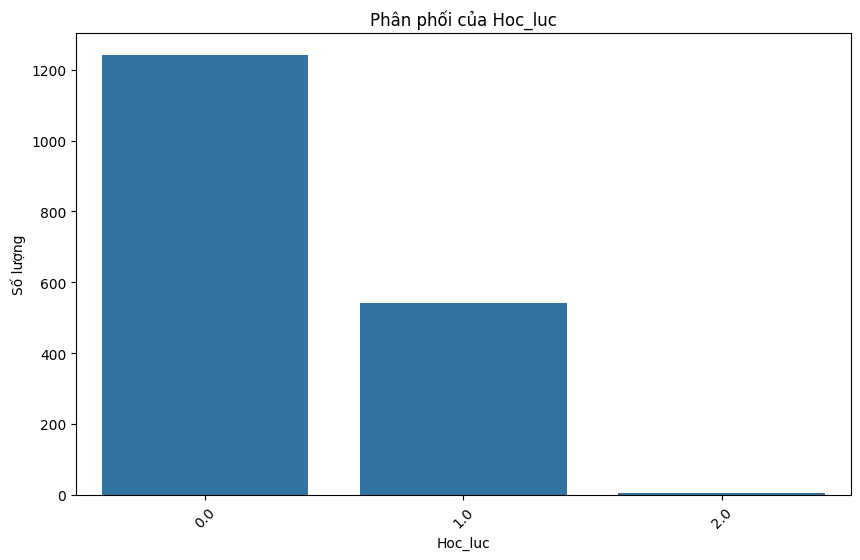

Hoc_luc
0.0    1241
1.0     543
2.0       5
Name: count, dtype: int64


In [97]:
plot_bar_chart(df, 'Hoc_luc')
print(df['Hoc_luc'].value_counts(dropna=False))

In [98]:
# Xử lý các giá trị NaN và 3.0 trong cột 'Hanh_kiem'
df['Hanh_kiem'] = df['Hanh_kiem'].replace(2.0, np.nan)

# Lọc dữ liệu có giá trị 'Hanh_kiem' không phải NaN
df_known = df.dropna(subset=['Hanh_kiem'])
df_unknown = df[df['Hanh_kiem'].isna()]

# Kiểm tra nếu df_unknown không rỗng
if df_unknown.empty:
    print("Không có dòng nào có giá trị 'Hanh_kiem' là NaN.")
else:
    # Các cột đặc trưng
    features = ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 
                'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

    # Tạo X_known và y_known
    X_known = df_known[features].copy()
    y_known = df_known['Hanh_kiem']

    # Mã hóa các biến phân loại
    label_encoders = {}
    for feature in features:
        le = LabelEncoder()
        X_known[feature] = le.fit_transform(X_known[feature].astype(str))
        label_encoders[feature] = le

    # Tạo bộ dữ liệu không biết giá trị và mã hóa
    X_unknown = df_unknown[features].copy()
    for feature in features:
        if X_unknown[feature].dtype == 'object':
            X_unknown[feature] = label_encoders[feature].transform(X_unknown[feature].astype(str))
        else:
            X_unknown[feature] = X_unknown[feature].astype(float)  # Đảm bảo kiểu dữ liệu đúng

    # Kiểm tra nếu X_unknown không rỗng
    if X_unknown.empty:
        print("Dữ liệu không hợp lệ trong X_unknown.")
    else:
        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
        X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

        # Khởi tạo và huấn luyện mô hình hồi quy logistic
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Dự đoán các giá trị 'Hanh_kiem' trên tập kiểm tra
        y_pred = model.predict(X_test)
        print('Accuracy on test set:', accuracy_score(y_test, y_pred))

        # Dự đoán giá trị 'Hanh_kiem' cho các dòng không biết
        y_pred_unknown = model.predict(X_unknown)

        # Cập nhật DataFrame với các giá trị đã dự đoán
        df.loc[df['Hanh_kiem'].isna(), 'Hanh_kiem'] = y_pred_unknown

        # Kiểm tra kết quả
        print('Giá trị sau khi dự đoán bằng hồi quy logistic\n', df['Hanh_kiem'].value_counts(dropna=False), '\n')


Accuracy on test set: 0.9969325153374233
Giá trị sau khi dự đoán bằng hồi quy logistic
 Hanh_kiem
0.0    1773
1.0      16
Name: count, dtype: int64 



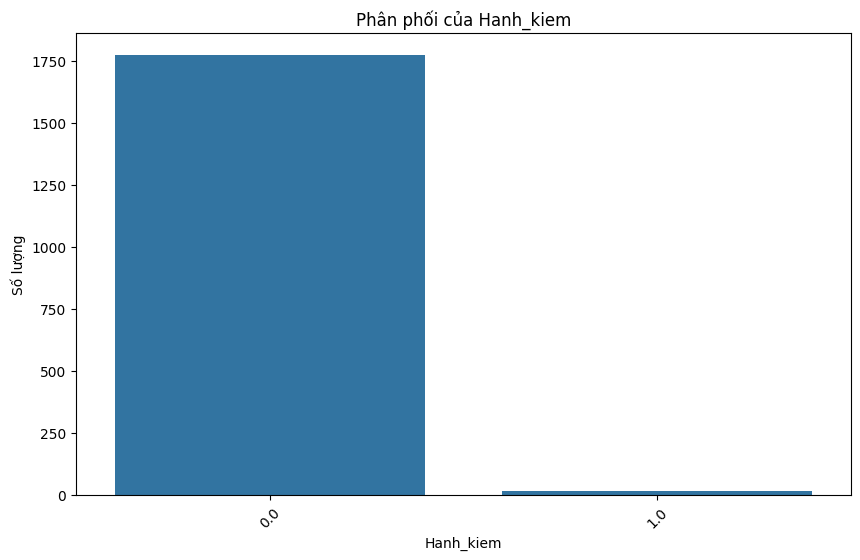

Hanh_kiem
0.0    1773
1.0      16
Name: count, dtype: int64


In [99]:
plot_bar_chart(df, 'Hanh_kiem')
print(df['Hanh_kiem'].value_counts(dropna=False))

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1789 entries, 0 to 927
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          1789 non-null   int64  
 1   To_hop       1789 non-null   int32  
 2   KVUT         1789 non-null   float64
 3   GraYear      1789 non-null   int32  
 4   Hoc_luc      1789 non-null   float64
 5   Hanh_kiem    1789 non-null   float64
 6   ETH          1789 non-null   int64  
 7   Habit        1789 non-null   int64  
 8   Fjob         1789 non-null   object 
 9   TB_HK1       1789 non-null   int64  
 10  CN1          1789 non-null   int64  
 11  CN2          1789 non-null   int64  
 12  ScoTHPT1     1789 non-null   int64  
 13  ScoTHPT2     1789 non-null   int64  
 14  ScoTHPT3     1789 non-null   int64  
 15  ScoTHPT      1789 non-null   int64  
 16  K12_Math     1789 non-null   int64  
 17  K12_Ling     1789 non-null   int64  
 18  K12_Flang    1789 non-null   int64  
 19  K12_Phys    

# Làm sạch dữ liệu cột Mjob và Fjob bằng mô hình PhoBERT và tokenizer sau đó phân cụm nó

In [101]:
# Tải mô hình PhoBERT và tokenizer
phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


b:\DoAnTotNghiep\DATA_Giaoduc\.venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vongu\.cache\huggingface\hub\models--vinai--phobert-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



In [102]:
# Chuyển đổi các giá trị trong cột 'Fjob' thành tensor
encoded_inputs = tokenizer(df['Fjob'].tolist(), padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    features = phobert(**encoded_inputs)
    embeddings = features.last_hidden_state.mean(dim=1)  # Lấy trung bình các vector đặc trưng

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

In [103]:
# Áp dụng K-Means để phân cụm
kmeans = KMeans(n_clusters=5, random_state=42)
df['Fjob_Cluster'] = kmeans.fit_predict(embeddings)

In [104]:
# Giảm số chiều xuống 3 chiều để dễ dàng vẽ biểu đồ 3D
pca = PCA(n_components=3)
embedding_3d = pca.fit_transform(embeddings.numpy())
# Thêm kết quả PCA vào DataFrame
df['PCA1'] = embedding_3d[:, 0]
df['PCA2'] = embedding_3d[:, 1]
df['PCA3'] = embedding_3d[:, 2]

# Tạo biểu đồ 3D
fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3', color='Fjob_Cluster', 
                    hover_data=['Fjob'],
                    title="Phân Cụm Các Nghề Nghiệp Bằng DBSCAN")

# Hiển thị biểu đồ
fig.show()

# <h1>Xuất file sau khi đã làm sạch dữ liệu v0</h1>

In [105]:
df = df.drop(columns=['PCA1', 'PCA2','PCA3','Mjob','Fjob' ], errors='ignore')
df.to_csv('data/DataFinal/model/raw/data_clean_v0.csv')

In [106]:
df = pd.read_csv('data/DataFinal/model/raw/data_clean_v0.csv')
df = df.drop(columns=['Unnamed: 0'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           1789 non-null   int64  
 1   To_hop        1789 non-null   int64  
 2   KVUT          1789 non-null   float64
 3   GraYear       1789 non-null   int64  
 4   Hoc_luc       1789 non-null   float64
 5   Hanh_kiem     1789 non-null   float64
 6   ETH           1789 non-null   int64  
 7   Habit         1789 non-null   int64  
 8   TB_HK1        1789 non-null   int64  
 9   CN1           1789 non-null   int64  
 10  CN2           1789 non-null   int64  
 11  ScoTHPT1      1789 non-null   int64  
 12  ScoTHPT2      1789 non-null   int64  
 13  ScoTHPT3      1789 non-null   int64  
 14  ScoTHPT       1789 non-null   int64  
 15  K12_Math      1789 non-null   int64  
 16  K12_Ling      1789 non-null   int64  
 17  K12_Flang     1789 non-null   int64  
 18  K12_Phys      1789 non-null 

# <h1>Trực quan hóa phân bố dữ liệu</h1>

In [108]:

# Tính toán số hàng và cột dựa trên số lượng cột trong df
columns_to_plot = df.columns
n_cols = 3  # Giả sử bạn muốn có 4 cột trong mỗi hàng
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Khởi tạo subplot
fig = sp.make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns_to_plot)

# Tạo một danh sách các màu sắc ngẫu nhiên cho biểu đồ
random_colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in columns_to_plot]

# Vẽ biểu đồ phân phối cho từng biến
for i, (column, color) in enumerate(zip(columns_to_plot, random_colors)):
    row = i // n_cols + 1
    col = i % n_cols + 1

    fig.add_trace(
        go.Histogram(x=df[column], marker=dict(color=color), name=column, showlegend=False),
        row=row, col=col
    )

    fig.update_xaxes(title_text=f'{column}', row=row, col=col)
    fig.update_yaxes(title_text=f'{column} Count', row=row, col=col)

# Chỉnh layout và hiển thị biểu đồ
fig.update_layout(height=500 * n_rows, width=1100, title_text="Biểu Đồ Phân Bố Dữ Liệu")
fig.show()



In [109]:
# Tính toán số hàng và cột dựa trên số lượng cột trong df
columns_to_plot = df.columns
n_cols = 3  # Giả sử bạn muốn có 4 cột trong mỗi hàng
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Khởi tạo subplot
fig = sp.make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns_to_plot)

# Tạo một danh sách các màu sắc ngẫu nhiên cho biểu đồ
random_colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in columns_to_plot]

# Vẽ box plot cho từng cột
for i, (column, color) in enumerate(zip(columns_to_plot, random_colors)):
    row = i // n_cols + 1
    col = i % n_cols + 1

    fig.add_trace(
        go.Box(y=df[column], marker=dict(color=color), name=column, showlegend=False),
        row=row, col=col
    )

    fig.update_xaxes(title_text=f'{column} Box Plot', row=row, col=col)
    fig.update_yaxes(title_text=f'{column} Value', row=row, col=col)

# Chỉnh layout và hiển thị biểu đồ
fig.update_layout(height=400 * n_rows, width=1100, title_text="Biểu Đồ Box Plot Các Cột Dữ Liệu")
fig.show()


In [110]:
from plotly.subplots import make_subplots
df_visualize = df.copy()
# Tạo biểu đồ cột phân bố số lượng sinh viên theo giới tính
sex_counts = df_visualize['Sex'].value_counts()
sex_labels = {0: 'Nam', 1: 'Nữ'}
sex_counts.index = sex_counts.index.map(sex_labels)

bar_fig = go.Figure()

bar_fig.add_trace(go.Bar(
    x=sex_counts.index,
    y=sex_counts.values,
    name='Số lượng sinh viên',
    marker_color=['blue', 'pink']
))

bar_fig.update_layout(
    title='Phân bố số lượng sinh viên theo giới tính',
    xaxis_title='Giới tính',
    yaxis_title='Số lượng sinh viên',
    xaxis=dict(tickvals=[0, 1], ticktext=['Nam', 'Nữ']),
    showlegend=False
)

# Tạo biểu đồ boxplot cho toàn bộ giá trị trong cột 'Sex'
box_fig = go.Figure()

box_fig.add_trace(go.Box(
    y=df_visualize['Sex'],
    name='Giới tính',
    boxmean='sd'
))

box_fig.update_layout(
    title='Boxplot giá trị cột Giới tính',
    yaxis_title='Giới tính',
    yaxis=dict(tickvals=[0, 1], ticktext=['Nam', 'Nữ']),
    showlegend=False
)

# Tạo layout cho hai biểu đồ nằm trong một hàng
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Biểu đồ cột', 'Boxplot'))

fig.add_trace(bar_fig.data[0], row=1, col=1)
fig.add_trace(box_fig.data[0], row=1, col=2)

fig.update_layout(
    title_text='Trực quan hóa dữ liệu giới tính',
    showlegend=False
)

fig.show()

                   Sex    To_hop      KVUT   GraYear   Hoc_luc  Hanh_kiem  \
Sex           1.000000  0.117428 -0.048199 -0.008490 -0.062610  -0.098574   
To_hop        0.117428  1.000000  0.001851  0.036401  0.053105   0.013723   
KVUT         -0.048199  0.001851  1.000000  0.078201  0.458801   0.083267   
GraYear      -0.008490  0.036401  0.078201  1.000000 -0.020271  -0.024558   
Hoc_luc      -0.062610  0.053105  0.458801 -0.020271  1.000000   0.165564   
Hanh_kiem    -0.098574  0.013723  0.083267 -0.024558  0.165564   1.000000   
ETH          -0.099721  0.003842 -0.065551 -0.014359 -0.168172   0.027489   
Habit        -0.000050  0.006224  0.004518  0.148617  0.005476   0.012043   
TB_HK1       -0.014279  0.161569  0.111125  0.182687  0.111482   0.018126   
CN1          -0.049677 -0.065819  0.000727 -0.081713 -0.025560  -0.011356   
CN2           0.002488 -0.055066  0.023426  0.163386  0.002070  -0.035539   
ScoTHPT1     -0.018047  0.343967  0.089750  0.071425  0.209826   0.113590   

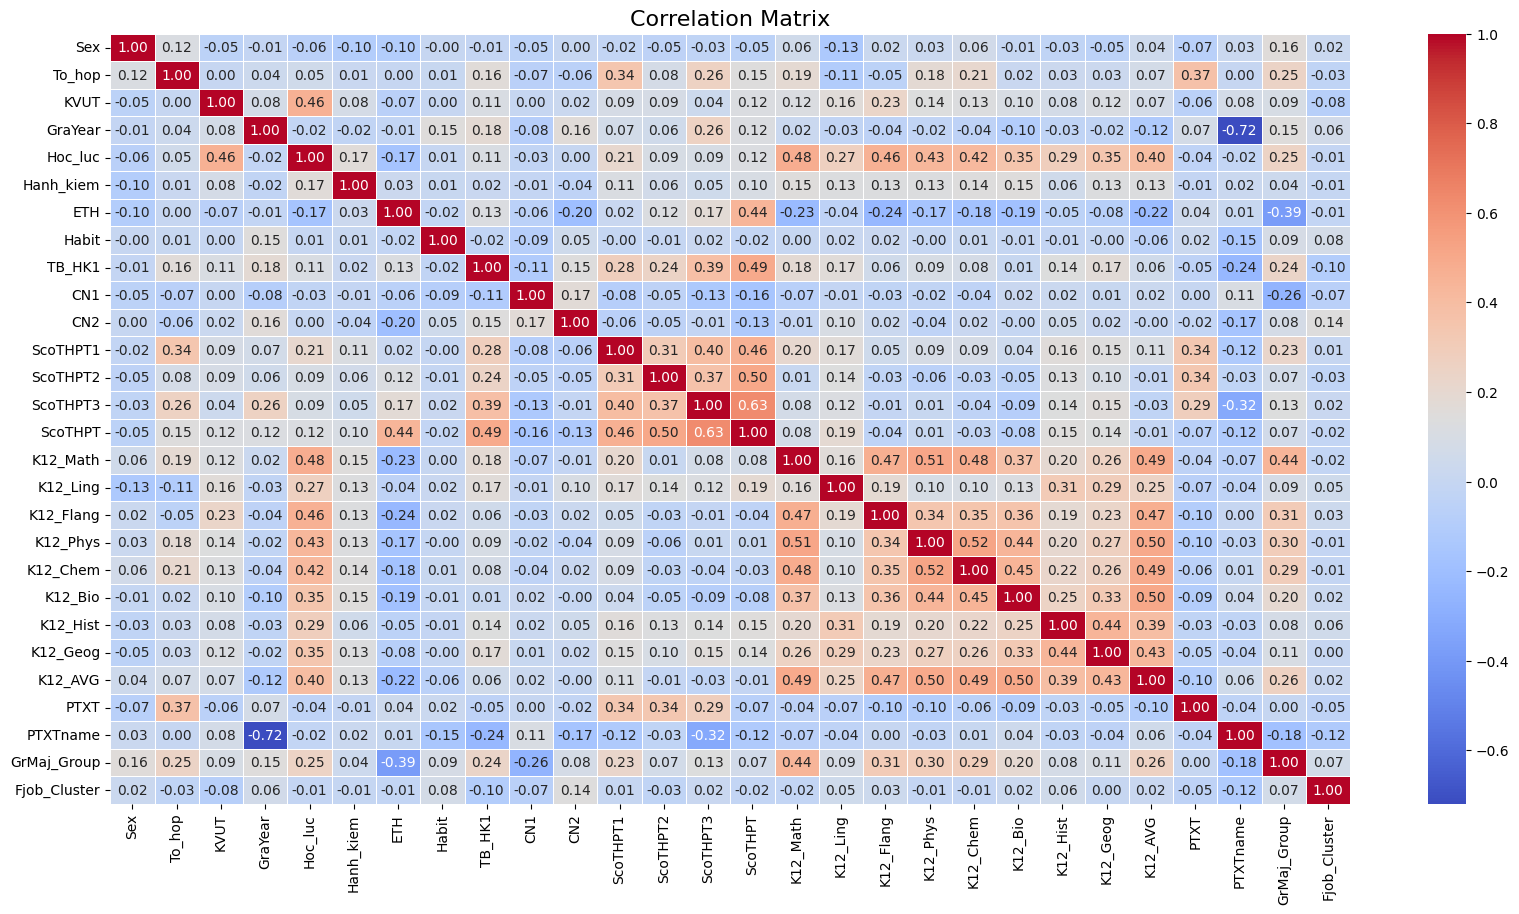

In [111]:
corr_matrix = df.corr()
print(corr_matrix)
# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [112]:
# Tính toán ma trận tương quan giữa các cột cần thiết
corr_subset = df[['GraYear', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'TB_HK1']].corr()
# In ra màn hình tỷ lệ tương quan
print(corr_subset)

           GraYear  ScoTHPT1  ScoTHPT2  ScoTHPT3    TB_HK1
GraYear   1.000000  0.071425  0.058099  0.257704  0.182687
ScoTHPT1  0.071425  1.000000  0.311554  0.398173  0.284687
ScoTHPT2  0.058099  0.311554  1.000000  0.368117  0.243885
ScoTHPT3  0.257704  0.398173  0.368117  1.000000  0.387746
TB_HK1    0.182687  0.284687  0.243885  0.387746  1.000000


Ảnh Hưởng của GraYear: Dựa trên các hệ số tương quan, GraYear không có ảnh hưởng rõ rệt đến điểm số trong các kỳ thi THPT (ScoTHPT1, ScoTHPT2, ScoTHPT3).<br> Các hệ số tương quan rất thấp cho thấy không có mối liên hệ đáng kể giữa năm tốt nghiệp và điểm số và output là TB_HK1. Nên quyết định xóa cột dữ liệu này đi.

In [113]:
# df = df.drop(columns=['GraYear' ], errors='ignore')

- Ảnh Hưởng của PTXTname: Dựa trên các hệ số tương quan, PTXTname có hệ số tương quan rất thấp cho thấy không có mối liên hệ đáng kể giữa PTXTname và <br>các cột dữ liệu, chỉ tương quan ngược chiều mạnh nhất PTXT mà bản thân PTXT cũng đã đại diện cho PTXTname. Nên quyết định xóa cột dữ liệu này đi.
- PTXT có 4 giá trị khác nhau nhưng 1 giá trị có số lượng rất lớn áp đảo các giá trị còn lại, sẽ ảnh hưởng xấu đến mô hình nên quyết định xóa nó đi
- Hanh_kiem cũng tương tự

In [114]:
df = df.drop(columns=['PTXTname','PTXT','Hanh_kiem' ], errors='ignore')

                TB_HK1
TB_HK1        1.000000
ScoTHPT       0.490704
ScoTHPT3      0.387746
ScoTHPT1      0.284687
ScoTHPT2      0.243885
GrMaj_Group   0.239943
K12_Math      0.183722
GraYear       0.182687
K12_Geog      0.170011
K12_Ling      0.166198
To_hop        0.161569
CN2           0.145065
K12_Hist      0.136114
ETH           0.126171
Hoc_luc       0.111482
KVUT          0.111125
K12_Phys      0.094408
K12_Chem      0.082186
K12_Flang     0.057894
K12_AVG       0.057054
K12_Bio       0.011896
Sex          -0.014279
Habit        -0.023555
Fjob_Cluster -0.098160
CN1          -0.113314


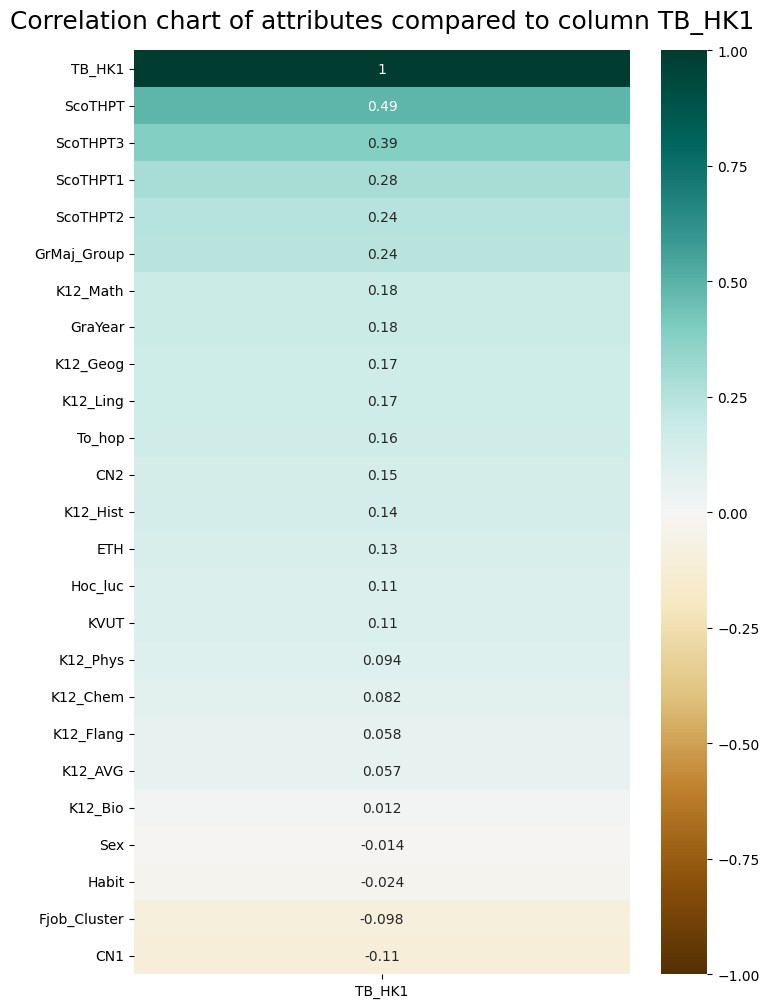

In [115]:
correlation_matrix = df.corr()
# Lấy độ tương quan của tất cả các cột với cột 'TB_HK1'
tb_hk1_correlation = correlation_matrix[['TB_HK1']].sort_values(by='TB_HK1', ascending=False)

# In ra màn hình các giá trị tương quan với cột 'TB_HK1'
print(tb_hk1_correlation)

# Trực quan hóa các giá trị tương quan bằng heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(tb_hk1_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation chart of attributes compared to column TB_HK1', fontdict={'fontsize':18}, pad=16)
plt.show()

- Tương quan mạnh với ScoTHPT: Cột ScoTHPT có tương quan cao nhất với TB_HK1 (0.582667). Điều này cho thấy điểm trung bình học kỳ 1 (TB_HK1) có mối quan hệ khá chặt chẽ với điểm tổng kết của học sinh trong kỳ thi THPT.

- Tương quan trung bình với ScoTHPT3, CN2, ScoTHPT2: Các biến này có tương quan trung bình với TB_HK1, với giá trị tương quan lần lượt là 0.381950, 0.322585, và 0.297622. Điều này chỉ ra rằng điểm tổng kết của học sinh trong các năm học khác và các môn học khác cũng có ảnh hưởng nhất định đến TB_HK1.

- Tương quan yếu với các biến khác: Một số biến như CN1, To_hop, K12_Ling, K12_Math... có độ tương quan yếu với TB_HK1, với giá trị từ khoảng 0.2 đến 0.1. Mặc dù các biến này có ảnh hưởng đến TB_HK1, nhưng không phải là yếu tố quyết định.

- Tương quan âm với PTXT, Sex, Habit: Các biến này có tương quan âm với TB_HK1, với giá trị tương quan lần lượt là -0.041580, -0.068646, và -0.083303. Điều này cho thấy rằng những biến này có xu hướng giảm khi TB_HK1 tăng, mặc dù ảnh hưởng của chúng không quá đáng kể.

In [116]:
df_visualize = df.copy()

              ScoTHPT3
ScoTHPT3      1.000000
ScoTHPT       0.630401
ScoTHPT1      0.398173
TB_HK1        0.387746
ScoTHPT2      0.368117
To_hop        0.258564
GraYear       0.257704
ETH           0.174098
K12_Geog      0.153963
K12_Hist      0.138654
GrMaj_Group   0.133753
K12_Ling      0.120245
Hoc_luc       0.093376
K12_Math      0.075108
KVUT          0.038901
Habit         0.017930
Fjob_Cluster  0.016412
K12_Phys      0.010133
CN2          -0.011005
K12_Flang    -0.012463
Sex          -0.032310
K12_AVG      -0.034209
K12_Chem     -0.035577
K12_Bio      -0.087480
CN1          -0.132388


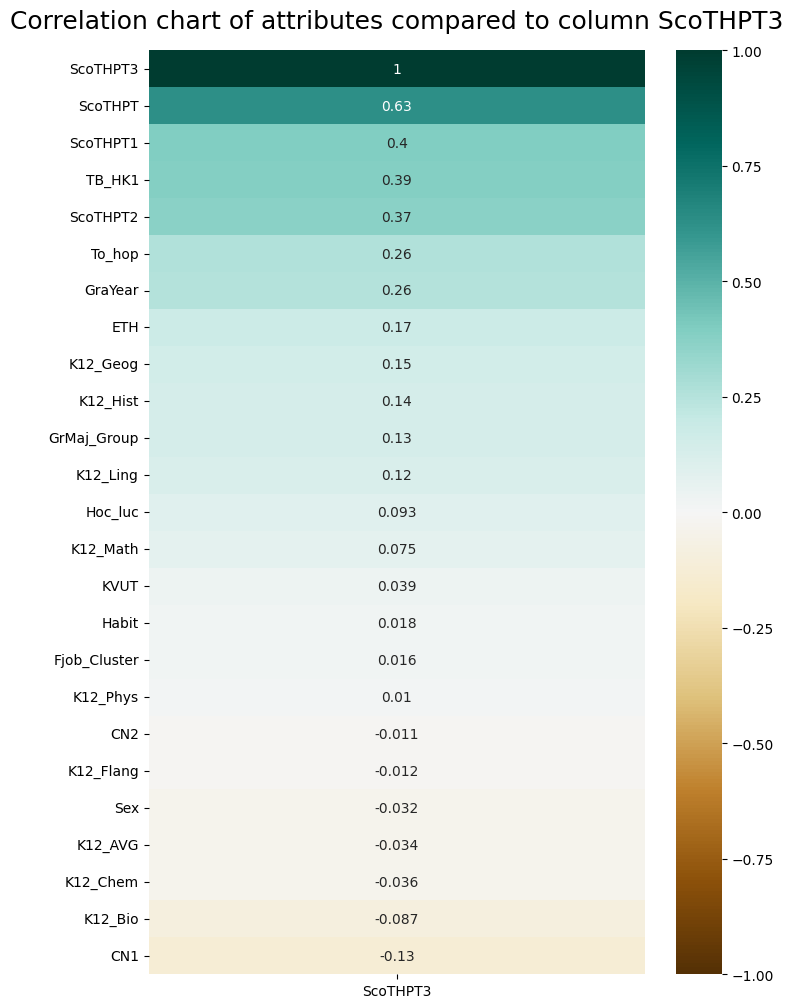

In [117]:
correlation_matrix = df.corr()
# Lấy độ tương quan của tất cả các cột với cột 'TB_HK1'
tb_hk1_correlation = correlation_matrix[['ScoTHPT3']].sort_values(by='ScoTHPT3', ascending=False)

# In ra màn hình các giá trị tương quan với cột 'TB_HK1'
print(tb_hk1_correlation)

# Trực quan hóa các giá trị tương quan bằng heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(tb_hk1_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation chart of attributes compared to column ScoTHPT3', fontdict={'fontsize':18}, pad=16)
plt.show()

In [118]:
df_visualize = pd.DataFrame()

In [6]:
def reverse_TBHK1(diem):
    if diem == 0:
        return "GPA > 2.5"
    elif diem == 1:
        return "GPA <2.5"

(array([0, 1]), [Text(0, 0, 'GPA <2.5'), Text(1, 0, 'GPA > 2.5')])

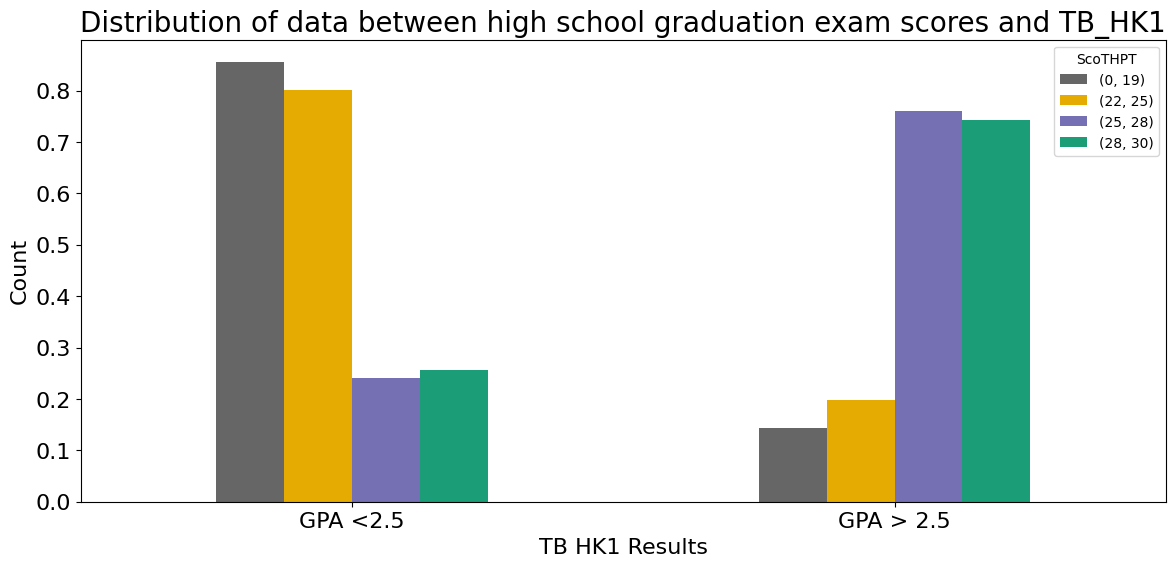

In [120]:
def reverse_function_ScoTHPT(score):
    if score == 0:
        return "(28, 30)"
    elif score == 1:
        return "(25, 28)"
    elif score == 2:
        return "(22, 25)"
    elif score == 3:
        return "(0, 19)"

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)
df_visualize['ScoTHPT'] = df['ScoTHPT'].apply(reverse_function_ScoTHPT)

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['ScoTHPT'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between high school graduation exam scores and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


Nhận xét: 
- Những sinh viên có kết quả xuất sắc và giỏi thường có điểm tốt nghiệp thpt từ 25 trở lên
- Những sinh viên có kết quả khá ,trung bình và kém thường có điểm tốt nghiệp thpt từ 19 điểm đến 22

In [4]:
df = pd.read_csv('data/DataFinal/model/raw/data_clean_v0.csv')

(array([0, 1]), [Text(0, 0, 'GPA <2.5'), Text(1, 0, 'GPA > 2.5')])

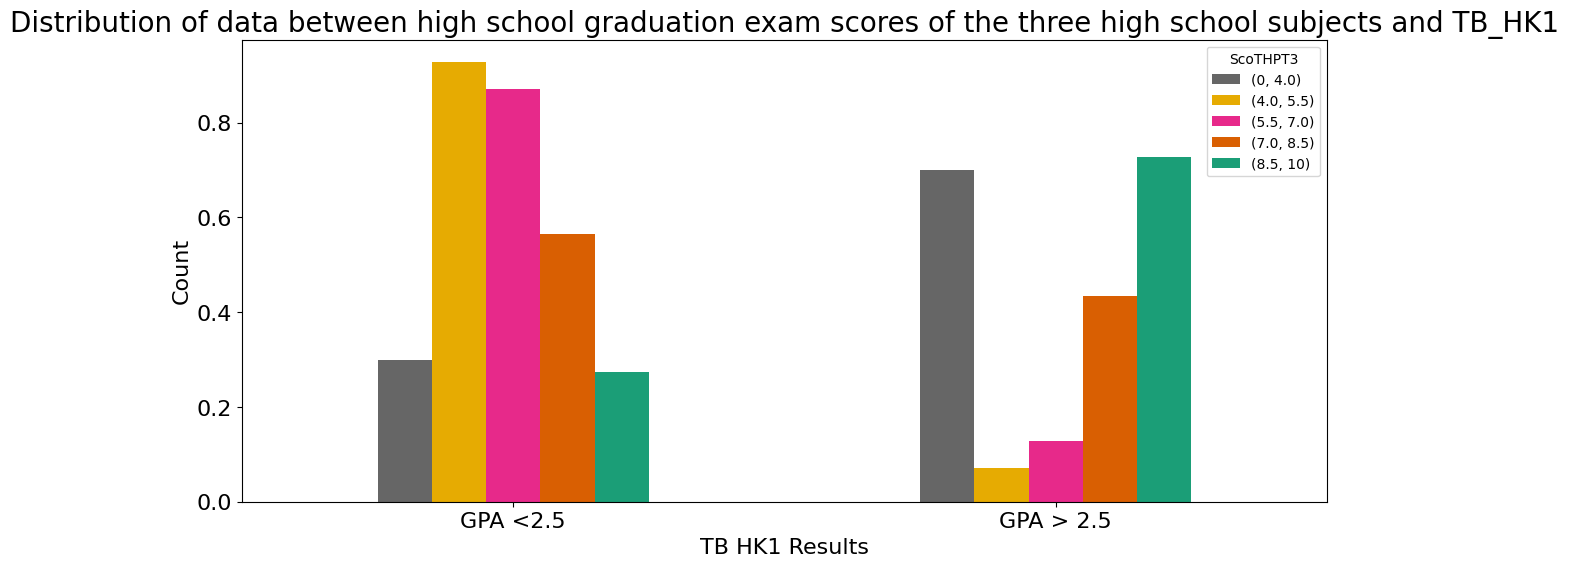

In [7]:
df_visualize = pd.read_csv('data/DataFinal/model/raw/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])
df_visualize = df.copy()

def reverse_function_ScoTHPT2(numeric_score):
    if numeric_score == 0:
        return "(8.5, 10)"
    elif numeric_score == 1:
        return "(7.0, 8.5)"
    elif numeric_score == 2:
        return "(5.5, 7.0)"
    elif numeric_score == 3:
        return "(4.0, 5.5)"
    elif numeric_score == 4:
        return "(0, 4.0)"
    else:
        return None  # for invalid numeric scores



df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)
df_visualize['ScoTHPT3'] = df['ScoTHPT3'].apply(reverse_function_ScoTHPT2)

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['ScoTHPT3'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between high school graduation exam scores of the three high school subjects and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


Nhận xét: 
- Những sinh viên có kết quả xuất sắc thường là những sinh viên có điểm thi thpt môn thứ 3 trên 8.5
- Những sinh viên có kết quả giỏi và khá thường là những sinh viên có điểm thi thpt môn thứ 3 trên 8.5 hoặc dưới 4 điểm 
- Những sinh viên có kết quả trung bình thường là những sinh viên có điểm thi thpt môn thứ 3 từ 5.5 đến 7
- Những sinh viên có kết quả yếu thường là những sinh viên có điểm thi thpt môn thứ 3 dưới từ 4 đến 5.5

Text(0, 0.5, 'Count')

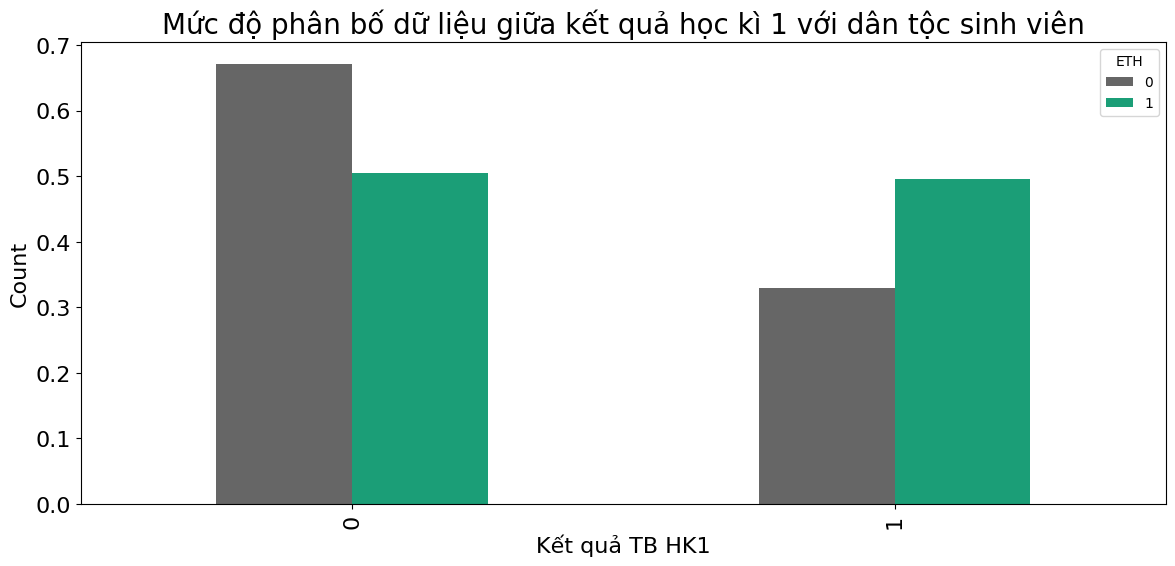

In [122]:
perc = (lambda col: col/col.sum())
index = [0,1]
higher_tab = pd.crosstab(index=df['TB_HK1'], columns=df['ETH'])
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Mức độ phân bố dữ liệu giữa kết quả học kì 1 với dân tộc sinh viên', fontsize=20)
plt.xlabel('Kết quả TB HK1', fontsize=16)
plt.ylabel('Count', fontsize=16)

Nhận xét: 
- Những sinh viên có kết quả xuất sắc, giỏi và khá thường là những sinh viên dân tộc thiểu số

Text(0, 0.5, 'Count')

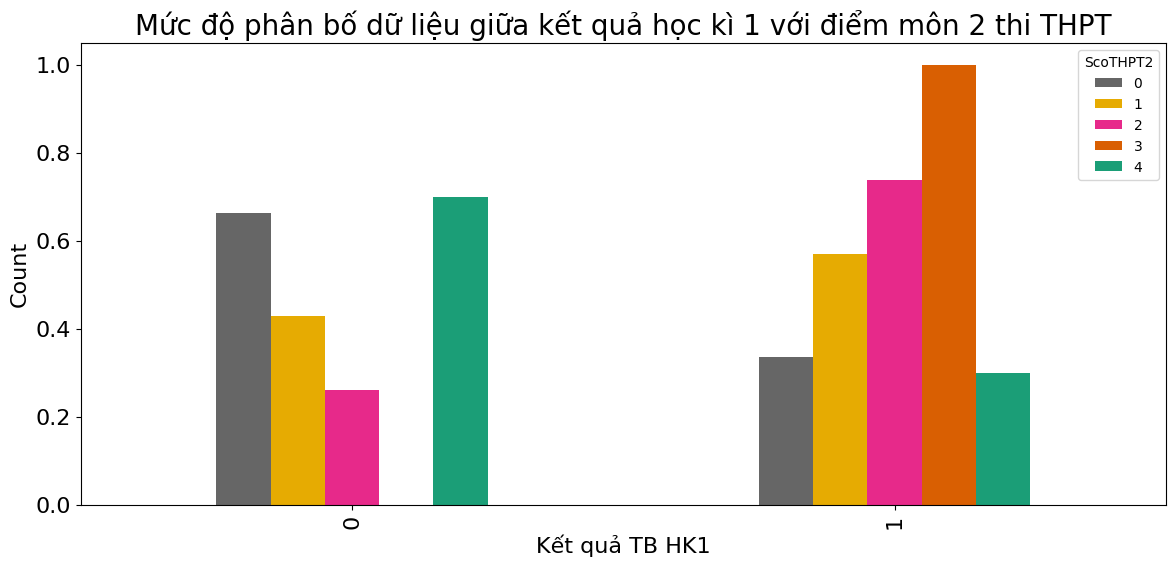

In [123]:
perc = (lambda col: col/col.sum())
index = [0,1]
higher_tab = pd.crosstab(index=df['TB_HK1'], columns=df['ScoTHPT2'])
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Mức độ phân bố dữ liệu giữa kết quả học kì 1 với điểm môn 2 thi THPT', fontsize=20)
plt.xlabel('Kết quả TB HK1', fontsize=16)
plt.ylabel('Count', fontsize=16)

Nhận xét: 
- Những sinh viên có kết quả xuất sắc thường là những sinh viên có điểm thi thpt môn thứ 2 trên 7
- Những sinh viên có kết quả giỏi và khá thường là những sinh viên có điểm thi thpt môn thứ 2 trên 8.5 hoặc dưới 4 điểm 
- Những sinh viên có kết quả trung bình thường là những sinh viên có điểm thi thpt môn thứ 2 từ 5.5 đến 7
- Những sinh viên có kết quả yếu thường là những sinh viên có điểm thi thpt môn thứ 2 dưới từ 4 đến 5.5

(array([0, 1]), [Text(0, 0, 'GPA <2.5'), Text(1, 0, 'GPA > 2.5')])

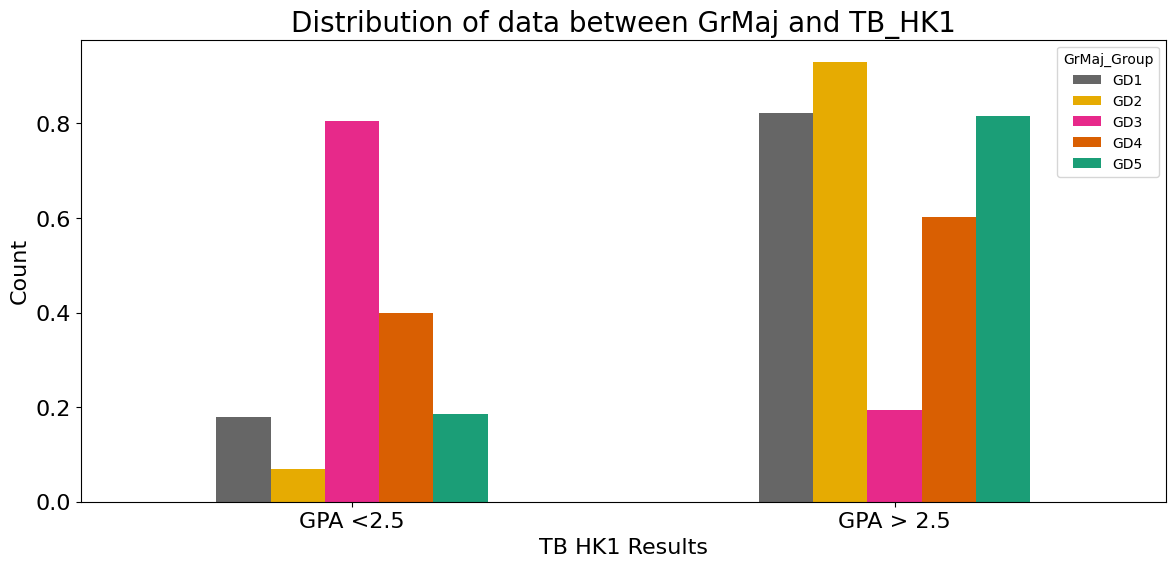

In [125]:
df_visualize = pd.read_csv('data/DataFinal/model/raw/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)

# Load mô hình LabelEncoder
label_encoder = joblib.load('B:/DoAnTotNghiep/DATA_Giaoduc/label_encoder/GrMaj_Group_labelencoder.pkl')  # Thay đổi đường dẫn nếu cần

# Giả sử df_visualize là DataFrame đã được tạo trước đó
df_visualize['GrMaj_Group'] = label_encoder.inverse_transform(df['GrMaj_Group'])

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['GrMaj_Group'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between GrMaj and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'GPA <2.5'), Text(1, 0, 'GPA > 2.5')])

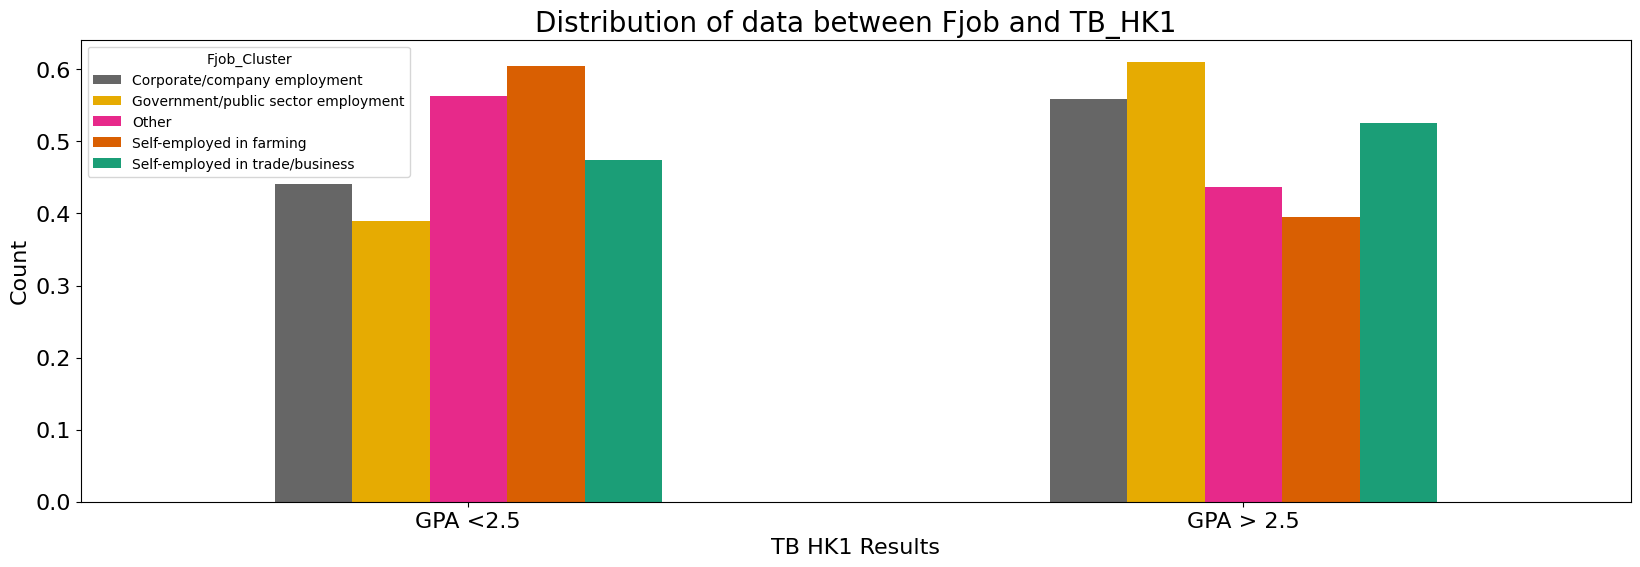

In [138]:
df_visualize = pd.read_csv('data/DataFinal/model/raw/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)

def reverse_function_Fjob(value):
    if value == 0:
        return "Other"
    elif value == 1:
        return "Corporate/company employment"
    elif value == 2:
        return "Self-employed in trade/business"
    elif value == 3:
        return "Self-employed in farming"
    elif value == 4:
        return "Government/public sector employment"
    else:
        return None  # for invalid numeric scores

df_visualize['Fjob_Cluster'] = df['Fjob_Cluster'].apply(reverse_function_Fjob)

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['Fjob_Cluster'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(20, 6), fontsize=16)
plt.title('Distribution of data between Fjob and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


In [142]:

df_visualize = pd.read_csv('data/DataFinal/model/raw/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)

# Load mô hình LabelEncoder
label_encoder = joblib.load('B:/DoAnTotNghiep/DATA_Giaoduc/label_encoder/To_hop_labelencoder.pkl')  # Thay đổi đường dẫn nếu cần

# Giả sử df_visualize là DataFrame đã được tạo trước đó
df_visualize['To_hop'] = label_encoder.inverse_transform(df['To_hop'])

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['To_hop'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="tab20", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between To_hop and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


(array([0, 1]), [Text(0, 0, 'GPA <2.5'), Text(1, 0, 'GPA > 2.5')])

# <h1>Xuất file làm sạch v1</h1>

In [186]:
df.to_csv('data/DataFinal/model/raw/data_clean_v1.csv')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           1789 non-null   int64  
 1   To_hop        1789 non-null   int64  
 2   KVUT          1789 non-null   float64
 3   GraYear       1789 non-null   int64  
 4   Hoc_luc       1789 non-null   float64
 5   ETH           1789 non-null   int64  
 6   Habit         1789 non-null   int64  
 7   TB_HK1        1789 non-null   int64  
 8   CN1           1789 non-null   int64  
 9   CN2           1789 non-null   int64  
 10  ScoTHPT1      1789 non-null   int64  
 11  ScoTHPT2      1789 non-null   int64  
 12  ScoTHPT3      1789 non-null   int64  
 13  ScoTHPT       1789 non-null   int64  
 14  K12_Math      1789 non-null   int64  
 15  K12_Ling      1789 non-null   int64  
 16  K12_Flang     1789 non-null   int64  
 17  K12_Phys      1789 non-null   int64  
 18  K12_Chem      1789 non-null 

In [188]:
df_clean = pd.DataFrame()
df_clean = df

# <h1>Huấn luyện mô hình</h1>

In [58]:
import pandas as pd
import numpy as np
import warnings
import joblib
import plotly.figure_factory as ff

from xgboost import XGBRegressor, XGBClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.metrics import make_scorer,accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import classification_report ,roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning


In [191]:
df_clean = pd.read_csv('data/data/data/DataFinal/model/raw/data_clean_v1.csv')
df_clean = df_clean.drop(columns=['Unnamed: 0'])

In [192]:
show_infor_dataframe(df_clean)

Column 'Sex' has 2 unique values:
[0 1]


Column 'To_hop' has 11 unique values:
[ 1  4  0  2  3  5  6  7  8 10  9]


Column 'KVUT' has 2 unique values:
[1. 3.]


Column 'GraYear' has 8 unique values:
[6 1 5 3 4 2 7 0]


Column 'Hoc_luc' has 3 unique values:
[1. 0. 2.]


Column 'ETH' has 2 unique values:
[1 0]


Column 'Habit' has 2 unique values:
[0 1]


Column 'TB_HK1' has 2 unique values:
[1 0]


Column 'CN1' has 5 unique values:
[1 0 2 3 4]


Column 'CN2' has 5 unique values:
[2 1 3 0 4]


Column 'ScoTHPT1' has 5 unique values:
[0 1 2 3 4]


Column 'ScoTHPT2' has 5 unique values:
[1 0 2 3 4]


Column 'ScoTHPT3' has 5 unique values:
[0 1 3 2 4]


Column 'ScoTHPT' has 4 unique values:
[1 0 2 3]


Column 'K12_Math' has 4 unique values:
[1 0 3 2]


Column 'K12_Ling' has 4 unique values:
[1 0 2 4]


Column 'K12_Flang' has 5 unique values:
[1 0 2 3 4]


Column 'K12_Phys' has 5 unique values:
[0 1 2 3 4]


Column 'K12_Chem' has 4 unique values:
[2 0 1 3]


Column 'K12_Bio' has 4 unique val

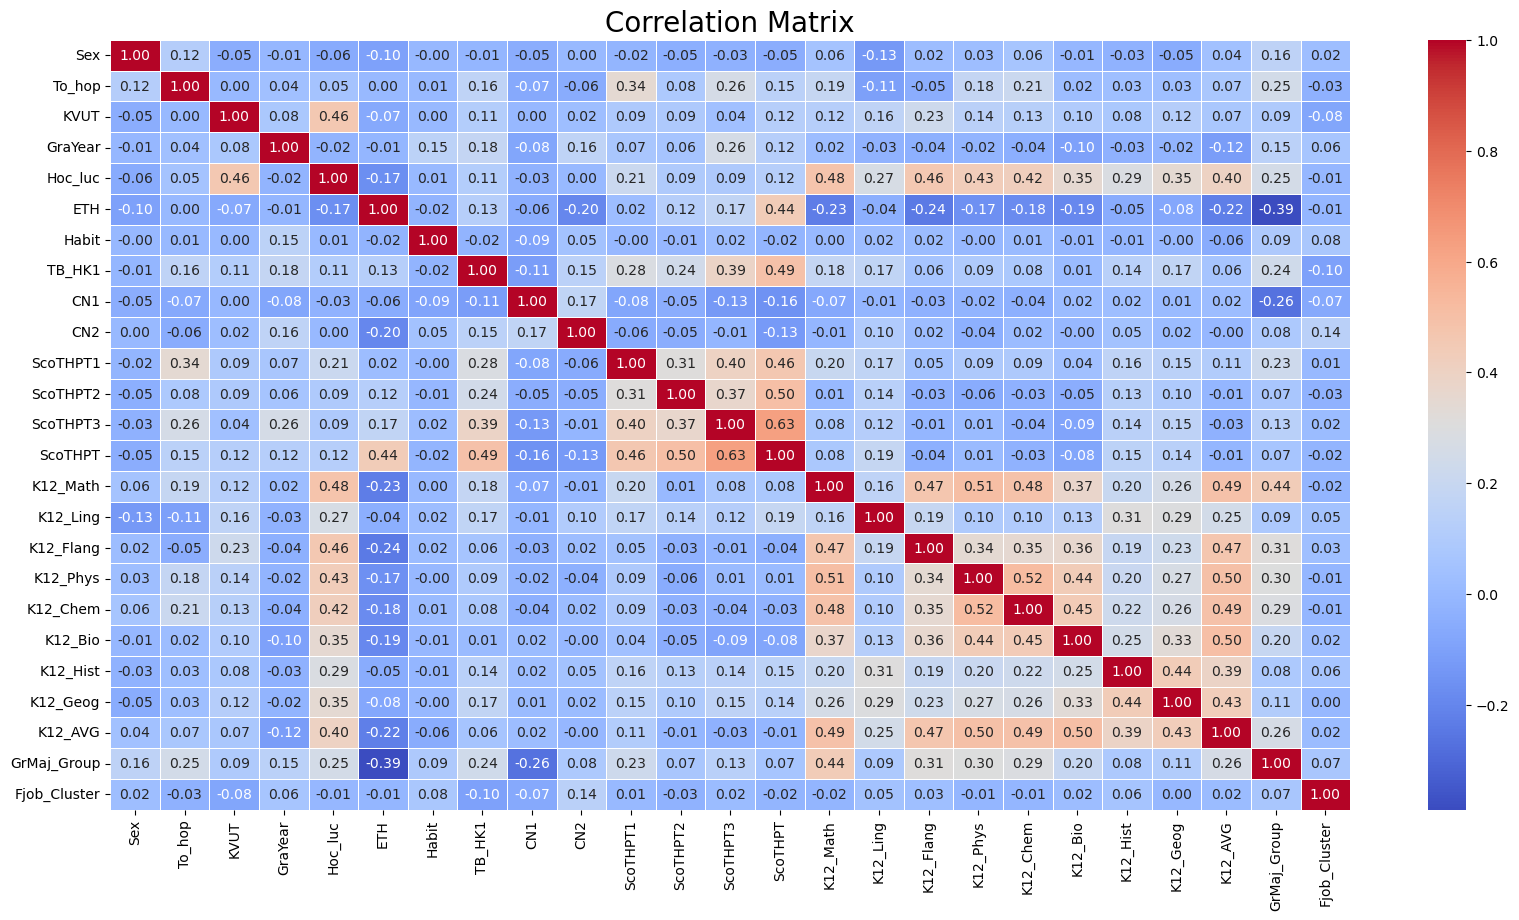

In [193]:
corr_matrix = df_clean.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

                TB_HK1
TB_HK1        1.000000
ScoTHPT       0.490704
ScoTHPT3      0.387746
ScoTHPT1      0.284687
ScoTHPT2      0.243885
GrMaj_Group   0.239943
K12_Math      0.183722
GraYear       0.182687
K12_Geog      0.170011
K12_Ling      0.166198
To_hop        0.161569
CN2           0.145065
K12_Hist      0.136114
ETH           0.126171
Hoc_luc       0.111482
KVUT          0.111125
K12_Phys      0.094408
K12_Chem      0.082186
K12_Flang     0.057894
K12_AVG       0.057054
K12_Bio       0.011896
Sex          -0.014279
Habit        -0.023555
Fjob_Cluster -0.098160
CN1          -0.113314


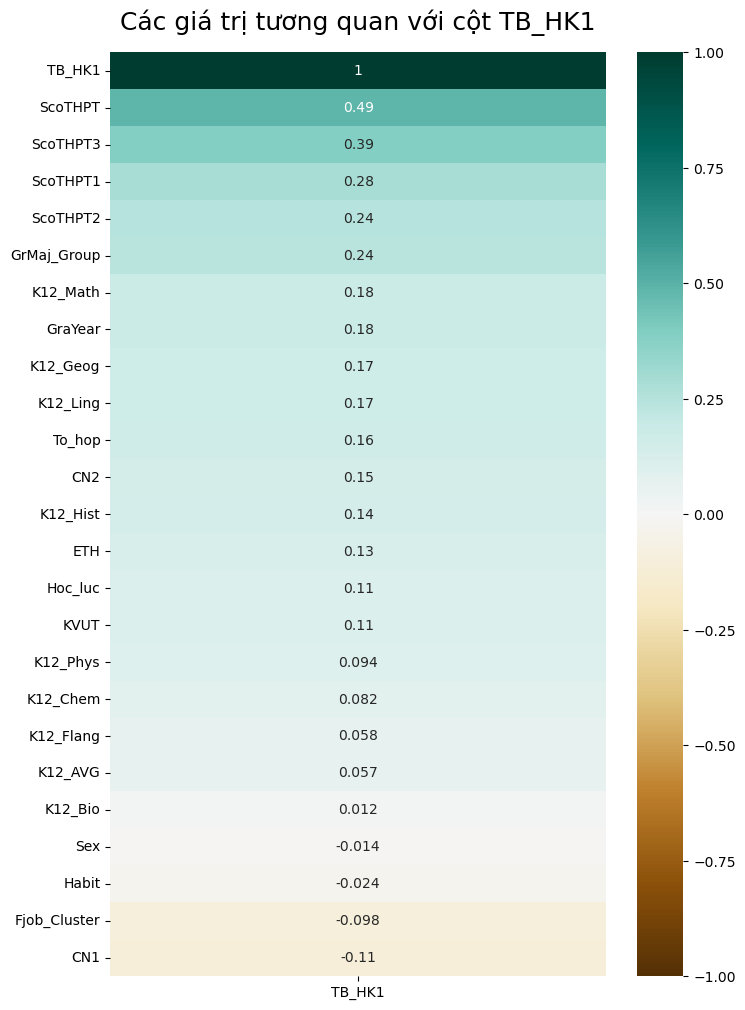

In [194]:
correlation_matrix = df.corr()
# Lấy độ tương quan của tất cả các cột với cột 'TB_HK1'
tb_hk1_correlation = correlation_matrix[['TB_HK1']].sort_values(by='TB_HK1', ascending=False)

# In ra màn hình các giá trị tương quan với cột 'TB_HK1'
print(tb_hk1_correlation)

# Trực quan hóa các giá trị tương quan bằng heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(tb_hk1_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Các giá trị tương quan với cột TB_HK1', fontdict={'fontsize':18}, pad=16)
plt.show()

In [195]:
df_trainmodel = pd.DataFrame()
df_trainmodel = df_clean

In [196]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel.columns
# Thực hiện Label Encoding
df_trainmodel, label_encoders = label_encode_columns(df_trainmodel, columns_to_encode)

In [71]:
# Tách đầu vào và đầu ra
# X = df_trainmodel.drop(columns=['GrMaj','TB_HK1','CN1', 'CN2'])
# y = df_trainmodel['GrMaj']

X = df_trainmodel.drop(columns=['TB_HK1','CN1', 'CN2'])
y = df_trainmodel['TB_HK1']

# XGBRegressor

Trước khi điều chỉnh các tham số của thuật toán XGBRegressor, có thể điều chỉnh trạng thái ngẫu nhiên tối ưu trước khi chia dữ liệu và điều chỉnh nó cho XGBRegressor. Vì lý do này, trước tiên chúng ta sẽ chọn một phương pháp trả về "optimal_state" để tối đa hóa độ chính xác

In [198]:
optimal_state = None
best_score = float('-inf')

for _ in range(100):
    state = np.random.randint(1, 100000000) - 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = r2_score(y_test, y_pred)
    
    if score > best_score:
        best_score = score
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Score: {best_score}')

Optimal random_state: 59825599
Best Score: 0.4488026584537401


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=59825599)

In [200]:
#Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


Cross-Validation chia dữ liệu thành 8 phần. shuffle=True đảm bảo rằng dữ liệu sẽ được xáo trộn trước khi chia

In [201]:
# Danh sách các giá trị của n_estimators để kiểm tra
n_estimators_values = range(1, 80, 1)

# Khởi tạo danh sách để lưu các giá trị chỉ số đánh giá
cv_rmse_values = []

# Sử dụng KFold để phân chia dữ liệu cho cross-validation
kf = KFold(n_splits=8, shuffle=True, random_state=optimal_state)

for n_estimators in n_estimators_values:
    # Tạo mô hình XGBoost với giá trị n_estimators hiện tại
    model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=0.1, max_depth=3)
    
    # Thực hiện cross-validation và tính RMSE
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    
    # Tính toán RMSE từ MSE (scores là âm vì là negative MSE)
    rmse = np.sqrt(-np.mean(scores))
    cv_rmse_values.append(rmse)
    
    print(f'n_estimators: {n_estimators}')
    print(f'CV RMSE: {rmse}')
    print('--------------------------')

# Tìm giá trị n_estimators tốt nhất
best_n_estimators = n_estimators_values[np.argmin(cv_rmse_values)]
best_rmse = min(cv_rmse_values)

# In giá trị n_estimators tốt nhất
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best CV RMSE: {best_rmse}')

# Tạo đồ thị so sánh các chỉ số đánh giá với n_estimators bằng Plotly
fig = go.Figure()

# Thêm dữ liệu vào đồ thị
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=cv_rmse_values, mode='lines+markers',
                         name='CV RMSE', line=dict(color='blue')))

# Đánh dấu vị trí best_n_estimators bằng một đường thẳng màu đỏ
fig.add_vline(x=best_n_estimators, line=dict(color='red', dash='dash'), name=f'Best n_estimators ({best_n_estimators})')

# Thiết lập các thuộc tính cho biểu đồ
fig.update_layout(
    title="Cross-Validated RMSE vs n_estimators for XGBoost Regressor",
    xaxis_title="n_estimators",
    yaxis_title="CV RMSE",
    showlegend=True,
    legend_title='Metrics',
    template='plotly_dark',
)

# Hiển thị đồ thị
fig.show()

n_estimators: 1
CV RMSE: 0.4791081443233658
--------------------------
n_estimators: 2
CV RMSE: 0.46255870284565215
--------------------------
n_estimators: 3
CV RMSE: 0.44874562457041467
--------------------------
n_estimators: 4
CV RMSE: 0.4370859288515137
--------------------------
n_estimators: 5
CV RMSE: 0.42758702083982386
--------------------------
n_estimators: 6
CV RMSE: 0.4192861356309059
--------------------------
n_estimators: 7
CV RMSE: 0.4125332673425402
--------------------------
n_estimators: 8
CV RMSE: 0.40689210249098134
--------------------------
n_estimators: 9
CV RMSE: 0.40200612655387974
--------------------------
n_estimators: 10
CV RMSE: 0.398533685965057
--------------------------
n_estimators: 11
CV RMSE: 0.3952717125562358
--------------------------
n_estimators: 12
CV RMSE: 0.3924223134058944
--------------------------
n_estimators: 13
CV RMSE: 0.3905574922279319
--------------------------
n_estimators: 14
CV RMSE: 0.38888427147337734
-----------------------

<h3>Tìm n_estimators_values tốt nhất cho mô hình dựa vào các chỉ số đánh giá </h3>

Các chỉ số đánh giá:
- Train MSE (Mean Squared Error): Đo lường trung bình bình phương của sự khác biệt giữa giá trị thực tế và giá trị dự đoán trên tập huấn luyện.
- Test MSE: Tương tự như Train MSE, nhưng được tính trên tập kiểm tra.
- Train R2 Score: Đánh giá độ chính xác của mô hình trên tập huấn luyện, phản ánh tỷ lệ phương sai của mục tiêu mà mô hình có thể giải thích được.
- Test R2 Score: Tương tự như Train R2 Score, nhưng được tính trên tập kiểm tra.
- Train MAE (Mean Absolute Error): Đo lường trung bình độ lệch tuyệt đối giữa giá trị thực tế và giá trị dự đoán trên tập huấn luyện.
- Test MAE: Tương tự như Train MAE, nhưng được tính trên tập kiểm tra.
- RMSE (Root Mean Squared Error): Là căn bậc hai của MSE, thường được sử dụng như một chỉ số trực quan hơn để đánh giá hiệu suất của mô hình.
- Adjusted R2 Score: Đây là một biến thể của R2 Score, điều chỉnh dựa trên số lượng mẫu và số lượng đặc trưng. Chỉ số này đặc biệt hữu ích khi so sánh các mô hình với số lượng đặc trưng khác nhau.

In [202]:
# Khởi tạo danh sách để lưu các giá trị chỉ số đánh giá
n_estimators_values = range(1, 100, 1)
train_mse_values = []
test_mse_values = []
train_r2_values = []
test_r2_values = []
train_mae_values = []
test_mae_values = []
rmse_values = []
train_adj_r2_values = []
test_adj_r2_values = []

best_n_estimators = None
best_rmse = float('inf')

n_samples_train = X_train.shape[0]
n_features = X_train.shape[1]

# Hàm tính Adjusted R-squared
def adjusted_r2_score(r2, n_samples, n_features):
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

for n_estimators in n_estimators_values:
    # Tạo và huấn luyện mô hình XGBoost
    model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=0.1, max_depth=3)
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Tính toán các chỉ số đánh giá
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(test_mse)

    # Tính Adjusted R-squared
    train_adj_r2 = adjusted_r2_score(train_r2, n_samples_train, n_features)
    test_adj_r2 = adjusted_r2_score(test_r2, X_test.shape[0], n_features)
    
    # Lưu giá trị các chỉ số vào danh sách
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)
    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)
    train_mae_values.append(train_mae)
    test_mae_values.append(test_mae)
    rmse_values.append(rmse)
    train_adj_r2_values.append(train_adj_r2)
    test_adj_r2_values.append(test_adj_r2)
    
    # Cập nhật giá trị n_estimators tốt nhất
    if rmse < best_rmse:
        best_rmse = rmse
        best_n_estimators = n_estimators

    # In các chỉ số đánh giá cho mỗi giá trị n_estimators
    print(f'n_estimators: {n_estimators}')
    print(f'Train MSE: {train_mse}')
    print(f'Test MSE: {test_mse}')
    print(f'Train R2 Score: {train_r2}')
    print(f'Test R2 Score: {test_r2}')
    print(f'Train MAE: {train_mae}')
    print(f'Test MAE: {test_mae}')
    print(f'RMSE: {rmse}')
    print(f'Train Adjusted R2: {train_adj_r2}')
    print(f'Test Adjusted R2: {test_adj_r2}')
    print('--------------------------')

# In giá trị n_estimators tốt nhất
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best RMSE: {best_rmse}')

# Tạo đồ thị so sánh các chỉ số đánh giá với n_estimators sử dụng Plotly
fig = go.Figure()

# Thêm các đường biểu diễn cho các chỉ số
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_mse_values, mode='lines+markers', name='Train MSE'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_mse_values, mode='lines+markers', name='Test MSE'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=rmse_values, mode='lines+markers', name='RMSE'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_adj_r2_values, mode='lines+markers', name='Train Adjusted R2', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_adj_r2_values, mode='lines+markers', name='Test Adjusted R2', line=dict(dash='dash')))

# Thiết lập các thuộc tính cho biểu đồ
fig.update_layout(
    title='Performance Metrics vs n_estimators for XGBoost Regressor',
    xaxis_title='n_estimators',
    yaxis_title='Value',
    legend_title='Metrics',
    template='plotly_dark',
    shapes=[
        # Đường dọc đánh dấu giá trị n_estimators tốt nhất
        dict(
            type='line',
            x0=best_n_estimators,
            y0=0,
            x1=best_n_estimators,
            y1=max(max(train_mse_values), max(test_mse_values), max(rmse_values), max(train_adj_r2_values), max(test_adj_r2_values)),
            line=dict(color='Red', dash='dash'),
        )
    ]
)

# Hiển thị biểu đồ
fig.show()

n_estimators: 1
Train MSE: 0.22932197415785274
Test MSE: 0.2288437083305222
Train R2 Score: 0.0794963681052302
Test R2 Score: 0.07871797671974912
Train MAE: 0.4774094245161492
Test MAE: 0.47693388078021826
RMSE: 0.47837611596997837
Train Adjusted R2: 0.06301867900703251
Test Adjusted R2: 0.03928567222137258
--------------------------
n_estimators: 2
Train MSE: 0.21341582441357268
Test MSE: 0.21333655768801435
Train R2 Score: 0.14334401577545886
Test R2 Score: 0.1411468685755266
Train MAE: 0.45885389038739494
Test MAE: 0.4588165502419463
RMSE: 0.46188370580484256
Train Adjusted R2: 0.12800924632636212
Test Adjusted R2: 0.10438661781416791
--------------------------
n_estimators: 3
Train MSE: 0.20050463520923162
Test MSE: 0.20054282415509908
Train R2 Score: 0.19516982356523316
Test R2 Score: 0.1926520499960661
Train MAE: 0.4421683399441143
Test MAE: 0.4422682022027241
RMSE: 0.4478200801159982
Train Adjusted R2: 0.18076277402775154
Test Adjusted R2: 0.15809630116321283
-------------------

sử dụng gridsearchCV để tìm giá trị tối ưu cho mô hình với best n_estimators

In [203]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=best_n_estimators)

# Xác định các tham số cần tối ưu hóa
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.15, 0.2 ,0.21,0.22,0.23, 0.3],
    'max_depth': [1,2,3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7,0.8, 0.9, 1.0]
}
# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_distributions, 
                           scoring='neg_root_mean_squared_error', 
                           cv=8,
                           verbose=1,
                           n_jobs=-1) 

# Thực hiện tìm kiếm tham số tối ưu
grid_search.fit(X_train, y_train)

# Lấy các tham số tốt nhất và mô hình tốt nhất
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Hiển thị các tham số tốt nhất
print("Best Parameters:", best_params)

# Dự đoán với mô hình tốt nhất trên tập kiểm tra
y_test_pred_best = best_model.predict(X_test)

# Tính toán các chỉ số đánh giá
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
test_rmse_best = np.sqrt(test_mse_best)
test_r2_best = r2_score(y_test, y_test_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)

print(f'Test MSE with best parameters: {test_mse_best}')
print(f'Test RMSE with best parameters: {test_rmse_best}')
print(f'Test R2 Score with best parameters: {test_r2_best}')
print(f'Test MAE with best parameters: {test_mae_best}')

Fitting 8 folds for each of 480 candidates, totalling 3840 fits


Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1.0}
Test MSE with best parameters: 0.12091371905423096
Test RMSE with best parameters: 0.3477265003623264
Test R2 Score with best parameters: 0.513223952953378
Test MAE with best parameters: 0.25565097825684074


In [204]:
# Huấn luyện mô hình cuối cùng với best_n_estimators
best_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_test_pred = best_model.predict(X_test)

# Tính các chỉ số đánh giá
final_mse = mean_squared_error(y_test, y_test_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_test_pred)
final_mae = mean_absolute_error(y_test, y_test_pred)

print(f'Final MSE: {final_mse}')
print(f'Final RMSE: {final_rmse}')
print(f'Final R2 Score: {final_r2}')
print(f'Final MAE: {final_mae}')


Final MSE: 0.12091371905423096
Final RMSE: 0.3477265003623264
Final R2 Score: 0.513223952953378
Final MAE: 0.25565097825684074


In [205]:
# Lưu mô hình thành file
model_filename = 'model/XGBR_model.pkl'
joblib.dump(best_model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

Mô hình đã được lưu vào file model/XGBR_model.pkl


Actual vs Predicted Values: Biểu đồ này cho thấy mối quan hệ giữa các giá trị thực tế và giá trị dự đoán. Một mô hình tốt sẽ có các điểm nằm gần đường chéo (line of equality), cho thấy dự đoán gần đúng với thực tế.

In [206]:

fig = px.scatter(x=y_test, y=y_test_pred, labels={'x': 'Actual Values', 'y': 'Predicted Values'},
                 title='Actual vs Predicted Values')
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=min(y_test), y0=min(y_test), x1=max(y_test), y1=max(y_test)
)
fig.show()

Nhận xét: mô hình sau khi đào tọa hoàn tất dự đoán tương đối cho các nhóm sinh viên khá với trung bình

Error Distribution: Biểu đồ phân phối lỗi cho biết sự khác biệt giữa giá trị thực tế và giá trị dự đoán. Lỗi thường phân bố quanh giá trị 0, và phân phối này càng tập trung xung quanh 0 thì mô hình càng chính xác.

In [207]:
errors = y_test - y_test_pred

fig = px.histogram(errors, nbins=50, title='Error Distribution', labels={'value': 'Error'})
fig.show()


In [208]:
# Lấy tầm quan trọng của từng đặc trưng
feature_importances = best_model.feature_importances_

# Tạo DataFrame để hiển thị rõ ràng hơn
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sắp xếp các đặc trưng theo tầm quan trọng
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Hiển thị các đặc trưng quan trọng nhất
print(importance_df)

         Feature  Importance
10       ScoTHPT    0.418841
20   GrMaj_Group    0.139659
9       ScoTHPT3    0.054080
21  Fjob_Cluster    0.047440
5            ETH    0.031197
1         To_hop    0.029974
3        GraYear    0.027842
2           KVUT    0.026208
14      K12_Phys    0.025050
12      K12_Ling    0.024842
7       ScoTHPT1    0.022153
8       ScoTHPT2    0.019667
17      K12_Hist    0.017655
6          Habit    0.017049
15      K12_Chem    0.016299
18      K12_Geog    0.015995
11      K12_Math    0.015922
19       K12_AVG    0.014324
16       K12_Bio    0.013847
0            Sex    0.011582
13     K12_Flang    0.010375
4        Hoc_luc    0.000000


Các Đặc Trưng Quan Trọng Nhất:

- ScoTHPT (0.341405): Đây là đặc trưng quan trọng nhất, chiếm tỷ lệ lớn nhất trong độ quan trọng của mô hình. Điều này cho thấy điểm số tổng quát từ hệ thống giáo dục (ScoTHPT) có ảnh hưởng lớn đến kết quả dự đoán của mô hình.
ScoTHPT2 (0.167471) và ScoTHPT3 (0.090987): Cả hai đặc trưng này liên quan đến các điểm số từ hệ thống giáo dục và cũng có ảnh hưởng đáng kể.

Các Đặc Trưng Cần Lưu Ý:

-GrMaj (0.047770): Mặc dù không phải là đặc trưng quan trọng nhất, nhưng vẫn đóng vai trò nhất định. Có thể nó liên quan đến ngành học của sinh viên.
K12_Flang (0.037786), K12_Math (0.033326): Các đặc trưng này liên quan đến môn học cụ thể và có tầm quan trọng tương đối trong dự đoán kết quả.

Các Đặc Trưng Ít Quan Trọng:

-K12_Bio (0.000000), ETH (0.000000), Hoc_luc (0.000000): Những đặc trưng này không có ảnh hưởng đáng kể trong mô hình. Điều này có thể chỉ ra rằng chúng không đóng góp nhiều vào dự đoán hoặc có thể chúng có mối quan hệ yếu với biến mục tiêu.
Các Đặc Trưng Có Mối Quan Hệ Thấp:

Các đặc trưng như Fjob_Cluster (0.016008), K12_Hist (0.015301), và Sex (0.015126) có độ quan trọng thấp, nhưng vẫn có sự đóng góp nhỏ vào mô hình.

In [209]:
# Trực quan hóa tầm quan trọng của các đặc trưng
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance', labels={'Importance': 'Tầm quan trọng', 'Feature': 'Đặc trưng'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})  # Sắp xếp các đặc trưng theo tầm quan trọng
fig.show()

In [210]:
# Extract feature importances
feature_importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame to hold feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Độ quan trọng của các đặc trưng từ mô hình XGBRegressor',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()

# XGBClassifier

In [211]:
df_clean = pd.read_csv('data/DataFinal/model/raw/data_clean_v1.csv')
df_clean = df_clean.drop(columns=['Unnamed: 0'])
# Đọc dữ liệu
df_trainmodel_XGBC = df_clean


In [212]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel_XGBC.columns
# Thực hiện Label Encoding
df_trainmodel_XGBC, label_encoders = label_encode_columns(df_trainmodel_XGBC, columns_to_encode)

In [213]:
show_infor_dataframe(df_trainmodel_XGBC)

Column 'Sex' has 2 unique values:
[0 1]


Column 'To_hop' has 11 unique values:
[ 1  5  0  3  4  6  7  8  9  2 10]


Column 'KVUT' has 2 unique values:
[0 1]


Column 'GraYear' has 8 unique values:
[6 1 5 3 4 2 7 0]


Column 'Hoc_luc' has 3 unique values:
[1 0 2]


Column 'ETH' has 2 unique values:
[1 0]


Column 'Habit' has 2 unique values:
[0 1]


Column 'TB_HK1' has 2 unique values:
[1 0]


Column 'CN1' has 5 unique values:
[1 0 2 3 4]


Column 'CN2' has 5 unique values:
[2 1 3 0 4]


Column 'ScoTHPT1' has 5 unique values:
[0 1 2 3 4]


Column 'ScoTHPT2' has 5 unique values:
[1 0 2 3 4]


Column 'ScoTHPT3' has 5 unique values:
[0 1 3 2 4]


Column 'ScoTHPT' has 4 unique values:
[1 0 2 3]


Column 'K12_Math' has 4 unique values:
[1 0 3 2]


Column 'K12_Ling' has 4 unique values:
[1 0 2 3]


Column 'K12_Flang' has 5 unique values:
[1 0 2 3 4]


Column 'K12_Phys' has 5 unique values:
[0 1 2 3 4]


Column 'K12_Chem' has 4 unique values:
[2 0 1 3]


Column 'K12_Bio' has 4 unique values:


In [214]:
# Tách biến đầu vào và đầu ra
X = df_trainmodel_XGBC.drop(['TB_HK1','CN1','CN2'], axis=1)
y = df_trainmodel_XGBC['TB_HK1']

In [215]:

optimal_state = None
best_accuracy = float('-inf')
best_f1_score = float('-inf')

for _ in range(100):
    state = np.random.randint(1, 100000000) - 1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    model = XGBClassifier(objective='binary:logistic') 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  

    if accuracy > best_accuracy or f1 > best_f1_score:
        best_accuracy = accuracy
        best_f1_score = f1
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best F1 Score: {best_f1_score}')


Optimal random_state: 52101242
Best Accuracy: 0.8463687150837989
Best F1 Score: 0.8463099558989969


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13769030)

In [217]:
from sklearn.metrics import f1_score

In [218]:

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# Khởi tạo danh sách để lưu các giá trị chỉ số đánh giá
n_estimators_values = range(1, 100, 2)
train_accuracy_values = []
test_accuracy_values = []
train_precision_values = []
test_precision_values = []
train_recall_values = []
test_recall_values = []
train_f1_values = []
test_f1_values = []
best_n_estimators = None
best_f1 = 0

for n_estimators in n_estimators_values:
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=5)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)
    train_precision_values.append(train_precision)
    test_precision_values.append(test_precision)
    train_recall_values.append(train_recall)
    test_recall_values.append(test_recall)
    train_f1_values.append(train_f1)
    test_f1_values.append(test_f1)
    
    print(f'train_accuracy_values: {train_accuracy}')
    print(f'test_accuracy_values: {test_accuracy}')
    print(f'train_precision_values: {train_precision}')
    print(f'test_precision_values: {test_precision}')
    print(f'train_recall_values: {train_precision}')
    print(f'test_recall_values: {test_precision}')
    print(f'train_f1_values: {train_precision}')
    print(f'test_f1_values: {test_precision}')
    print('--------------------------')
    
    if test_f1 > best_f1:
        best_f1 = test_f1
        best_n_estimators = n_estimators

XGBC_Model = XGBClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=5)
XGBC_Model.fit(X_train, y_train)

print(f'Best n_estimators: {best_n_estimators}')
print(f'Best F1 Score: {best_f1}')

# Vẽ biểu đồ bằng Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_accuracy_values, mode='lines+markers', name='Train Accuracy'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_accuracy_values, mode='lines+markers', name='Test Accuracy'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_f1_values, mode='lines+markers', name='Train F1 Score'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_f1_values, mode='lines+markers', name='Test F1 Score'))

# Đánh dấu vị trí best_n_estimators bằng một đường thẳng màu đỏ
fig.add_vline(x=best_n_estimators, line=dict(color='red', dash='dash'), name=f'Best n_estimators ({best_n_estimators})')


fig.update_layout(
    title='Performance Metrics vs n_estimators for XGBoost Classifier',
    xaxis_title='n_estimators',
    yaxis_title='Value',
    legend_title='Metrics'
)

fig.show()

train_accuracy_values: 0.6624737945492662
test_accuracy_values: 0.6201117318435754
train_precision_values: 0.7807859463850528
test_precision_values: 0.7370054818043723
train_recall_values: 0.7807859463850528
test_recall_values: 0.7370054818043723
train_f1_values: 0.7807859463850528
test_f1_values: 0.7370054818043723
--------------------------
train_accuracy_values: 0.8350803633822502
test_accuracy_values: 0.8519553072625698
train_precision_values: 0.8351447338725961
test_precision_values: 0.8520567641910477
train_recall_values: 0.8351447338725961
test_recall_values: 0.8520567641910477
train_f1_values: 0.8351447338725961
test_f1_values: 0.8520567641910477
--------------------------
train_accuracy_values: 0.8371767994409504
test_accuracy_values: 0.8463687150837989
train_precision_values: 0.8365103910174332
test_precision_values: 0.8462787212787213
train_recall_values: 0.8365103910174332
test_recall_values: 0.8462787212787213
train_f1_values: 0.8365103910174332
test_f1_values: 0.846278721

In [219]:

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
param_grid = {
    'learning_rate': [0.01,0.02, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.4,0.5,0.6,0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9, 1]
}

model = XGBClassifier(n_estimators=best_n_estimators, objective='binary:logistic') 


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=8,
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_}')

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test F1 Score: {test_f1}')

Fitting 8 folds for each of 384 candidates, totalling 3072 fits
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 6, 'subsample': 0.4}
Best F1 Score: 0.8264782763480116
Test Accuracy: 0.8519553072625698
Test F1 Score: 0.8518338064478268


In [220]:

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1_score}")
print("Classification Report:\n", report)

Accuracy: 0.8519553072625698
f1_score: 0.8516949483738344
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       183
           1       0.86      0.83      0.85       175

    accuracy                           0.85       358
   macro avg       0.85      0.85      0.85       358
weighted avg       0.85      0.85      0.85       358



In [221]:
# Lưu mô hình thành file
model_filename = 'model/XGBC_model.pkl'
joblib.dump(best_model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

Mô hình đã được lưu vào file model/XGBC_model.pkl


- Accuracy: 0.69 cho thấy mô hình có khả năng phân loại đúng khoảng 69% các mẫu trong tập dữ liệu kiểm tra. Đây là mức độ chính xác khá tốt nhưng có thể cải thiện hơn, đặc biệt là trong các lớp không được phân loại tốt.
- F1-Score: 0.34 là khá thấp, cho thấy mô hình gặp khó khăn trong việc cân bằng giữa precision (độ chính xác) và recall (khả năng phát hiện). Mức điểm F1 thấp có thể chỉ ra rằng mô hình không hiệu quả trong việc phân loại các lớp cụ thể, dẫn đến kết quả không đáng tin cậy.


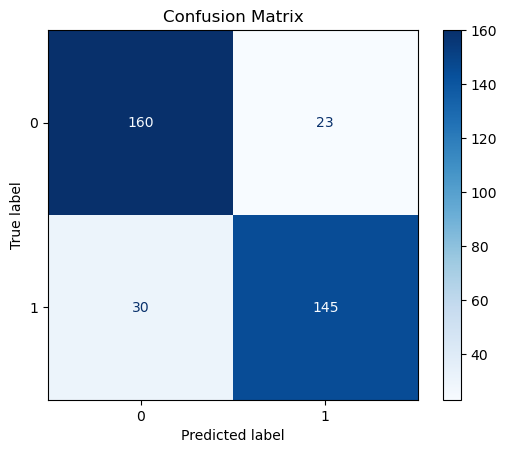

In [222]:
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [223]:
# Extract feature importances
feature_importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame to hold feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Độ quan trọng của các đặc trưng từ mô hình XGBClassifier Classifier',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()

Đặc Trưng Quan Trọng Nhất:

- ScoTHPT (0.145515): Đây là đặc trưng có độ quan trọng cao nhất. Điều này cho thấy rằng điểm số trong kỳ thi THPT là yếu tố chính ảnh hưởng đến kết quả dự đoán của mô hình.

Đặc Trưng Quan Trọng Thứ Hai:

- GrMaj (0.072038): Đây là đặc trưng quan trọng thứ hai. Nó đại diện cho chuyên ngành cho thấy rằng các yếu tố học thuật có ảnh hưởng đáng kể đến kết quả mục tiêu.

Các Đặc Trưng Quan Trọng Khác:

Các đặc trưng như ScoTHPT3 (0.068518), ScoTHPT2 (0.049571), và To_hop (0.048195) cũng có độ quan trọng đáng kể. Điều này chỉ ra rằng điểm số trong các môn thi là những yếu tố quan trọng.

- Đặc Trưng Ít Quan Trọng Hơn:

Các đặc trưng như K12_Chem (0.029493) và K12_Ling (0.030427) có độ quan trọng thấp hơn. Tuy nhiên, chúng vẫn có một độ quan trọng nhất định, cho thấy rằng chúng vẫn góp phần vào việc dự đoán kết quả.

In [224]:
print("Độ quan trọng của các đặc trưng:")
print(importance_df.to_string(index=False))

Độ quan trọng của các đặc trưng:
     Feature  Importance
     ScoTHPT    0.269092
 GrMaj_Group    0.143938
     GraYear    0.057014
Fjob_Cluster    0.042318
         Sex    0.041670
    K12_Math    0.037719
    ScoTHPT2    0.034447
         ETH    0.031761
    ScoTHPT3    0.031189
      To_hop    0.030913
     Hoc_luc    0.029339
     K12_AVG    0.027918
    K12_Ling    0.026136
    ScoTHPT1    0.025371
    K12_Chem    0.023071
    K12_Hist    0.022754
     K12_Bio    0.022729
        KVUT    0.022654
    K12_Geog    0.020980
    K12_Phys    0.020711
       Habit    0.019919
   K12_Flang    0.018356



# RandomForestClassifier

In [225]:
df_clean = pd.read_csv('data/DataFinal/model/raw/data_clean_v1.csv')
df_clean = df_clean.drop(columns=['Unnamed: 0'])
# Đọc dữ liệu
df_trainmodel_RFC = df_clean

In [226]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel_RFC.columns
# Thực hiện Label Encoding
df_trainmodel_XGBC, label_encoders = label_encode_columns(df_trainmodel_RFC, columns_to_encode)

In [227]:

X = df_trainmodel.drop(columns=['TB_HK1','CN1', 'CN2'])
y = df_trainmodel['TB_HK1']

In [228]:
# Khởi tạo các biến để lưu trữ giá trị random_state và kết quả tốt nhất
optimal_state = None
best_score = float('-inf')

for state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    model = RandomForestClassifier(random_state=state)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    
    if score > best_score:
        best_score = score
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Score: {best_score}')

Optimal random_state: 9
Best Score: 0.8715083798882681


In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=optimal_state)

In [230]:
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
n_estimators_values = range(1, 150)
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

best_n_estimators = None  
best_f1_score = 0.0 

for n_estimators in n_estimators_values:
    RFC_Model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    RFC_Model.fit(X_train, y_train)
    
    y_pred_Rf = RFC_Model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_Rf)
    precision = precision_score(y_test, y_pred_Rf, average='macro')
    recall = recall_score(y_test, y_pred_Rf, average='macro')
    f1 = f1_score(y_test, y_pred_Rf, average='macro')
    
    print(f"n_estimators:{n_estimators} with accuracy:{accuracy}")

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    if accuracy > best_f1_score:
        best_f1_score = accuracy
        best_n_estimators = n_estimators


RFC_Model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
RFC_Model.fit(X_train, y_train)

print(f"Best n_estimators: {best_n_estimators}")
print(f"Best F1 score: {best_f1_score}")

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(n_estimators_values), y=accuracy_values, mode='lines+markers', name='Accuracy'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=precision_values, mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=recall_values, mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=f1_values, mode='lines+markers', name='F1-Score'))

# Highlight the best n_estimators with a vertical line
fig.add_vline(x=best_n_estimators, line=dict(color='red', dash='dash'), annotation_text=f'Best n_estimators ({best_n_estimators})', annotation_position="top right")

fig.update_layout(
    title='Performance Metrics vs n_estimators for RandomForest Classifier',
    xaxis_title='n_estimators',
    yaxis_title='Value',
    legend_title='Metrics',
    hovermode='x unified'
)

fig.show()

n_estimators:1 with accuracy:0.7513966480446927
n_estimators:2 with accuracy:0.7625698324022346
n_estimators:3 with accuracy:0.7932960893854749
n_estimators:4 with accuracy:0.8016759776536313
n_estimators:5 with accuracy:0.8016759776536313
n_estimators:6 with accuracy:0.8044692737430168
n_estimators:7 with accuracy:0.8212290502793296
n_estimators:8 with accuracy:0.8128491620111732
n_estimators:9 with accuracy:0.8184357541899442
n_estimators:10 with accuracy:0.8156424581005587
n_estimators:11 with accuracy:0.8072625698324022
n_estimators:12 with accuracy:0.8212290502793296
n_estimators:13 with accuracy:0.8268156424581006
n_estimators:14 with accuracy:0.8435754189944135
n_estimators:15 with accuracy:0.8379888268156425
n_estimators:16 with accuracy:0.8296089385474861
n_estimators:17 with accuracy:0.8296089385474861
n_estimators:18 with accuracy:0.8324022346368715
n_estimators:19 with accuracy:0.840782122905028
n_estimators:20 with accuracy:0.8379888268156425
n_estimators:21 with accuracy:

In [231]:
y_pred = RFC_Model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1_score}")
print("Classification Report:\n", report)

Accuracy: 0.8603351955307262
f1_score: 0.8592103193330187
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       199
           1       0.83      0.87      0.85       159

    accuracy                           0.86       358
   macro avg       0.86      0.86      0.86       358
weighted avg       0.86      0.86      0.86       358



In [232]:
# Lưu mô hình thành file
model_filename = 'model/RFC_Model.pkl'
joblib.dump(RFC_Model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

Mô hình đã được lưu vào file model/RFC_Model.pkl


In [233]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_Rf)
cm_labels = np.unique(y_test)  # Lấy các nhãn lớp từ y_test

# Đảm bảo rằng x và y là các danh sách thay vì mảng numpy
cm_labels = list(cm_labels)

# Vẽ ma trận nhầm lẫn sử dụng Plotly
fig = ff.create_annotated_heatmap(
    z=cm, 
    x=cm_labels, 
    y=cm_labels, 
    annotation_text=cm.astype(str), 
    colorscale='Viridis'
)

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

In [ ]:
# Extract feature importances
feature_importances = RFC_Model.feature_importances_
features = X_train.columns

# Create a DataFrame to hold feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Importance of features from RandomForest Classifier model',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()

Đặc Trưng Quan Trọng Nhất:

- GrMaj (0.152130): Đây là đặc trưng có độ quan trọng cao nhất trong mô hình. Nó đóng vai trò chính trong việc dự đoán biến mục tiêu. Nếu GrMaj đại diện cho yếu tố chuyên ngành học, điều này cho thấy rằng yếu tố này có ảnh hưởng mạnh mẽ đến kết quả dự đoán của mô hình.

Đặc Trưng Quan Trọng Thứ Hai:
- ScoTHPT (0.084769): Đây là đặc trưng quan trọng thứ hai. ScoTHPT liên quan đến tổng điểm thi THPT, điều này cho thấy rằng kết quả học tập cũng là một yếu tố quan trọng trong mô hình.

Đặc Trưng Quan Trọng còn lại:
- Các đặc trưng như Fjob_Cluster (0.068745), Mjob_Cluster (0.061248), và KVUT (0.055904) cũng đóng góp đáng kể vào mô hình. Những đặc trưng này có thể liên quan đến nghề nghiệp của phụ huynh, khu vực sống, hoặc các yếu tố xã hội khác, cho thấy sự ảnh hưởng của môi trường xung quanh đối với kết quả học tập hoặc thành tích.

- Các đặc trưng như ETH (0.019029), K12_AVG (0.021153), và Hoc_luc (0.022463) có độ quan trọng thấp hơn. Tuy nhiên, việc những đặc trưng này vẫn có một độ quan trọng nhất định cho thấy rằng chúng vẫn góp phần vào việc dự đoán, mặc dù mức độ ảnh hưởng không lớn.

In [235]:
print("Độ quan trọng của các đặc trưng:")
print(importance_df.to_string(index=False))

Độ quan trọng của các đặc trưng:
     Feature  Importance
 GrMaj_Group    0.152858
     ScoTHPT    0.141932
Fjob_Cluster    0.078578
    ScoTHPT3    0.061086
      To_hop    0.048979
    ScoTHPT1    0.047925
     GraYear    0.047851
    ScoTHPT2    0.038017
   K12_Flang    0.038000
    K12_Math    0.034832
    K12_Chem    0.032940
    K12_Phys    0.031332
     K12_Bio    0.031300
    K12_Hist    0.031071
    K12_Ling    0.029258
       Habit    0.029134
    K12_Geog    0.028200
        KVUT    0.026774
         ETH    0.019013
     K12_AVG    0.018247
     Hoc_luc    0.017609
         Sex    0.015062


# Support vector machine

In [236]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [237]:

# Khởi tạo các biến để lưu trữ giá trị random_state và kết quả tốt nhất
optimal_state = None
best_score = float('-inf')

for state in range(1, 101):
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    # Khởi tạo và huấn luyện mô hình SVM
    model = SVC(random_state=state)
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Tính toán độ chính xác
    score = accuracy_score(y_test, y_pred)
    
    # Kiểm tra nếu score tốt hơn, cập nhật optimal_state
    if score > best_score:
        best_score = score
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Score: {best_score}')

Optimal random_state: 81
Best Score: 0.8575418994413407


In [238]:
# Chia dữ liệu với random_state tối ưu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=optimal_state)

In [239]:
# Initialize lists to store metric values for different C values
C_values = [0.01, 0.1, 1,2,5,7, 10,50, 100]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

best_C = None  # Variable to store the best C
best_f1_score = 0.0  # Variable to store the best F1 score

# Loop through different C values
for C in C_values:
    # Create and fit an SVC model with the current C
    SVM_Model = SVC(C=C, random_state=42)
    SVM_Model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_svm = SVM_Model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_svm)
    precision = precision_score(y_test, y_pred_svm, average='macro')
    recall = recall_score(y_test, y_pred_svm, average='macro')
    f1 = f1_score(y_test, y_pred_svm, average='macro')
    
    print(f"C: {C} with accuracy: {accuracy}")

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    # Check if the current C gives better F1 score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_C = C

# Train the SVM model with the best C value
SVM_Model = SVC(C=best_C, random_state=42)
SVM_Model.fit(X_train, y_train)

# Print the best C and its corresponding F1 score
print(f"Best C: {best_C}")
print(f"Best F1 score: {best_f1_score}")

# Create a single plot with multiple lines for each metric using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(C_values), y=accuracy_values, mode='lines+markers', name='Accuracy'))
fig.add_trace(go.Scatter(x=list(C_values), y=precision_values, mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=list(C_values), y=recall_values, mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=list(C_values), y=f1_values, mode='lines+markers', name='F1-Score'))

# Highlight the best C with a vertical line
fig.add_vline(x=best_C, line=dict(color='red', dash='dash'), annotation_text=f'Best C ({best_C})', annotation_position="top right")

fig.update_layout(
    title='Performance Metrics vs C values for SVM Classifier',
    xaxis_title='C values',
    yaxis_title='Value',
    legend_title='Metrics',
    hovermode='x unified'
)

fig.show()

C: 0.01 with accuracy: 0.5642458100558659
C: 0.1 with accuracy: 0.8072625698324022
C: 1 with accuracy: 0.8575418994413407
C: 2 with accuracy: 0.8519553072625698
C: 5 with accuracy: 0.8575418994413407
C: 7 with accuracy: 0.8547486033519553
C: 10 with accuracy: 0.8575418994413407
C: 50 with accuracy: 0.8463687150837989
C: 100 with accuracy: 0.840782122905028
Best C: 10
Best F1 score: 0.8561671353957412


In [240]:
y_pred = SVM_Model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1_score}")
print("Classification Report:\n", report)

Accuracy: 0.8575418994413407
f1_score: 0.8561671353957412
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       200
           1       0.82      0.86      0.84       158

    accuracy                           0.86       358
   macro avg       0.86      0.86      0.86       358
weighted avg       0.86      0.86      0.86       358



In [241]:
# Lưu mô hình thành file
model_filename = 'model/SVM_Model.pkl'
joblib.dump(SVM_Model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

Mô hình đã được lưu vào file model/SVM_Model.pkl


In [242]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_Rf)
cm_labels = np.unique(y_test)  # Lấy các nhãn lớp từ y_test

# Đảm bảo rằng x và y là các danh sách thay vì mảng numpy
cm_labels = list(cm_labels)

# Vẽ ma trận nhầm lẫn sử dụng Plotly
fig = ff.create_annotated_heatmap(
    z=cm, 
    x=cm_labels, 
    y=cm_labels, 
    annotation_text=cm.astype(str), 
    colorscale='Viridis'
)

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

         Feature  Importance
20   GrMaj_Group    0.122067
10       ScoTHPT    0.082402
21  Fjob_Cluster    0.017877
3        GraYear    0.012011
1         To_hop    0.010615
14      K12_Phys    0.005587
4        Hoc_luc    0.004190
8       ScoTHPT2    0.004190
15      K12_Chem    0.003911
12      K12_Ling    0.002514
16       K12_Bio    0.001955
18      K12_Geog    0.001117
5            ETH    0.000838
17      K12_Hist    0.000838
7       ScoTHPT1    0.000279
9       ScoTHPT3   -0.000279
19       K12_AVG   -0.000279
2           KVUT   -0.002514
0            Sex   -0.002793
11      K12_Math   -0.002793
13     K12_Flang   -0.004190
6          Habit   -0.007542


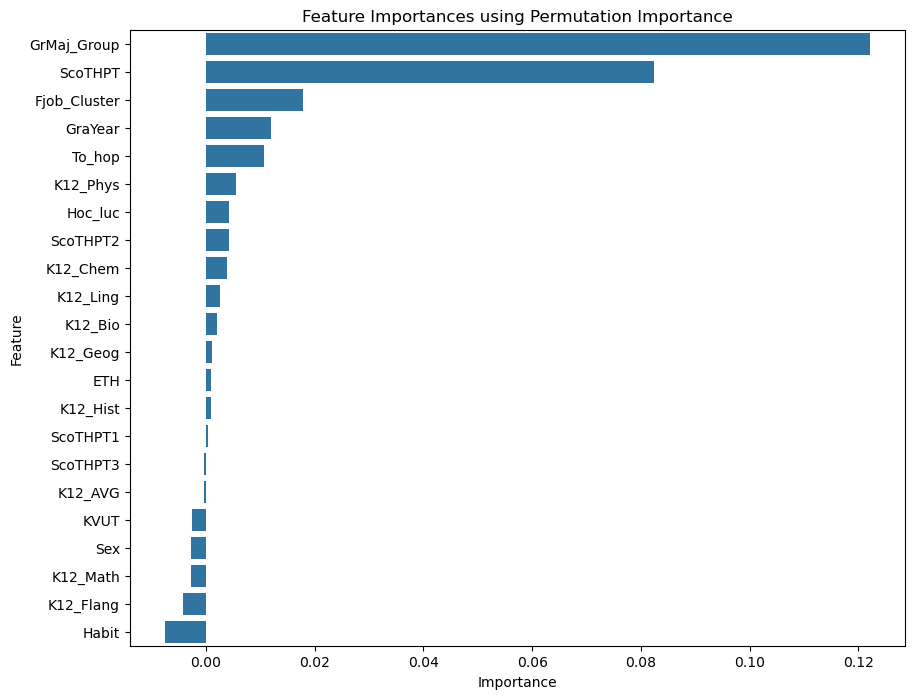

In [243]:
from sklearn.inspection import permutation_importance

# Tính toán permutation importance
result = permutation_importance(SVM_Model, X_test, y_test, n_repeats=10, random_state=42)

# Lấy ra giá trị tầm quan trọng và tên đặc trưng
feature_importances = result.importances_mean
features = X.columns

# Tạo một DataFrame để lưu trữ tầm quan trọng của đặc trưng
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sắp xếp các đặc trưng theo tầm quan trọng giảm dần
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

# Vẽ biểu đồ tầm quan trọng của đặc trưng
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances using Permutation Importance')
plt.show()


# KNN

In [244]:
from sklearn.metrics import f1_score

In [245]:
# Khởi tạo các biến để lưu trữ giá trị random_state và kết quả tốt nhất
optimal_state = None
best_score = float('-inf')

for state in range(1, 101):
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    # Khởi tạo và huấn luyện mô hình KNeighborsClassifier
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Tính toán độ chính xác
    score = accuracy_score(y_test, y_pred)
    
    # Kiểm tra nếu score tốt hơn, cập nhật optimal_state
    if score > best_score:
        best_score = score
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Score: {best_score}')

Optimal random_state: 81
Best Score: 0.8547486033519553


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=optimal_state)

In [247]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

n_neighbors_values = range(1, 50)
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

best_n_neighbors = None  
best_f1_score = 0.0  

for n_neighbors in n_neighbors_values:
    KNN_Model = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN_Model.fit(X_train, y_train)
    
    y_pred_knn = KNN_Model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_knn)
    precision = precision_score(y_test, y_pred_knn, average='macro')
    recall = recall_score(y_test, y_pred_knn, average='macro')
    f1 = f1_score(y_test, y_pred_knn, average='macro')
    
    print(f"n_neighbors:{n_neighbors} with accuracy:{accuracy}")

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    if accuracy > best_f1_score:
        best_f1_score = accuracy
        best_n_neighbors = n_neighbors

KNN_Model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
KNN_Model.fit(X_train, y_train)

# Print the best n_neighbors and its corresponding accuracy
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best F1 score: {best_f1_score}")

# Create a single plot with multiple lines for each metric using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(n_neighbors_values), y=accuracy_values, mode='lines+markers', name='Accuracy'))
fig.add_trace(go.Scatter(x=list(n_neighbors_values), y=precision_values, mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=list(n_neighbors_values), y=recall_values, mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=list(n_neighbors_values), y=f1_values, mode='lines+markers', name='F1-Score'))

# Highlight the best n_neighbors with a vertical line
fig.add_vline(x=best_n_neighbors, line=dict(color='red', dash='dash'), annotation_text=f'Best n_neighbors ({best_n_neighbors})', annotation_position="top right")

fig.update_layout(
    title='Performance Metrics vs n_neighbors for K-Nearest Neighbors Classifier',
    xaxis_title='n_neighbors',
    yaxis_title='Value',
    legend_title='Metrics',
    hovermode='x unified'
)

fig.show()

n_neighbors:1 with accuracy:0.7625698324022346
n_neighbors:2 with accuracy:0.7932960893854749
n_neighbors:3 with accuracy:0.840782122905028
n_neighbors:4 with accuracy:0.8240223463687151
n_neighbors:5 with accuracy:0.8547486033519553
n_neighbors:6 with accuracy:0.8491620111731844
n_neighbors:7 with accuracy:0.8519553072625698
n_neighbors:8 with accuracy:0.8575418994413407
n_neighbors:9 with accuracy:0.8575418994413407
n_neighbors:10 with accuracy:0.8491620111731844
n_neighbors:11 with accuracy:0.8575418994413407
n_neighbors:12 with accuracy:0.8519553072625698
n_neighbors:13 with accuracy:0.8547486033519553
n_neighbors:14 with accuracy:0.8491620111731844
n_neighbors:15 with accuracy:0.8463687150837989
n_neighbors:16 with accuracy:0.8519553072625698
n_neighbors:17 with accuracy:0.8491620111731844
n_neighbors:18 with accuracy:0.8491620111731844
n_neighbors:19 with accuracy:0.8491620111731844
n_neighbors:20 with accuracy:0.8575418994413407
n_neighbors:21 with accuracy:0.8547486033519553
n_

In [248]:
y_pred = KNN_Model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1_score}")
print("Classification Report:\n", report)

Accuracy: 0.8575418994413407
f1_score: 0.8554565966037289
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       200
           1       0.84      0.84      0.84       158

    accuracy                           0.86       358
   macro avg       0.86      0.86      0.86       358
weighted avg       0.86      0.86      0.86       358



In [249]:
# Lưu mô hình thành file
model_filename = 'model/KNN_Model.pkl'
joblib.dump(KNN_Model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

Mô hình đã được lưu vào file model/KNN_Model.pkl


In [250]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_Rf)
cm_labels = np.unique(y_test)  # Lấy các nhãn lớp từ y_test

# Đảm bảo rằng x và y là các danh sách thay vì mảng numpy
cm_labels = list(cm_labels)

# Vẽ ma trận nhầm lẫn sử dụng Plotly
fig = ff.create_annotated_heatmap(
    z=cm, 
    x=cm_labels, 
    y=cm_labels, 
    annotation_text=cm.astype(str), 
    colorscale='Viridis'
)

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

In [251]:
from sklearn.inspection import permutation_importance

# Tính toán độ quan trọng của các đặc trưng sử dụng permutation importance
perm_importance = permutation_importance(KNN_Model, X_test, y_test, n_repeats=30, random_state=42)

# Tạo DataFrame chứa độ quan trọng của các đặc trưng
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sắp xếp theo độ quan trọng
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Vẽ biểu đồ
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Độ quan trọng của các đặc trưng từ mô hình KNN (Permutation Importance)',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()


         Feature  Importance
20   GrMaj_Group    0.098696
10       ScoTHPT    0.033706
21  Fjob_Cluster    0.030633
1         To_hop    0.025047
3        GraYear    0.014898
7       ScoTHPT1    0.010242
9       ScoTHPT3    0.007914
6          Habit    0.007169
8       ScoTHPT2    0.007076
4        Hoc_luc    0.006983
2           KVUT    0.005214
13     K12_Flang    0.005214
12      K12_Ling    0.004749
19       K12_AVG    0.003631
17      K12_Hist    0.003166
5            ETH    0.001955
15      K12_Chem   -0.000372
11      K12_Math   -0.000372
0            Sex   -0.001955
14      K12_Phys   -0.001955
18      K12_Geog   -0.002980
16       K12_Bio   -0.006797


# Feedforward Neural Networks (FNNs)

In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [254]:
df_final = pd.read_csv('data/DataFinal/model/raw/data_clean_v1.csv')
df_final = df_final.drop(columns=['Unnamed: 0'])

In [255]:
# Tách dữ liệu thành X và y
X = df_final.drop(['TB_HK1','CN1','CN2'], axis=1)
y = df_final['TB_HK1']

In [256]:
# Hàm xây dựng mô hình FNN
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))  # Input layer
    model.add(Dense(32, activation='relu'))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Lặp qua các random_state khác nhau
best_random_state = None
best_accuracy = 0
random_states = np.arange(0, 100, 5)  # Các giá trị random_state từ 0 đến 100 với bước nhảy 5

for random_state in random_states:
    # Chia tập dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Tạo mô hình FNN
    model = create_model()
    
    # Huấn luyện mô hình
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Dự đoán trên tập kiểm tra
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Tính accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random State: {random_state}, Accuracy: {accuracy}")
    
    # Lưu random_state có accuracy tốt nhất
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print(f"Best Random State: {best_random_state}, Best Accuracy: {best_accuracy}")

d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 0, Accuracy: 0.8072625698324022


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 5, Accuracy: 0.7681564245810056


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 10, Accuracy: 0.8016759776536313


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 15, Accuracy: 0.7960893854748603


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 20, Accuracy: 0.8100558659217877


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 25, Accuracy: 0.8463687150837989


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 30, Accuracy: 0.7960893854748603


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 35, Accuracy: 0.7988826815642458


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 40, Accuracy: 0.7681564245810056


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 45, Accuracy: 0.7597765363128491


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 50, Accuracy: 0.776536312849162


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 55, Accuracy: 0.7430167597765364


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 60, Accuracy: 0.8156424581005587


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 65, Accuracy: 0.7932960893854749


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 70, Accuracy: 0.776536312849162


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 75, Accuracy: 0.7625698324022346


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 80, Accuracy: 0.7932960893854749


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 85, Accuracy: 0.8100558659217877


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 90, Accuracy: 0.7513966480446927


d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random State: 95, Accuracy: 0.7625698324022346
Best Random State: 25, Best Accuracy: 0.8463687150837989


In [265]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=25)

In [266]:


# Tạo mô hình FNN
FNNs_Model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

FNNs_Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [267]:
from sklearn.metrics import f1_score
# Callback để tính F1 Score
class F1ScoreCallback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val) > 0.5).astype("int32")
        f1 = f1_score(self.y_val, y_pred)
        self.f1_scores.append(f1)
        logs['f1_score'] = f1

# Các callback khác
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Tạo đối tượng callback F1
f1_callback = F1ScoreCallback(X_val=X_val, y_val=y_val)

In [268]:
# Huấn luyện mô hình
history = FNNs_Model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr, f1_callback])

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step y: 0.5938 - loss: 0.685
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6084 - loss: 0.6629 - val_accuracy: 0.7666 - val_loss: 0.5691 - learning_rate: 0.0010 - f1_score: 0.7337
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/stepy: 0.7812 - loss: 0.564
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7312 - loss: 0.5805 - val_accuracy: 0.7735 - val_loss: 0.5232 - learning_rate: 0.0010 - f1_score: 0.7611
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/stepy: 0.7188 - loss: 0.472
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7444 - loss: 0.5318 - val_accuracy: 0.7805 - val_loss: 0.5016 - learning_rate: 0.0010 - f1_score: 0.8101
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/stepy: 0.8438 - loss: 0.427
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7721 - loss: 0.5013 - val_accuracy: 0.7840 - val_loss: 0.5074 - learning_rate: 0.0010 - f1_score: 0.8254
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/stepy: 0.8750 - 

In [269]:
# Vẽ biểu đồ F1 Score bằng Plotly
import plotly.graph_objects as go


# Tạo một đối tượng Figure
fig = go.Figure()

# Vẽ biểu đồ Loss
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['loss']) + 1)),
    y=history.history['loss'],
    mode='lines+markers',
    name='Training Loss'
))
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['val_loss']) + 1)),
    y=history.history['val_loss'],
    mode='lines+markers',
    name='Validation Loss'
))

# Vẽ biểu đồ Accuracy
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['accuracy']) + 1)),
    y=history.history['accuracy'],
    mode='lines+markers',
    name='Training Accuracy'
))
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['val_accuracy']) + 1)),
    y=history.history['val_accuracy'],
    mode='lines+markers',
    name='Validation Accuracy'
))

# Vẽ biểu đồ F1 Score
fig.add_trace(go.Scatter(
    x=list(range(1, len(f1_callback.f1_scores) + 1)),
    y=f1_callback.f1_scores,
    mode='lines+markers',
    name='F1 Score'
))


# Cập nhật layout cho biểu đồ
fig.update_layout(
    title='Performance Metrics vs epochs for Feedforward Neural Networks ',
    xaxis_title='Epochs',
    yaxis_title='Value',
    legend_title='Metrics',
    template='plotly_white'
)

# Hiển thị biểu đồ
fig.show()

In [270]:
loss, accuracy = FNNs_Model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8242 - loss: 0.4098
Test Accuracy: 82.96%


In [271]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Dự đoán
y_pred = model.predict(X_test)

# Chọn lớp có xác suất cao nhất
y_pred_classes = np.argmax(y_pred, axis=1)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='macro')
report = classification_report(y_test, y_pred_classes)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(report)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
Accuracy: 51.96%
F1 Score: 0.34
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       186
           1       0.00      0.00      0.00       172

    accuracy                           0.52       358
   macro avg       0.26      0.50      0.34       358
weighted avg       0.27      0.52      0.36       358



In [272]:
from tensorflow.keras.models import load_model

FNNs_Model.save('model/FNNs_Model.h5') 

# Convolutional Neural Networks (CNN)

In [273]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [274]:
df_final = pd.read_csv('data/DataFinal/model/raw/data_clean_v1.csv')
df_final = df_final.drop(columns=['Unnamed: 0'])

In [275]:
# Tách dữ liệu thành X và y
X = df_final.drop(['TB_HK1','CN1','CN2'], axis=1)
y = df_final['TB_HK1']

In [276]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
# Xây dựng mô hình CNN
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Sử dụng 'softmax' cho nhiều lớp
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [278]:
# Khởi tạo mô hình
CNN_Model = create_model((X_train.shape[1], 1))

# Callback để lưu lịch sử huấn luyện
class Metrics(Callback):
    def __init__(self):
        super().__init__()
        self.f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        # Dự đoán trên tập kiểm tra
        y_pred = (self.model.predict(X_test) > 0.5).astype("int32")
        f1 = f1_score(y_test, y_pred)
        self.f1_scores.append(f1)
        print(f"Epoch {epoch + 1}: F1 Score: {f1}")

d:\Install App\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [279]:
# Khởi tạo callback
metrics = Metrics()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình
history = CNN_Model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[metrics, early_stopping])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5894 - loss: 0.67
Epoch 1: F1 Score: 0.6994535519125683
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6297 - loss: 0.6494 - val_accuracy: 0.7770 - val_loss: 0.5521
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7235 - loss: 0.5890
Epoch 2: F1 Score: 0.6132404181184669
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7291 - loss: 0.5768 - val_accuracy: 0.7456 - val_loss: 0.5295
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7360 - loss: 0.5747
Epoch 3: F1 Score: 0.7096774193548387
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7381 - loss: 0.5720 - val_accuracy: 0.7909 - val_loss: 0.4854
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7625 - loss: 0.5185
Epoch 4: F1 Score: 0.7080745341614907
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7661 - loss: 0.5161 - val_accuracy: 0.8084 - val_loss: 0.4681
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [280]:
# Lưu các giá trị huấn luyện
history_dict = history.history

In [281]:
# Vẽ biểu đồ F1 Score bằng Plotly
import plotly.graph_objects as go

# Tạo biểu đồ bằng Plotly
fig = go.Figure()

# Accuracy
fig.add_trace(go.Scatter(x=np.arange(1, len(history_dict['accuracy']) + 1), 
                         y=history_dict['accuracy'], 
                         mode='lines+markers', 
                         name='Training Accuracy'))
fig.add_trace(go.Scatter(x=np.arange(1, len(history_dict['val_accuracy']) + 1), 
                         y=history_dict['val_accuracy'], 
                         mode='lines+markers', 
                         name='Validation Accuracy'))

# Loss
fig.add_trace(go.Scatter(x=np.arange(1, len(history_dict['loss']) + 1), 
                         y=history_dict['loss'], 
                         mode='lines+markers', 
                         name='Training Loss', 
                         line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(1, len(history_dict['val_loss']) + 1), 
                         y=history_dict['val_loss'], 
                         mode='lines+markers', 
                         name='Validation Loss', 
                         line=dict(dash='dash')))

# F1 Score
fig.add_trace(go.Scatter(x=np.arange(1, len(metrics.f1_scores) + 1), 
                         y=metrics.f1_scores, 
                         mode='lines+markers', 
                         name='F1 Score', 
                         line=dict(color='orange')))

# Cấu hình layout
fig.update_layout(title='Training Metrics',
                  xaxis_title='Epochs',
                  yaxis_title='Score',
                  legend=dict(x=0, y=1, traceorder='normal', orientation='h'))

# Hiển thị biểu đồ
fig.show()

In [282]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Dự đoán
y_pred = CNN_Model.predict(X_test)

# Chọn lớp có xác suất cao nhất
y_pred_classes = np.argmax(y_pred, axis=1)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='macro')
report = classification_report(y_test, y_pred_classes)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(report)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 50.28%
F1 Score: 0.33
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       180
           1       0.00      0.00      0.00       178

    accuracy                           0.50       358
   macro avg       0.25      0.50      0.33       358
weighted avg       0.25      0.50      0.34       358



In [30]:
from tensorflow.keras.models import load_model

CNN_Model.save('model/CNN_Model.h5') 

AttributeError: 'str' object has no attribute 'save'

# Decision Tree

In [297]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
import pydotplus
from IPython.display import Image

# Giả sử dữ liệu của bạn đã sẵn sàng và chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Xuất cây quyết định thành tệp DOT
dot_data = export_graphviz(
    tree_model, 
    out_file=None, 
    filled=True, 
    rounded=True, 
    special_characters=True, 
    feature_names=X_train.columns, 
    class_names=[str(class_name) for class_name in tree_model.classes_]
)

# Sử dụng pydotplus để chuyển đổi từ tệp DOT sang đồ họa
graph = pydotplus.graph_from_dot_data(dot_data)

# Lưu cây quyết định thành file PNG
graph.write_png("img/decision_tree.png")

# Hiển thị cây quyết định trực tiếp trong notebook
Image(graph.create_png())


# Test dữ liệu với các mô hình đã đào tạo được

In [1]:
from tensorflow.keras.models import load_model
from sklearn.metrics import make_scorer,accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix

In [59]:
df_final = pd.read_csv('data/DataFinal/model/raw/data_clean_v1.csv')
df_final = df_final.drop(columns=['Unnamed: 0'])

In [60]:
df_trainmodel = pd.DataFrame()
df_trainmodel = df_final

In [61]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel.columns
# Thực hiện Label Encoding
df_trainmodel, label_encoders = label_encode_columns(df_trainmodel, columns_to_encode)

In [62]:
X_test = df_trainmodel.drop(columns=['TB_HK1','CN1', 'CN2'])
y_test  = df_trainmodel['TB_HK1']

In [63]:
KNN_Model = 'model/KNN_Model.pkl'
SVM_Model = 'model/SVM_Model.pkl'
RFC_Model = 'model/RFC_Model.pkl'
XGBC_model = 'model/XGBC_model.pkl'

FNNs_Model = 'model/FNNs_Model.h5'
CNN_Model = 'model/CNN_Model.h5'

In [64]:
# Tải các mô hình đã huấn luyện từ file
KNN_Model = joblib.load(KNN_Model)
SVM_Model = joblib.load(SVM_Model)
RFC_Model = joblib.load(RFC_Model)
XGBC_Model = joblib.load(XGBC_model)

FNNs_Model = load_model(FNNs_Model)
CNN_Model = load_model(CNN_Model)


b:\DoAnTotNghiep\DATA_Giaoduc\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator KNeighborsClassifier from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

b:\DoAnTotNghiep\DATA_Giaoduc\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator SVC from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

b:\DoAnTotNghiep\DATA_Giaoduc\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.2. This might lead to b

In [65]:
def evaluate_model(model, X_test, y_test):
    # Dự đoán trên tập kiểm tra
    if hasattr(model, 'predict_proba'): 
        y_pred = model.predict(X_test)
    else:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")  

    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) 
    f1 = f1_score(y_test, y_pred)  # Tính F1 Score
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('-' * 30)
    
    return accuracy, recall, f1, rmse

# Đánh giá hiệu suất của từng mô hình
knn_results = evaluate_model(KNN_Model, X_test, y_test)
svm_results = evaluate_model(SVM_Model, X_test, y_test)
rfc_results = evaluate_model(RFC_Model, X_test, y_test)
xgbc_results = evaluate_model(XGBC_Model, X_test, y_test)

fnnsc_results = evaluate_model(FNNs_Model, X_test, y_test)
cnn_results = evaluate_model(CNN_Model, X_test, y_test)


Model: KNeighborsClassifier
Accuracy: 0.8362
Recall: 0.7871
F1 Score: 0.8179
RMSE: 0.4047
------------------------------
Model: SVC
Accuracy: 0.8429
Recall: 0.8266
F1 Score: 0.8310
RMSE: 0.3963
------------------------------
Model: RandomForestClassifier
Accuracy: 0.9704
Recall: 0.9725
F1 Score: 0.9684
RMSE: 0.1721
------------------------------
Model: XGBClassifier
Accuracy: 0.8636
Recall: 0.8469
F1 Score: 0.8530
RMSE: 0.3693
------------------------------
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model: Sequential
Accuracy: 0.7993
Recall: 0.7500
F1 Score: 0.7774
RMSE: 0.4480
------------------------------
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model: Sequential
Accuracy: 0.8189
Recall: 0.7656
F1 Score: 0.7980
RMSE: 0.4256
------------------------------


In [66]:

def evaluate_model(model, X_test, y_test):
    # Dự đoán trên tập kiểm tra
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict(X_test)
    else:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)  # Tính Precision
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  # Tính F1 Score
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('-' * 30)

    return accuracy, precision, recall, f1, rmse

# Tạo một danh sách để lưu trữ các kết quả
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'RMSE': []
}

# Đánh giá hiệu suất của từng mô hình
model_names = ['KNN', 'SVM', 'RFC', 'XGBC', 'FNN', 'CNN']
models = [KNN_Model, SVM_Model, RFC_Model, XGBC_Model, FNNs_Model, CNN_Model]

for model, name in zip(models, model_names):
    accuracy, precision, recall, f1, rmse = evaluate_model(model, X_test, y_test)
    
    results['Model'].append(name)  # Sử dụng tên mô hình tùy chỉnh
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['RMSE'].append(rmse)

# Chuyển đổi kết quả sang DataFrame
results_df = pd.DataFrame(results)

# Tạo biểu đồ sử dụng Plotly
fig = go.Figure()

# Thêm các cột cho các chỉ số vào biểu đồ
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['Accuracy'], name='Accuracy', 
                     text=results_df['Accuracy'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['Precision'], name='Precision', 
                     text=results_df['Precision'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['Recall'], name='Recall', 
                     text=results_df['Recall'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['F1 Score'], name='F1 Score', 
                     text=results_df['F1 Score'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['RMSE'], name='RMSE', 
                     text=results_df['RMSE'], textposition='auto'))

# Thiết lập các thông số cho biểu đồ
fig.update_layout(
    title='Model Evaluation Metrics',
    xaxis_title='Models',
    yaxis_title='Scores',
    barmode='group',
    legend_title='Metrics',
    template='plotly_white'
)

# Hiển thị biểu đồ
fig.show()

Model: KNeighborsClassifier
Accuracy: 0.8362
Recall: 0.7871
F1 Score: 0.8179
RMSE: 0.4047
------------------------------
Model: SVC
Accuracy: 0.8429
Recall: 0.8266
F1 Score: 0.8310
RMSE: 0.3963
------------------------------
Model: RandomForestClassifier
Accuracy: 0.9704
Recall: 0.9725
F1 Score: 0.9684
RMSE: 0.1721
------------------------------
Model: XGBClassifier
Accuracy: 0.8636
Recall: 0.8469
F1 Score: 0.8530
RMSE: 0.3693
------------------------------
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model: Sequential
Accuracy: 0.7993
Recall: 0.7500
F1 Score: 0.7774
RMSE: 0.4480
------------------------------
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model: Sequential
Accuracy: 0.8189
Recall: 0.7656
F1 Score: 0.7980
RMSE: 0.4256
------------------------------


Model: KNN
Confusion Matrix:
[[838 115]
 [178 658]]

Model: SVM
Confusion Matrix:
[[817 136]
 [145 691]]

Model: RFC
Confusion Matrix:
[[923  30]
 [ 23 813]]

Model: XGBC
Confusion Matrix:
[[837 116]
 [128 708]]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
Model: FNN
Confusion Matrix:
[[803 150]
 [209 627]]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model: CNN
Confusion Matrix:
[[825 128]
 [196 640]]



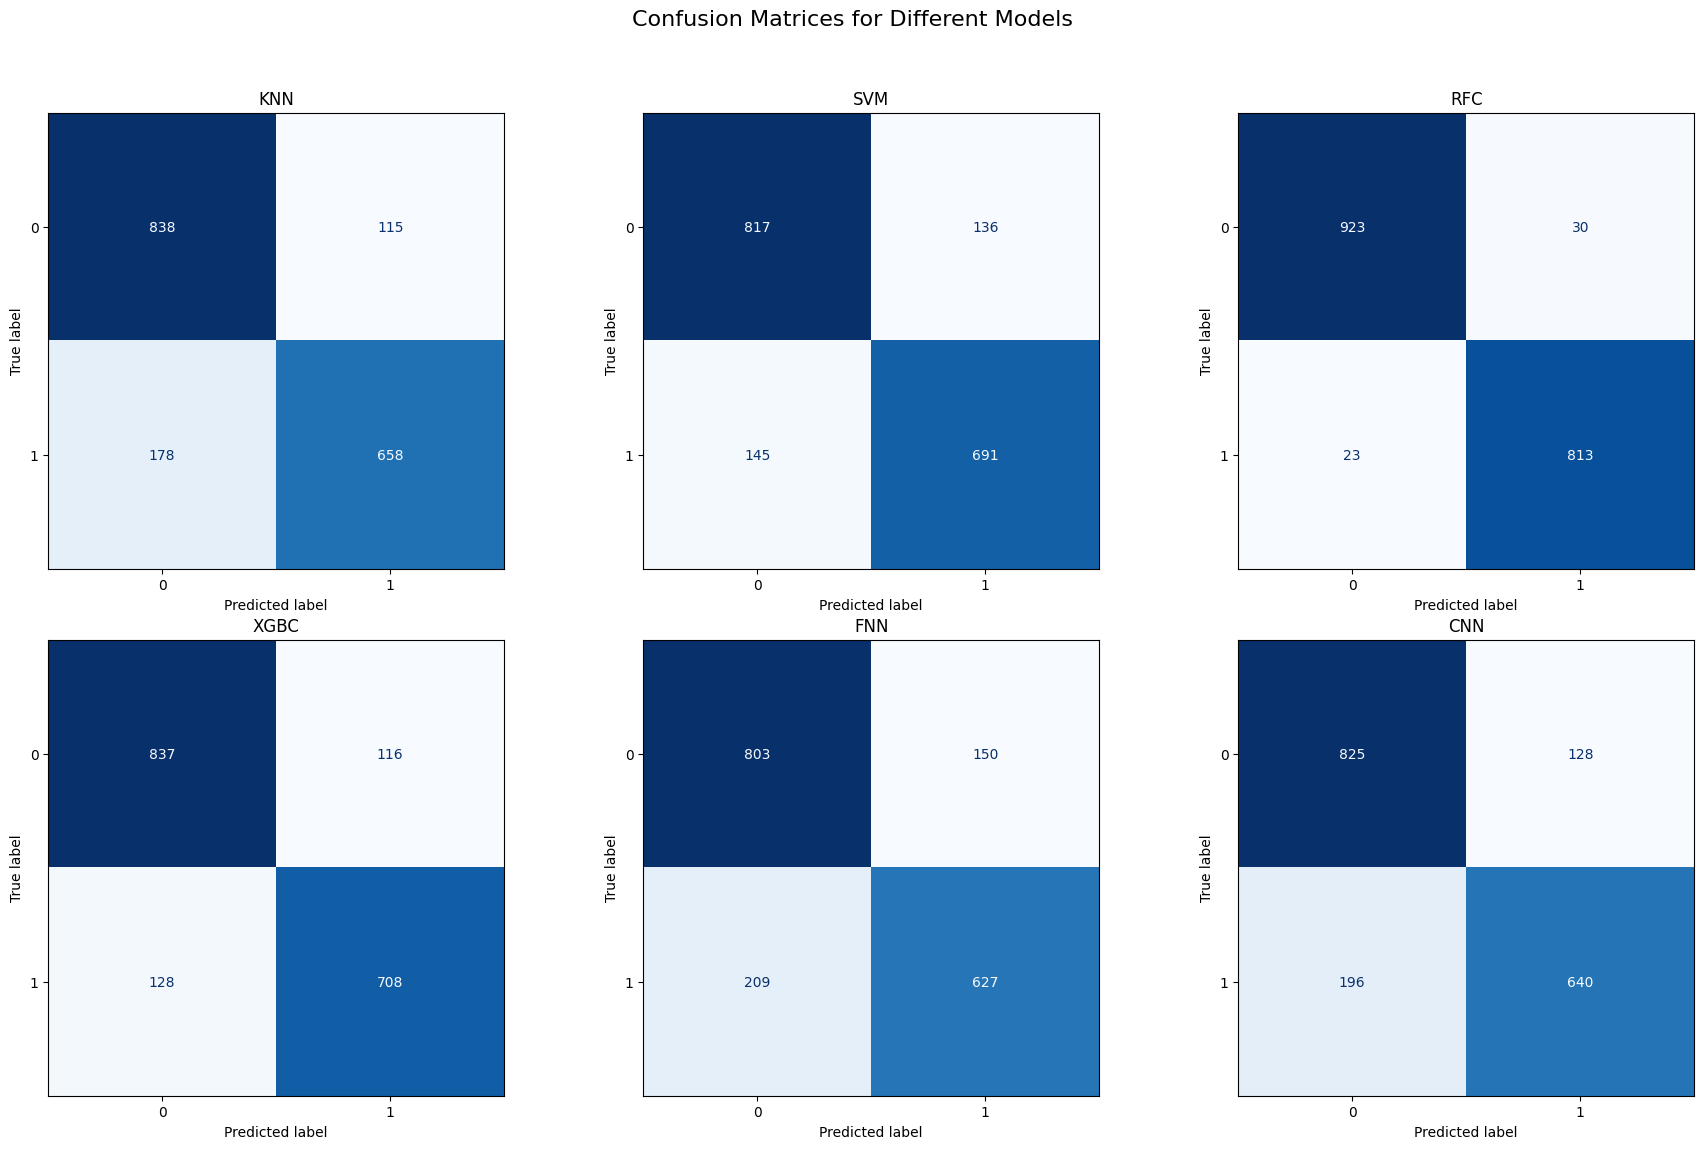

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Danh sách các mô hình
model_names = ['KNN', 'SVM', 'RFC', 'XGBC', 'FNN', 'CNN']
models = [KNN_Model, SVM_Model, RFC_Model, XGBC_Model, FNNs_Model, CNN_Model]

# Tạo hình để vẽ ma trận nhầm lẫn
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Tạo 2 hàng và 3 cột cho 6 ma trận nhầm lẫn
axes = axes.flatten()  # Làm phẳng mảng axes để dễ dàng truy cập

# Đánh giá và vẽ ma trận nhầm lẫn cho từng mô hình
for ax, model, name in zip(axes, models, model_names):
    # Dự đoán trên tập kiểm tra
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict(X_test)
    else:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    
    # Lấy các nhãn từ y_test
    labels = np.unique(y_test)  # Lấy các nhãn duy nhất từ y_test
        
        # In ra kết quả dự đoán và các chỉ số
    print(f"Model: {name}")
    print(f"Confusion Matrix:\n{cm}\n")
    
    # Hiển thị ma trận nhầm lẫn
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)

# Thiết lập tiêu đề cho toàn bộ hình
plt.suptitle('Confusion Matrices for Different Models', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Căn chỉnh để không bị chồng lấn với tiêu đề
plt.show()


Confusion Matrix for KNN:
[[838 115]
 [178 658]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       953
           1       0.85      0.79      0.82       836

    accuracy                           0.84      1789
   macro avg       0.84      0.83      0.83      1789
weighted avg       0.84      0.84      0.84      1789



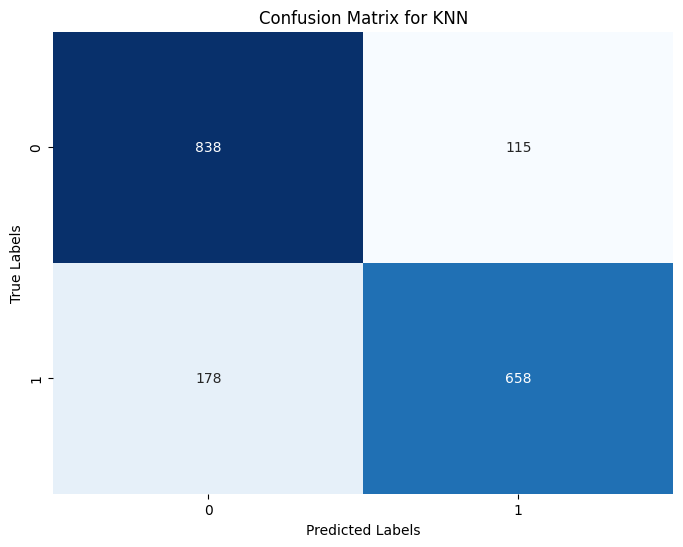

Confusion Matrix for SVM:
[[817 136]
 [145 691]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       953
           1       0.84      0.83      0.83       836

    accuracy                           0.84      1789
   macro avg       0.84      0.84      0.84      1789
weighted avg       0.84      0.84      0.84      1789



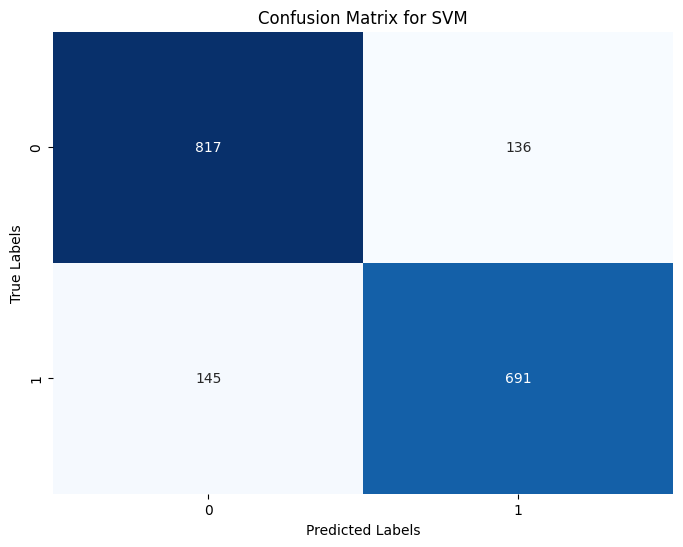

Confusion Matrix for Random Forest Classifier:
[[923  30]
 [ 23 813]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       953
           1       0.96      0.97      0.97       836

    accuracy                           0.97      1789
   macro avg       0.97      0.97      0.97      1789
weighted avg       0.97      0.97      0.97      1789



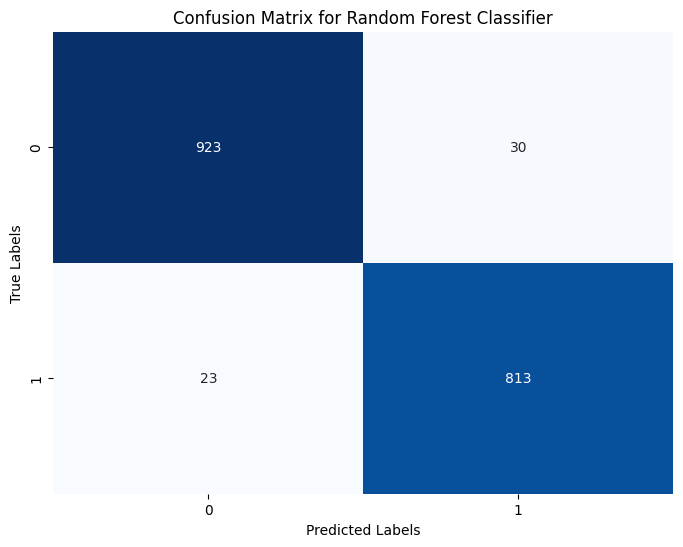

Confusion Matrix for XGBoost Classifier:
[[837 116]
 [128 708]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       953
           1       0.86      0.85      0.85       836

    accuracy                           0.86      1789
   macro avg       0.86      0.86      0.86      1789
weighted avg       0.86      0.86      0.86      1789



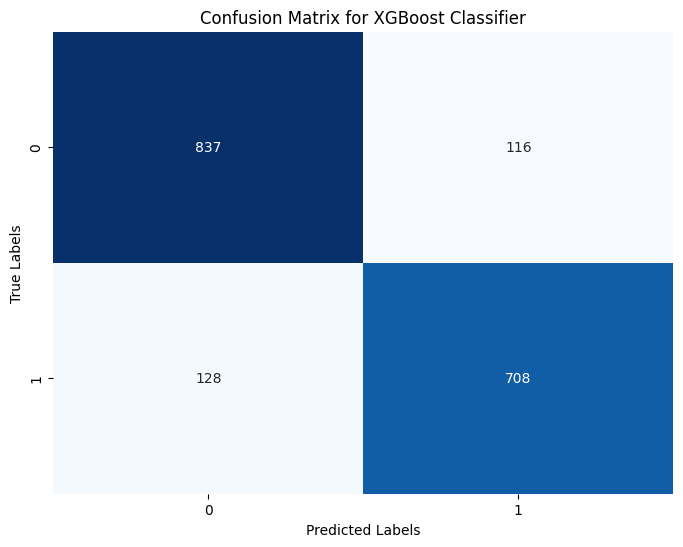

Confusion Matrix for XGBoost Classifier:
[[837 116]
 [128 708]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       953
           1       0.86      0.85      0.85       836

    accuracy                           0.86      1789
   macro avg       0.86      0.86      0.86      1789
weighted avg       0.86      0.86      0.86      1789



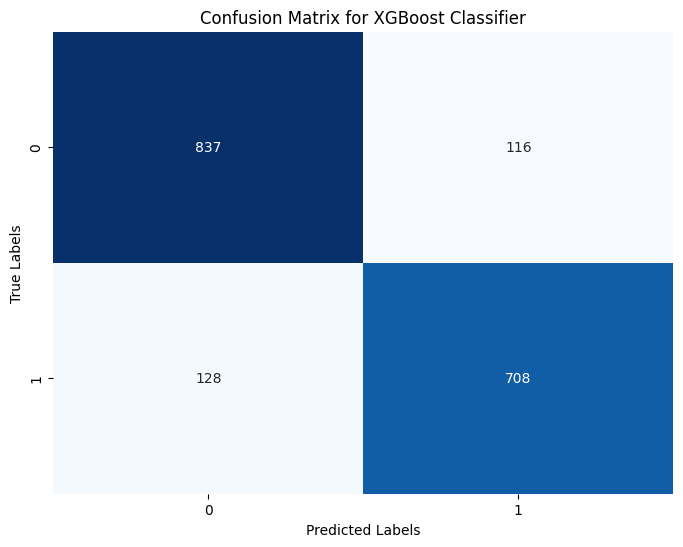

Confusion Matrix for XGBoost Classifier:
[[837 116]
 [128 708]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       953
           1       0.86      0.85      0.85       836

    accuracy                           0.86      1789
   macro avg       0.86      0.86      0.86      1789
weighted avg       0.86      0.86      0.86      1789



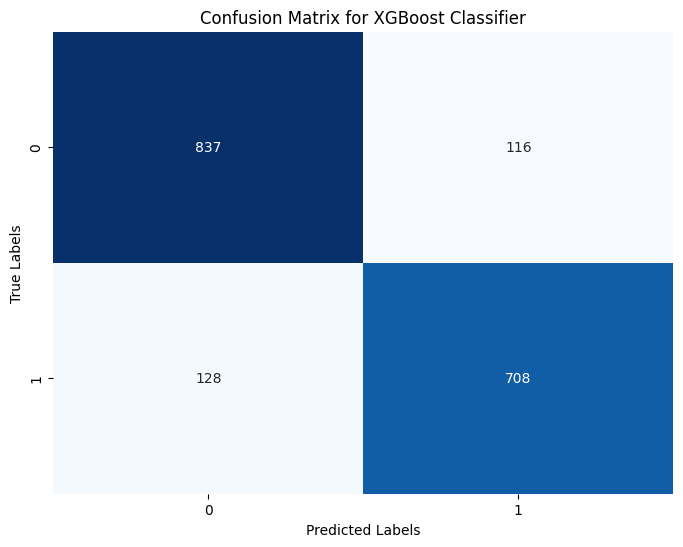

In [68]:
def print_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'Confusion Matrix for {model_name}:')
    print(cm)
    print(classification_report(y_test, y_pred))
    
    # Vẽ ma trận dự đoán
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# In ma trận dự đoán cho từng mô hình
print_confusion_matrix(KNN_Model, X_test, y_test, 'KNN')
print_confusion_matrix(SVM_Model, X_test, y_test, 'SVM')
print_confusion_matrix(RFC_Model, X_test, y_test, 'Random Forest Classifier')
print_confusion_matrix(XGBC_Model, X_test, y_test, 'XGBoost Classifier')

print_confusion_matrix(XGBC_Model, X_test, y_test, 'XGBoost Classifier')
print_confusion_matrix(XGBC_Model, X_test, y_test, 'XGBoost Classifier')


In [73]:
# Extract feature importances
feature_importances = RFC_Model.feature_importances_
features = X_train.columns

# Create a DataFrame to hold feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Importance of features from RandomForest Classifier model',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()

In [74]:
print("Độ quan trọng của các đặc trưng:")
print(importance_df.to_string(index=False))

Độ quan trọng của các đặc trưng:
     Feature  Importance
 GrMaj_Group    0.152858
     ScoTHPT    0.141932
Fjob_Cluster    0.078578
    ScoTHPT3    0.061086
      To_hop    0.048979
    ScoTHPT1    0.047925
     GraYear    0.047851
    ScoTHPT2    0.038017
   K12_Flang    0.038000
    K12_Math    0.034832
    K12_Chem    0.032940
    K12_Phys    0.031332
     K12_Bio    0.031300
    K12_Hist    0.031071
    K12_Ling    0.029258
       Habit    0.029134
    K12_Geog    0.028200
        KVUT    0.026774
         ETH    0.019013
     K12_AVG    0.018247
     Hoc_luc    0.017609
         Sex    0.015062
